# **HCC1806 SmartSeq - Unfiltered Dataset**

## Importing Libraries

In [324]:
import matplotlib as mp
import matplotlib.pyplot as plt         
import numpy as np
import pandas as pd
import plotly as py
import random
from scipy.sparse import csr_matrix
from scipy.stats import kurtosis, skew
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import seaborn as sns                    
import sklearn
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys

%matplotlib inline     
sns.set(color_codes=True)

In [325]:
import warnings
warnings.filterwarnings("ignore")

# **MetaData**

In [326]:
df_meta = pd.read_csv("HCC1806_SmartS_MetaData.tsv", delimiter="\t", engine='python', index_col=0)

print("Dataframe dimensions:", np.shape(df_meta))

Dataframe dimensions: (243, 8)


In [327]:
df_meta.head(5)

Cell Line  PCR Plate  Pos  \
Filename                                                                       
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....   HCC1806          1  A10   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...   HCC1806          1  A12   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...   HCC1806          1   A1   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...   HCC1806          1   A2   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...   HCC1806          1   A3   

                                                   Condition  Hours Cell name  \
Filename                                                                        
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....     Normo     24      S123   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...     Normo     24       S26   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...      Hypo     24       S97   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...      Hypo     24      S104   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...      Hypo     24        S4   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  STAR,FeatureCounts  
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  STAR,FeatureCounts  
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  STAR,FeatureCounts

The MetaData presents 243 cells on rows (proportioned to the number of cells in MCF7) and for each one there is information about:
- **Filename** (of aligned BAM file)
- **Cell Line**: equal for every cell, shows that samples are derived from a single cell source. Specifically, HCC1806 belongs to the breast cancer cell line group.
- **PCR Plate** (polymerase chain reaction plate): laboratory tool used for conducting PCR reactions; it amplifies specific DNA sequences and provides the platform for performing multiple PCR reactions simultaneously. The number represents which plate was adopted for the cell.
- **Pos**: position of the cell inside the plate.
- **Condition**: either normoxic or hypoxic, expressing the level of oxygen in that specific environment (normoxic represents normal levels, hypoxic represents reduced levels).
- **Hours**: amount of time that each cell was grown for.
- **Cell name**: name of the sample.
- **PreprocessingTag**: "Aligned.sortedByCoord.out.bam" represents a file generated from an alignment step in a bioinformatics analysis pipeline.
- **ProcessingComments**: "STAR,FeatureCounts" indicates that both STAR and FeatureCounts software tools were used in the data analysis pipeline for processing the dataset.

# **Unfiltered Data**

## **Exploratory Data Analysis (EDA)**

In [328]:
df = pd.read_csv("HCC1806_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df))
print("First column: ", df.iloc[ : , 0])

Dataframe dimensions: (23396, 243)
First column:  "WASH7P"         0
"CICP27"         0
"DDX11L17"       0
"WASH9P"         0
"OR4F29"         2
              ... 
"MT-TE"         22
"MT-CYB"      4208
"MT-TT"         26
"MT-TP"         66
"MAFIP"          0
Name: "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam", Length: 23396, dtype: int64


In [329]:
print('Number of Samples:', df.shape[1])
print('Number of Features:', df.shape[0])

Number of Samples: 243
Number of Features: 23396


In [330]:
df.head(5)  

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        
"WASH9P"                                                    0                        
"OR4F29"                                                    2                        

            "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       
"WASH9P"                                                    0                       
"OR4F29"                                                    0                       

            "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     
"WASH9P"                                                    0                     
"OR4F29"                                                    0                     

            "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      
"WASH9P"                                                    0                      
"OR4F29"                                                    0                      

            "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  0                    
"WASH9P"                                                    0                    
"OR4F29"                                                    0                    

            "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  1                    
"WASH9P"                                                    0                    
"OR4F29"                                                    0                    

            "output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      
"WASH9P"                                                    0                      
"OR4F29"                                                    1                      

            "output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     
"WASH9P"                                                    0                     
"OR4F29"                                                    0             

In [331]:
list(df.columns)[0:10] # Names of the cells (only first 10)

['"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam"']

In [332]:
df.index # Names of genes

Index(['"WASH7P"', '"CICP27"', '"DDX11L17"', '"WASH9P"', '"OR4F29"',
       '"MTND1P23"', '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=23396)

In [333]:
df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [334]:
# Check if all data types are numerical
is_numerical = all(df[col].dtype.kind in 'fi' for col in df.columns)

if is_numerical:
    print("All data types are numerical.")
else:
    print("Not all data types are numerical.")

All data types are numerical.


From this quick analysis, we showed how the dataset is made of 23396 rows representing genes and 243 columns corresponding to cell samples (the same we previously saw in the MetaData). \
All data is numerical and it represents the frequency of expression of a certain gene in a specific cell.

### Missing Values

In [335]:
def null_percentage(col):
    possible_nulls = [None, np.nan, 'None', '?']
    null_count = col.isin(possible_nulls).sum()
    total_count = len(col)
    return round(null_count / total_count * 100)

df.apply(null_percentage)

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"    0
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     0
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"       0
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"      0
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"        0
                                                                         ..
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"    0
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"    0
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"      0
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"     0
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"     0
Length: 243, dtype: int64

In [336]:
df.isnull().sum().sum()

0

Since the sum of missing values of every cell is 0, we can state that there are no missing values

### Duplicates

In [337]:
duplicate_rows_tot = df.duplicated(keep=False).sum()
print(f"There are {duplicate_rows_tot} duplicate rows.")

There are 89 duplicate rows.


Now we identify the duplicate rows and we print them.

In [338]:
duplicate_rows = df.duplicated(keep=False)
print(df[duplicate_rows])

             "output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"MMP23A"                                                     0                        
"LINC01647"                                                  0                        
"LINC01361"                                                  0                        
"ITGA10"                                                     0                        
"RORC"                                                       0                        
...                                                        ...                        
"ENPP7"                                                      0                        
"DTNA"                                                       0                        
"ALPK2"                                                      0                        
"OR7G2"                                                      0                        
"PLVAP"                                    

We create a new dataframe containing all duplicate rows since they could contain important biological information, that links this research to historical studies.

In [339]:
duplicate_rows_df = df[df.duplicated(keep=False)]

We calculate the correlation matrix which measures the linear relationship between pairs of genes across the duplicated rows. Each element of the correlation matrix represents the correlation coefficient between the expression values of two genes in the duplicated rows. Genes with correlation coefficient 1 are duplicates of each other.

In [340]:
duplicate_rows_df_t = duplicate_rows_df.T
c_dupl = duplicate_rows_df_t.corr()

# Find the genes that have a correlation coefficient of 1
duplicate_genes = []
for gene_1 in c_dupl.index:
    for gene_2 in c_dupl.columns:
        if gene_1 != gene_2 and c_dupl.loc[gene_1, gene_2] == 1 and gene_1 not in duplicate_genes and gene_2 not in duplicate_genes:
            duplicate_genes.append(gene_1)
            print(f"{gene_1} and {gene_2} are duplicates")

"MMP23A" and "RPL21P66" are duplicates
"LINC01647" and "CNPY1" are duplicates
"LINC01361" and "ITGA10" are duplicates
"ITGA10" and "GPA33" are duplicates
"RORC" and "OR2M4" are duplicates
"GPA33" and "C4orf50" are duplicates
"LINC01247" and "CUX2" are duplicates
"SNORD92" and "RNU6-826P" are duplicates
"LINC01106" and "ZBTB45P2" are duplicates
"AOX3P" and "RNY1P12" are duplicates
"CPS1" and "B3GAT1-DT" are duplicates
"RPS3AP53" and "SOX5" are duplicates
"CCR4" and "KCNJ16" are duplicates
"C4orf50" and "SMIM23" are duplicates
"C4orf45" and "ALPK2" are duplicates
"PCDHA2" and "PCDHA8" are duplicates
"PCDHGA2" and "PCDHGA3" are duplicates
"PCDHGA3" and "PCDHGB3" are duplicates
"PCDHGB3" and "PCDHGA7" are duplicates
"PCDHGA7" and "PCDHGA9" are duplicates
"PCDHGA9" and "PCDHGB7" are duplicates
"PCDHGB7" and "PCDHGA12" are duplicates
"PCDHGA12" and "PCDHGC4" are duplicates
"PCDHGB9P" and "PAX2" are duplicates
"SMIM23" and "VNN3" are duplicates
"PANDAR" and "LAP3P2" are duplicates
"RBBP4P3" a

We drop duplicate genes and create a list containing the removed genes.

In [341]:
# Create a list of gene names before dropping duplicates
genes_before_drop = list(df.index)

# Drop duplicates and keep track of removed genes
removed_genes = set()
df.drop_duplicates(keep='first', inplace=True)
for gene_1 in genes_before_drop:
    if gene_1 not in df.index:
        removed_genes.add(gene_1)

# Print the list of removed genes
print("Removed genes:", removed_genes)
# check the new size of dataframe to see if everything was done correctly
print(df.shape) 

Removed genes: {'"LAP3P2"', '"MIR24-1"', '"ZBTB45P2"', '"C4orf50"', '"OR7G2"', '"KCNJ16"', '"LINC02833"', '"COL2A1"', '"PCDHGC4"', '"GPA33"', '"PCDHA8"', '"TRPV6"', '"STRA6LP"', '"APLNR"', '"ALPK2"', '"KCNA4"', '"RPL22P18"', '"MIR6864"', '"PCDHGA7"', '"CD300A"', '"PCDHGA12"', '"MIR548D1"', '"LINC02395"', '"PCDHGA9"', '"MIR548AA2"', '"NUS1P2"', '"MIR374C"', '"ITGA10"', '"SMIM23"', '"PAX2"', '"DTNA"', '"VNN3"', '"RPL10AP3"', '"RASL12"', '"PCDHGA3"', '"B3GAT1-DT"', '"PCDHGB3"', '"MSX2P1"', '"OR5AU1"', '"RPL21P66"', '"CCL3L1"', '"CILP"', '"SOX5"', '"CNPY1"', '"CYCSP26"', '"PLVAP"', '"ENPP7"', '"CUX2"', '"MIR4520-2"', '"RNY1P12"', '"PCDHGB7"', '"FBLIM1P2"', '"OR2M4"', '"RNU6-826P"'}
(23342, 243)


In [342]:
duplicate_cols = df.columns[df.transpose().duplicated()].tolist()

if duplicate_cols:
    print(f"The following columns are duplicated: {duplicate_cols}")
else:
    print("There are no duplicated columns.")

There are no duplicated columns.


### Proportion of Cell Conditions

Let us check the proportion between Hypoxic and Normoxic cells, as it might already help identifying issues or specific patterns.

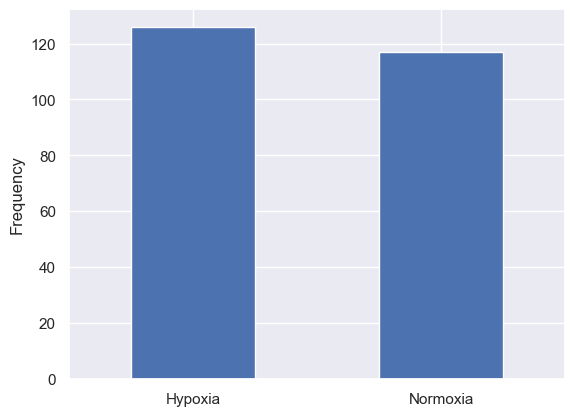

In [343]:
hypo_count = 0 
norm_count = 0
for cell in df.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    hypo_count += 1
  else:
    norm_count += 1

s = pd.Series({"Hypoxia" : hypo_count, "Normoxia" : norm_count})
s.plot.bar(rot = 0)

plt.ylabel("Frequency")
plt.show()

From the histogram above it is clear that the conditions are balanced among the samples.

### Correlation

We first look at correlation between features, meaning the correlation between cells based on genes.

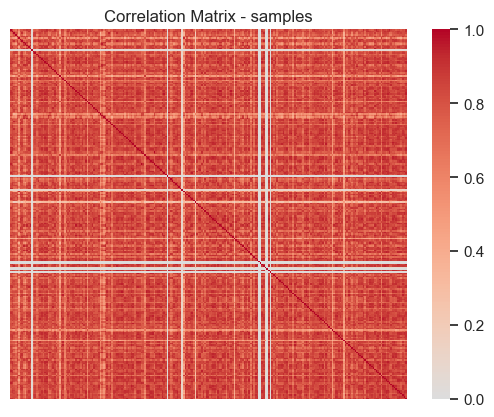

In [344]:
# Compute the correlation matrix for all pairs of cells based on genes
corr_matrix = df.corr() # pairwise correlation -> linear corr

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, xticklabels=False, yticklabels=False)
midpoint = (corr_matrix.values.max() - corr_matrix.values.min()) /2 + corr_matrix.values.min()
plt.title("Correlation Matrix - samples")
plt.show()

From the plot, we can see that the dark red color represents high correlation between two cells, which means that the cells have similar gene expression profiles; this could indicate that they have a similar cellular function or that they are part of the same cell population. <br>
Since we notice that the minimum correlation between cells is zero we want to further investigate that.

Next we plot the frequency of the correlation matrix coefficients. Note: for the histogram we considered only the elements of the upper triangle of the correlation matrix because the upper and lower triangles are symmetric, and we don't want to compute the same thing twice.

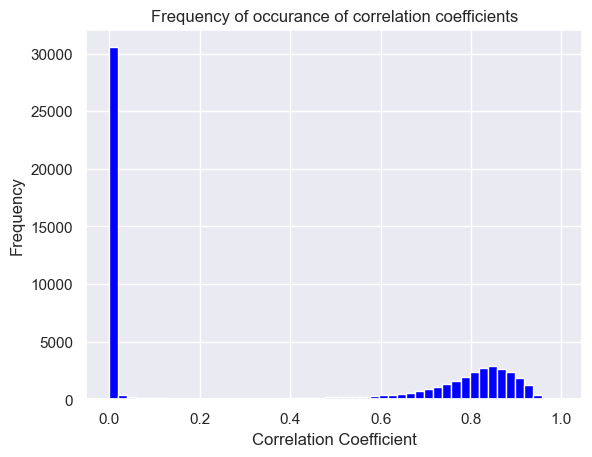

In [345]:
upper_triangular = np.triu(corr_matrix, k=1).flatten() 

plt.hist(upper_triangular, bins=50, color='blue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Frequency of occurance of correlation coefficients')
plt.show()

We can notice that there are a lot of cells which are weakly correlated and we want to further investigate that. Our first assumption is that the reason behind it is that those cells have all 0 entries.

In [346]:
num_zero_cols = (df == 0).sum(axis=0)
all_zero_cols = num_zero_cols[num_zero_cols == len(df)]
print(f"Columns with all 0 entries: {len(all_zero_cols)}")

Columns with all 0 entries: 0


Since that is not the case, according to the standard thresholds we want to check the intensity of correlations as follows: <br>
* 0.00-0.19 “very weak” <br>
* 0.20-0.39 “weak” <br>
* 0.40-0.59 “moderate” <br>
* 0.60-0.79 “strong” <br>
* 0.80-1.0 “very strong” <br>

In [347]:
corr_df = df.corr()

no_corr = list(corr_df[(corr_df == 0)].stack().index)
very_weak = list(corr_df[(corr_df > 0) & (corr_df <= 0.19)].stack().index)
weak = list(corr_df[(corr_df >= 0.2) & (corr_df <= 0.39)].stack().index)
moderate = list(corr_df[(corr_df >= 0.4) & (corr_df <= 0.59)].stack().index)
strong = list(corr_df[(corr_df >= 0.6) & (corr_df <= 0.79)].stack().index)
very_strong = list(corr_df[(corr_df >= 0.8) & (corr_df <= 1)].stack().index)

print('no correlation', len(no_corr)//2)
print('very weak', len(very_weak)//2)
print('weak', len(weak)//2)
print('moderate', len(moderate)//2)
print('strong', len(strong)//2)
print('very strong', len(very_strong)//2)

no correlation 0
very weak 1890
weak 305
moderate 1658
strong 8339
very strong 16110


In [348]:
#pearson correlation coefficient
random.seed(42)
random_columns = [i for i in range(0,1000)]
random.shuffle(random_columns)

corr_matrix_p = df.T.iloc[:, random_columns[:1000]].corr(method = 'pearson') #correlation matrix made of 100 random columns

average = (corr_matrix_p.values.max() - corr_matrix_p.values.min()) /2 + corr_matrix_p.values.min()
print("Number of genes included:", corr_matrix_p.shape[0])
print("Average between minimum and maximum correlation:", average)
print("Average correlation of expression profiles between genes:", corr_matrix_p.mean().mean())

Number of genes included: 1000
Average between minimum and maximum correlation: 0.41797618518213436
Average correlation of expression profiles between genes: 0.11105168562601421


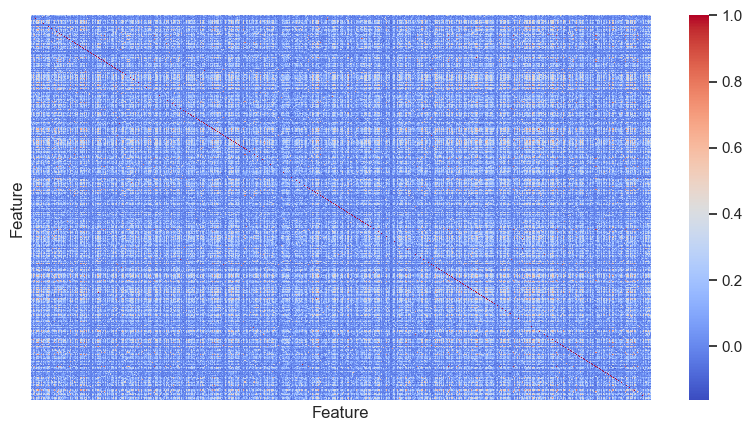

In [349]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_p, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

Features are mostly uncorrelated which is good since we prefere uncorrelated data when building a model. Furthermore, we did a detailed analysis on correlation of cells where we can see that there are no uncorrelated cells and qiute a lot of very strongly correlared cells. 

### Outliers

We try to identify outliers in our dataset through the interquartile range. Any point that falls outside the range between the 25th and 75th percentile is considered an outlier.

In [350]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"     52.0
"output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"     126.0
"output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"         5.0
"output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"       40.0
"output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"         22.0
                                                                          ...  
"output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam"     76.0
"output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam"     24.0
"output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam"       68.0
"output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam"      23.0
"output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam"      45.0
Length: 243, dtype: float64


In [351]:
df.describe()

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                        
mean                                           99.795947                        
std                                           530.122968                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                            52.000000                        
max                                         35477.000000                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                       
mean                                          208.126896                       
std                                           982.196276                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                           126.000000                       
max                                         69068.000000                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                     
mean                                            9.716391                     
std                                            65.620267                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             5.000000                     
max                                          6351.000000                     

       "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                      
mean                                          151.004027                      
std                                           978.042324                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                            40.000000                      
max                                         70206.000000                      

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                    
mean                                           35.779496                    
std                                           206.116742                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                            22.000000                    
max                                         17326.000000                    

       "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                    
mean                                           47.197284                    
std                                           545.993502                    
min                                             0.000000                    
25%                                             0.000000      

To get a more detailed understanding, let us plot the distribution of the genes for some random cell, using a boxplot. This way we can get more details about the median, the upper and lower quartiles, and the minimum and maximum values. The box itself represents the interquartile range (IQR), which is the range of the middle 50% of the data.

<Axes: xlabel='"output.STAR.PCRPlate3A2_Hypoxia_S166_Aligned.sortedByCoord.out.bam"'>

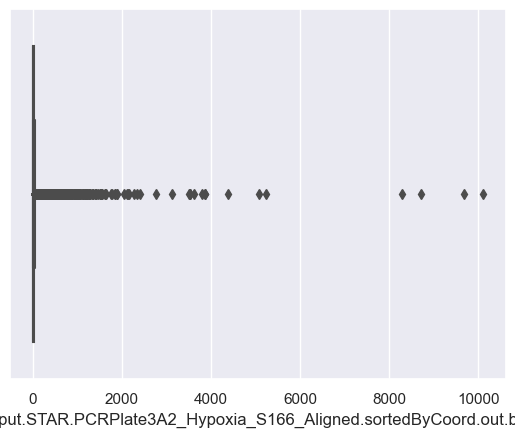

In [352]:
cells = list(df.columns)
random_cell = np.random.choice(len(cells))
sns.boxplot(x=df[cells[random_cell]])

A violin plot can be useful in this case because it provides a more informative visualization of the distribution of gene expression values than a simple box plot. Indeed, it also shows the shape of the distribution, which can be especially useful when working with high-dimensional data, such as gene expression data, where there are many genes and it can be difficult to get a sense of the overall distribution of expression values. Additionally, a violin plot can be used to compare the distributions of different groups, such as different cell types or experimental conditions.

<Axes: xlabel='"output.STAR.PCRPlate3A2_Hypoxia_S166_Aligned.sortedByCoord.out.bam"'>

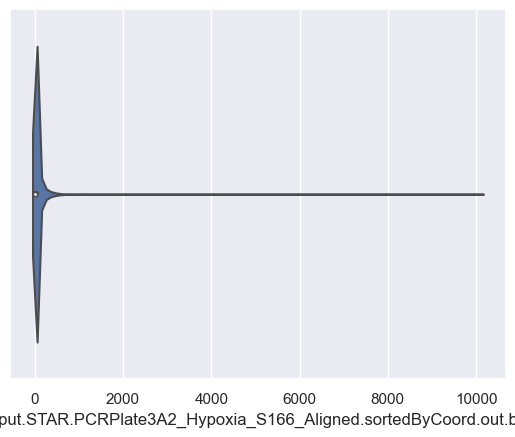

In [353]:
sns.violinplot(x=df[cells[random_cell]])

Moreover, we can plot the violin plot of 50 random features, which allows to get a broader view of the data, as well as any cells that exhibit a high degree of sparsity (i.e. contain mostly zero values). Additionally, this approach can help identify any patterns or trends in the data that may not be apparent when looking at single data points.

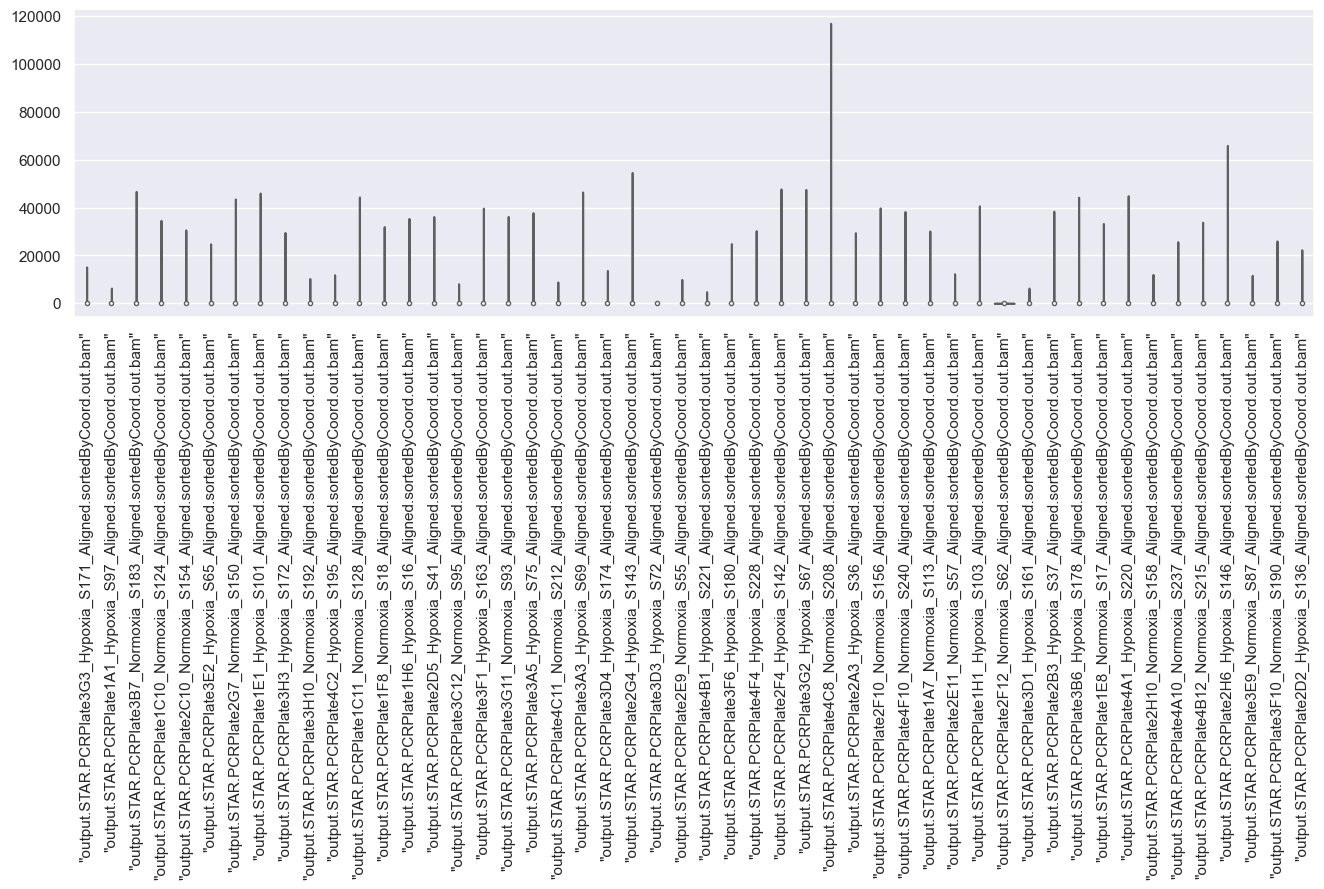

In [354]:
n_cells = 50
random_cells = np.random.choice(df.columns, size=n_cells, replace=False)

plt.figure(figsize=(16,4))
violin_plot = sns.violinplot(data=df[random_cells], palette="Set3", cut=0)
plt.setp(violin_plot.get_xticklabels(), rotation=90)
plt.show()

Let's attempt to remove outliers by using the interquartile range method. As a best practice in exploratory data analysis, it's recommended to create a new dataset for any transformations or filtering to ensure that the original dataset remains intact and can be used later if needed.

In [355]:
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.shape
df_no_outliers.head(3)

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        

            "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       

            "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     

            "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      

            "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  0                    

            "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                    
"CICP27"                                                    0                    
"DDX11L17"                                                  1                    

            "output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                    0                      
"DDX11L17"                                                  0                      

            "output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                     
"CICP27"                                                    0                     
"DDX11L17"                                                  0                     

            "output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       

            "output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                       
"CICP27"                                                    0                       
"DDX11L17"                                                  0                       

            ...  \
"WASH7P"    ...   
"CICP27"    ...   
"DDX11L17"  ...   

            "output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                        
"CICP27"                                                    0                        
"DDX11L17"                                                  0                        

            "output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                    0                      
"CICP27"                                                

Let us look at dataset and plots again with the outliers removed.

In [356]:
df_no_outliers.describe()

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                       10790.000000                        
mean                                            1.512882                        
std                                             6.505405                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                             0.000000                        
max                                           103.000000                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                       10790.000000                       
mean                                            3.217794                       
std                                            14.474905                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                             0.000000                       
max                                           276.000000                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                       10790.000000                     
mean                                            0.170621                     
std                                             0.772649                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             0.000000                     
max                                            12.000000                     

       "output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam"  \
count                                       10790.000000                      
mean                                            1.217516                      
std                                             7.580021                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                             0.000000                      
max                                            99.000000                      

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                       10790.000000                    
mean                                            0.665060                    
std                                             3.073143                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             0.000000                    
max                                            55.000000                    

       "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
count                                       10790.000000                    
mean                                            0.723355                    
std                                             3.623862                    
min                                             0.000000                    
25%                                             0.000000      

<Axes: xlabel='"output.STAR.PCRPlate3A2_Hypoxia_S166_Aligned.sortedByCoord.out.bam"'>

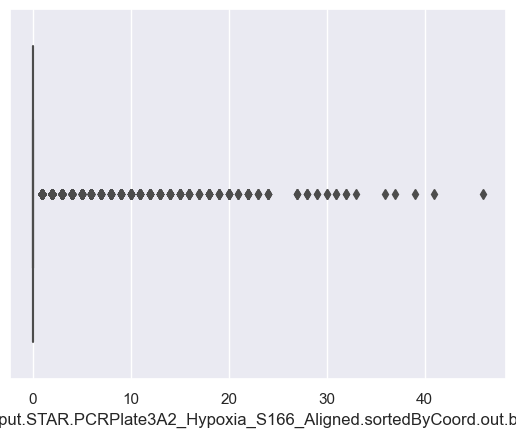

In [357]:
sns.boxplot(x=df_no_outliers[cells[random_cell]])

<Axes: xlabel='"output.STAR.PCRPlate3A2_Hypoxia_S166_Aligned.sortedByCoord.out.bam"'>

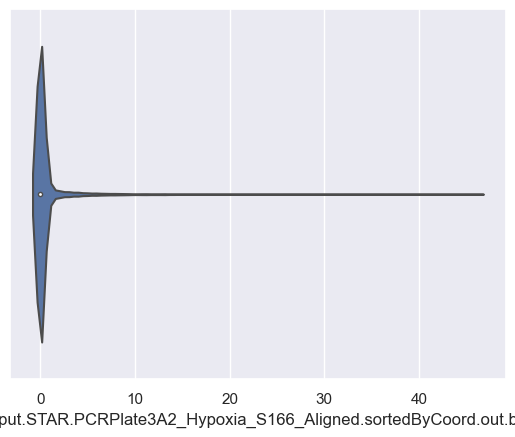

In [358]:
sns.violinplot(x=df_no_outliers[cells[random_cell]])

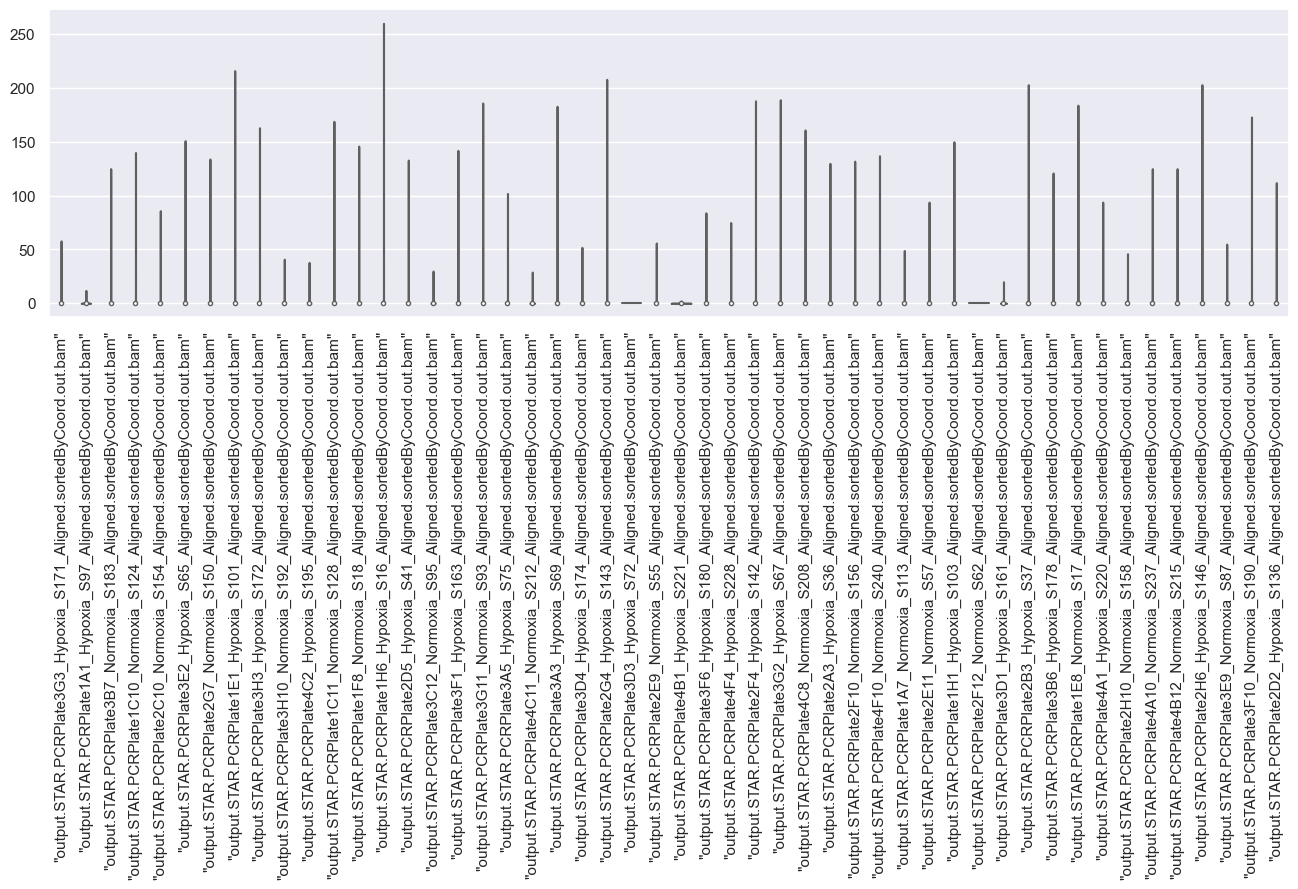

In [359]:
plt.figure(figsize=(16,4))
violin_plot = sns.violinplot(data=df_no_outliers[random_cells], palette="Set3", cut=0)
plt.setp(violin_plot.get_xticklabels(), rotation=90)
plt.show()

The current situation is not ideal as we are left with mainly zeros after removing the outliers. Simply removing the outliers won't solve the problem as many genes or features will still have a value of 0, which would lead to loss of information. Therefore, a different approach is needed, as the outliers appear to be the values that contain important information in this particular case. \
\
Therefore, it is the data's evident sparsity (i.e. the huge number of zeros, representing not expressed genes) to be giving more importance to outliers (representing genes with high expression). \
\
It is exactly the analysis of these highly-expressed genes that will lead to remarkable conclusions: genes with high expression in some cells are likely to be important in driving the biological processes that lead to cancer development and progression. These genes may represent key oncogenic drivers or tumor suppressors that are dysregulated in cancer cells. By identifying these highly expressed genes and understanding their functions, we can gain insights into the underlying biology of cancer.

### Sparsity

Sparsity is a measure of the proportion of zero values in a dataset or matrix. It is typically calculated as the number of zero elements divided by the total number of elements in the dataset or matrix. \
\
The sparsity value of this data frame indicates the proportion of cells in the data frame that are filled with non-zero values. A value of 1 indicates that all cells contain non-zero values, while a value closer to 0 indicates that a larger proportion of cells are zero. \
\
We can use a heatmap to visualize the sparsity of the dataset: here, the zero values in the dataframe are displayed as white cells and the non-zero values are displayed as black cells. The more white cells there are, the sparser the dataframe is.

<Axes: >

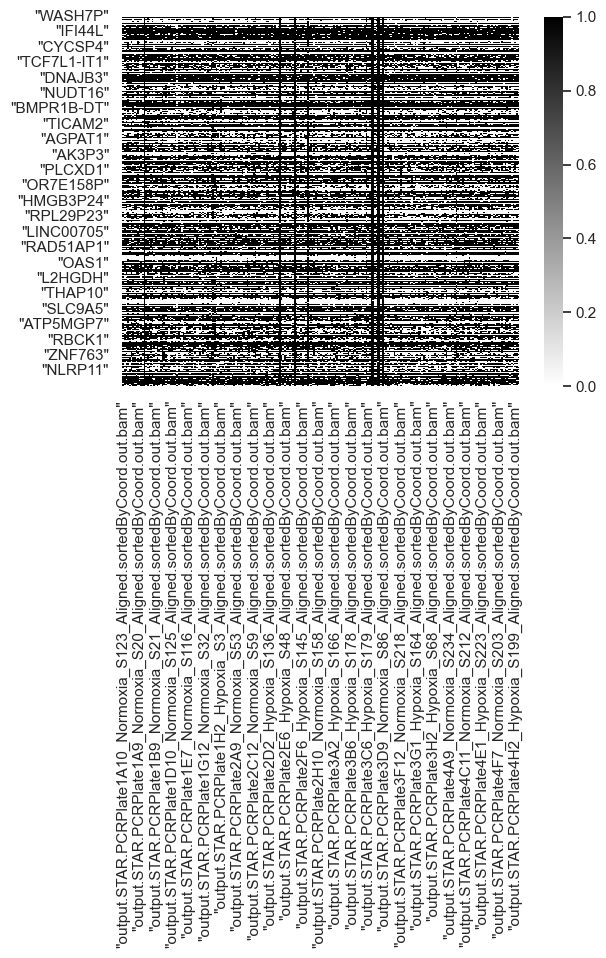

In [360]:
sns.heatmap(df == 0, cmap='binary')

It is remarkable how some rows are almost entirely white: this reveals that certain genes are not expressed in a majority of the cells, indicating that the biological function encoded by those genes may not be necessary for those particular cells. This could include the production of certain proteins, activation of metabolic pathways or regulation of specific gene expressions. \
\
Since there is a great amount of white cells in the heatmap, it is better to proceed with a more quantitative representation of sparsity. \
We can do that by computing the percentage of zeros in the dataframe.

In [361]:
zeros_count = (df == 0).sum().sum()
total_non_missing_values_count = df.count().sum()
zeros_percentage = (zeros_count / total_non_missing_values_count) * 100

print(f"Zeros percentage: {zeros_percentage:.2f}%")

Zeros percentage: 55.77%


Hence, as the proportion of zeros is fairly high, our dataset is definitely sparse (with sparsity level of around 0.6). \
\
Using sparse matrix representation could definitely be an advantage. Indeed, due to the high sparsity level, using a sparse matrix representation could lead to significant memory and computational savings, as only the non-zero values are stored and operated on. This can result in faster processing times and reduced memory usage, which can be especially important since we have a large dataset.

In [362]:
sparse_df = csr_matrix(df.values) # Converts DataFrame into a CSR sparse matrix
print(sparse_df)

density = np.count_nonzero(sparse_df.toarray()) / np.prod(sparse_df.shape)
print(f"Sparsity: {1 - density:.2%}")

  (0, 12)	1
  (0, 33)	2
  (0, 48)	3
  (0, 74)	3
  (0, 90)	1
  (0, 232)	1
  (1, 33)	2
  (1, 46)	2
  (1, 56)	3
  (1, 101)	1
  (1, 107)	1
  (1, 115)	5
  (1, 164)	1
  (1, 182)	1
  (1, 197)	3
  (1, 204)	2
  (1, 205)	1
  (1, 209)	2
  (1, 222)	5
  (2, 5)	1
  (2, 10)	1
  (2, 11)	1
  (2, 14)	8
  (2, 15)	2
  (2, 30)	2
  :	:
  (23341, 212)	5
  (23341, 214)	1
  (23341, 215)	10
  (23341, 216)	1
  (23341, 217)	7
  (23341, 218)	8
  (23341, 219)	14
  (23341, 220)	4
  (23341, 222)	1
  (23341, 224)	2
  (23341, 225)	1
  (23341, 226)	3
  (23341, 227)	3
  (23341, 228)	2
  (23341, 229)	2
  (23341, 231)	11
  (23341, 232)	4
  (23341, 233)	2
  (23341, 235)	2
  (23341, 236)	1
  (23341, 237)	1
  (23341, 238)	3
  (23341, 240)	2
  (23341, 241)	1
  (23341, 242)	5
Sparsity: 55.77%


### Investigating the Distribution

When exploring the distribution of a dataset, it is important to consider summary statistics beyond just the mean and standard deviation. Skewness and kurtosis are two such measures that can provide additional insight into the shape of the distribution. \
\
Skewness measures the degree of asymmetry in the distribution, with positive skewness indicating a longer tail to the right and negative skewness indicating a longer tail to the left (with a value of 0 indicating a perfectly symmetrical distribution). \
\
Kurtosis, on the other hand, measures the degree of peakedness of the distribution, with high kurtosis indicating a more peaked distribution and low kurtosis indicating a flatter distribution. A value of 3 indicates a normal distribution, values less than 3 indicate flatter distributions (platykurtic), and values greater than 3 indicate more peaked distributions (leptokurtic).

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

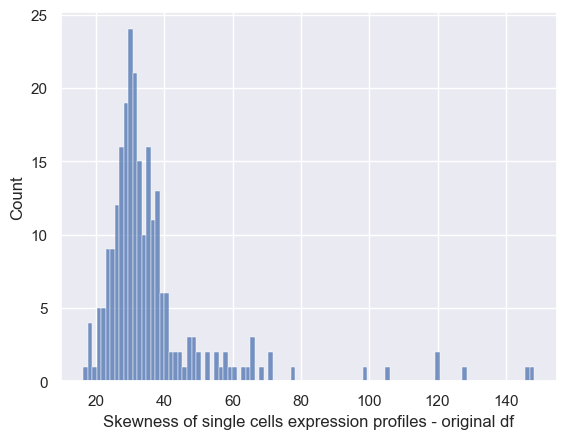

In [363]:
col_num = np.shape(df)[1]
df_skew_cells = []

for i in range(col_num):      
     df_skew_cells += [df[cells[i]].skew()]
sns.histplot(df_skew_cells, bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

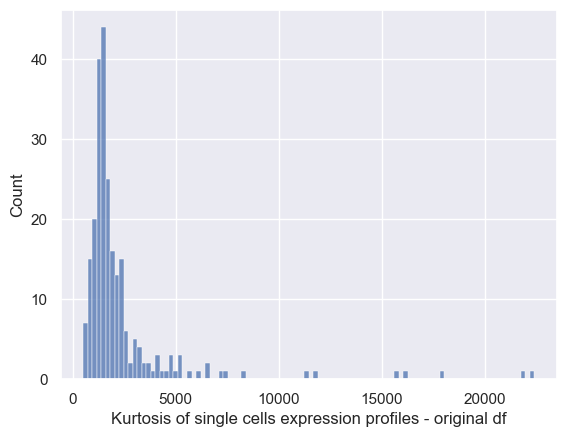

In [364]:
df_kurt_cells = []
for i in range(col_num) :     
    df_kurt_cells += [df[cells[i]].kurt()]
sns.histplot(df_kurt_cells, bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')

The resulting histograms show the distribution of the skewness and kurtosis values across all cells, allowing us to get a sense of the overall shape of the gene expression profiles in the dataset. \
It is clear how the skewness histogram is right skewed and the kurtosis histogram is leptokurtic, indicating that many cells have highly variable expression profiles with both high peaks and long tails. \
\
For comparison, here are skewness and kurtosis for a normal distribution.

In [365]:
xnorm = np.random.normal(0, 2, 10000000)   # Create random values based on a normal distribution

print(f"Excess kurtosis of normal distribution: {kurtosis(xnorm)}")
print(f"Skewness of normal distribution: {skew(xnorm)}")

Excess kurtosis of normal distribution: 0.0005680433342676316
Skewness of normal distribution: -0.0003737845117573638


The skewness and kurtosis values of the dataset suggest a highly non-normal distribution as they greatly exceed the expected values of a normal distribution.

### Non-Zero Gene Expression

We plot the frequency of expression of 15 random non-zero genes.

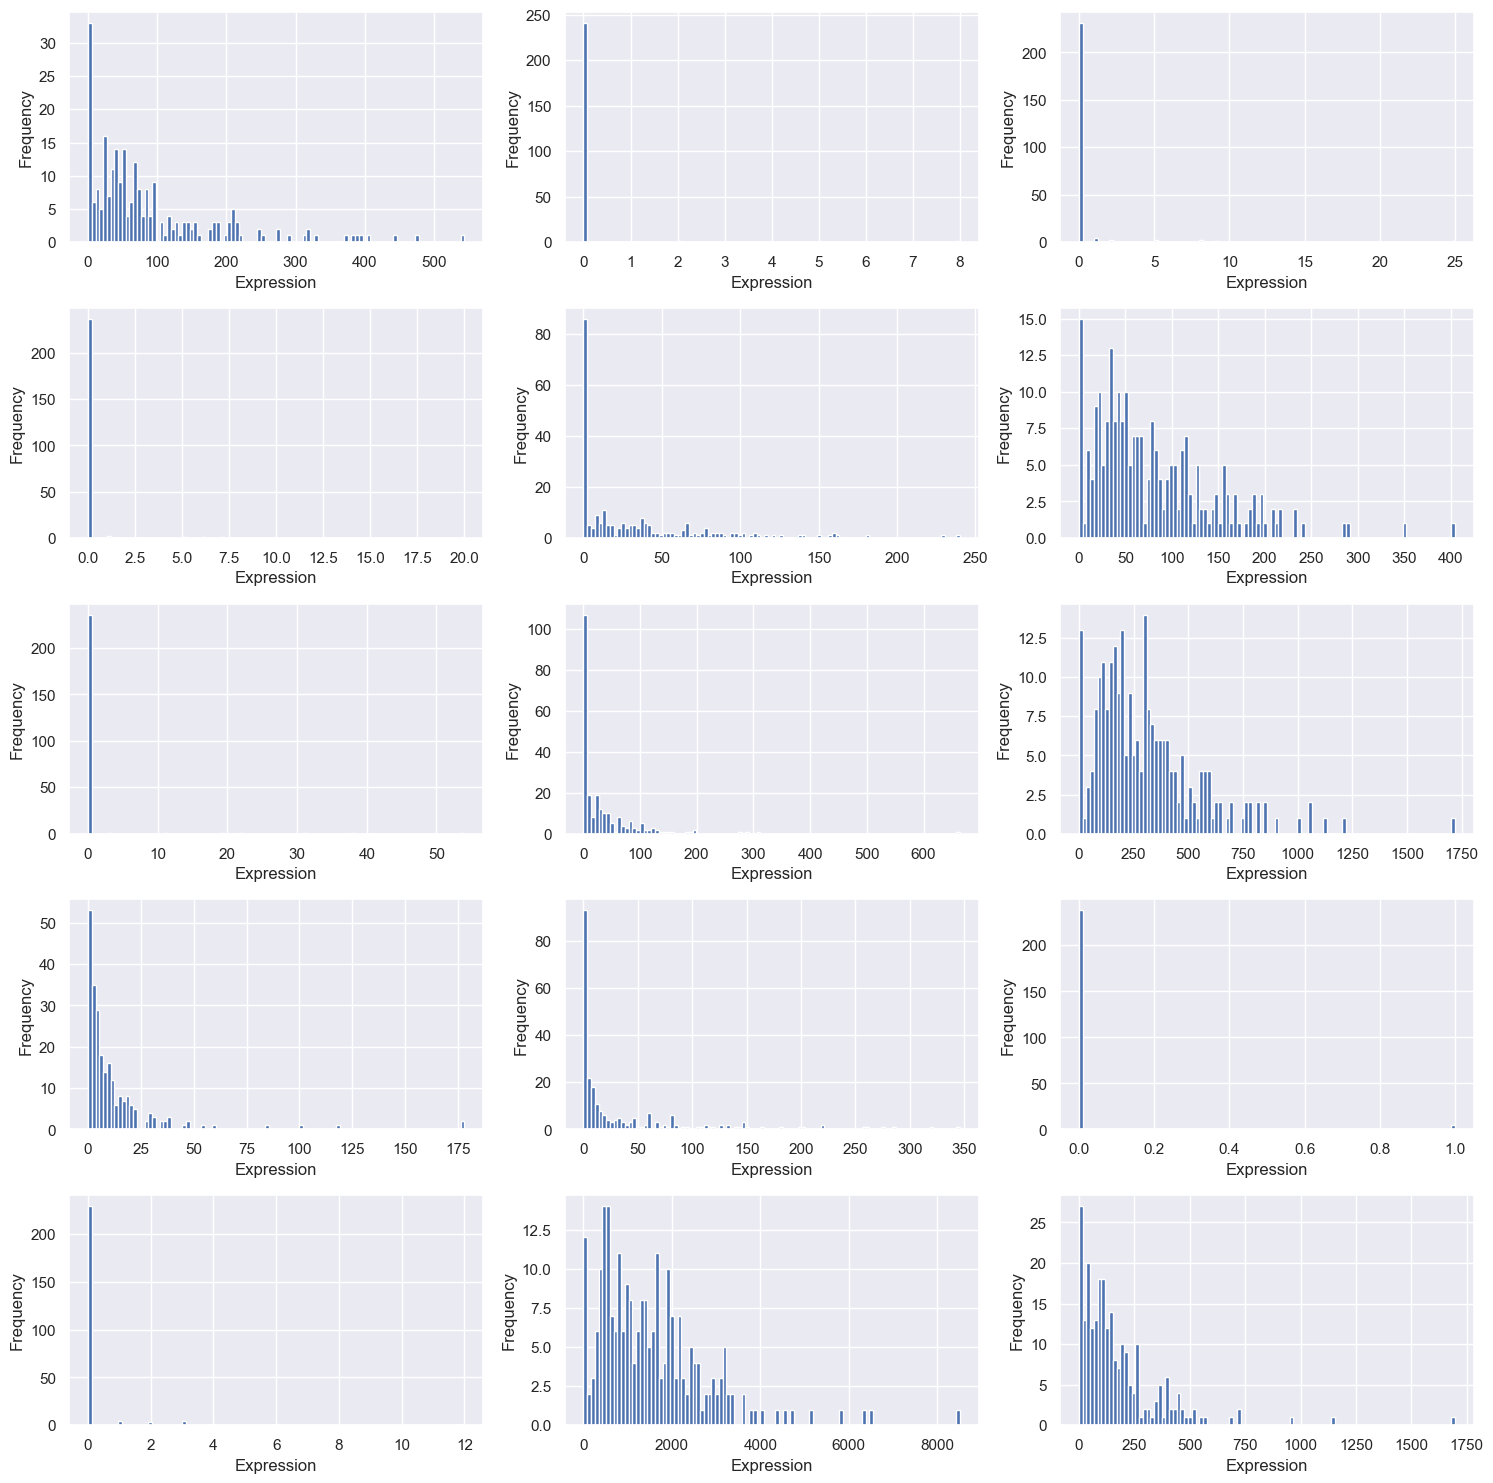

In [366]:
data = df.T
data = data.loc[(data!=0).any(axis=1), :]
genes = np.random.choice(data.columns, size=15, replace=False)
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
for i, gene in enumerate(genes):
    gene_data= data[gene]
    row_num= i//3
    col_num= i%3
    ax[row_num, col_num].hist(gene_data, bins=100)
    ax[row_num, col_num].set_xlabel('Expression')
    ax[row_num, col_num].set_ylabel('Frequency')
fig.tight_layout()
plt.show()

We would expect to observe a bimodal behaviour, since it is common in the distribution of gene expression levels, however we notice a unimodal behaviour in all of the cases (meaning that the data has a single peak). This is probably due to various biological factors.
From the plots we can observe that the data doesn't present any upper limit for expression, and that it follows either a Negative Binomial or Poisson distribution (it depends on whether the mean and the variance coincide or not).

We proceed by analysing the relationship between the mean and the variance by plotting them.

Text(0, 0.5, 'Variance')

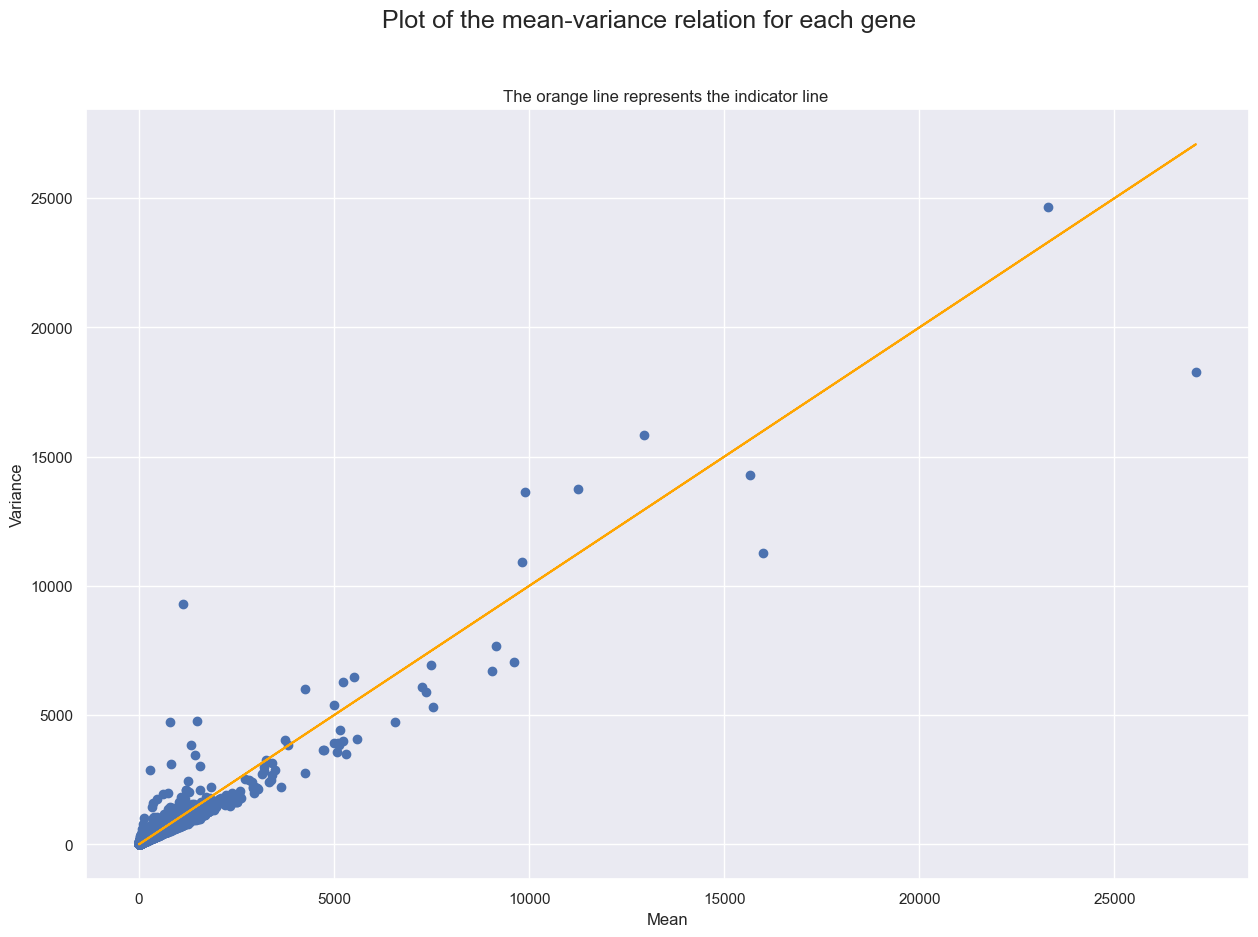

In [367]:
mean_vector = df.T.describe().iloc[1,:]
var_vector = df.T.describe().iloc[2,:]
plt.figure(figsize=(15, 10))
plt.scatter(mean_vector, var_vector)
plt.plot(mean_vector, mean_vector, color = "orange")
plt.title("The orange line represents the indicator line ", fontsize = 12)
plt.suptitle("Plot of the mean-variance relation for each gene", fontsize = 18)
plt.xlabel("Mean")
plt.ylabel("Variance")

We can clearly observe that the relation between mean and variance is not linear since it does not lie on the yellow line, therefore we can conclude that the data follows a Negative Binomial distribution.

## **Data Preprocessing**

### Filtering & Quality Control

At this point we aim to determine whether the distribution of the total reads among cells is normal. This is done to asses the quality of the data and make sure there are no systemic biases as the total read count can be affected by technical factors, something that would need to be corrected. 

We first use the Shapiro-Wilk test. It tests the null hypothesis that a sample comes from a normally distributed population.

In [368]:
total_counts = np.sum(df, axis=0) 
#Perform Shapiro-Wilk test to check for normality
stat, p = shapiro(total_counts)
if p > 0.05: # if p-value is greater than 0.05, we cannot reject the null hypothesis that the data is normally distributed
    print("Total read counts follow a normal distribution (p={:.3f})".format(p))
else:
    print("Total read counts do not follow a normal distribution (p={:.3f})".format(p))

Total read counts do not follow a normal distribution (p=0.000)


We visualize to better understand how to filter our data.

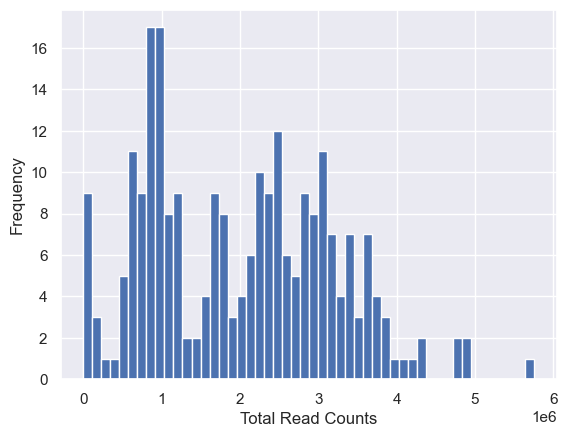

In [369]:
import matplotlib.pyplot as plt

plt.hist(total_counts, bins=50)
plt.xlabel('Total Read Counts')
plt.ylabel('Frequency')
plt.show()

In [370]:
df_filtered = df.loc[:, total_counts >= .25e6]

Another standard analysis step is to filter out low quality cells, cells that may have been damaged during the experiment (have a low number of expressed genes) and that could affect the quality of the data.

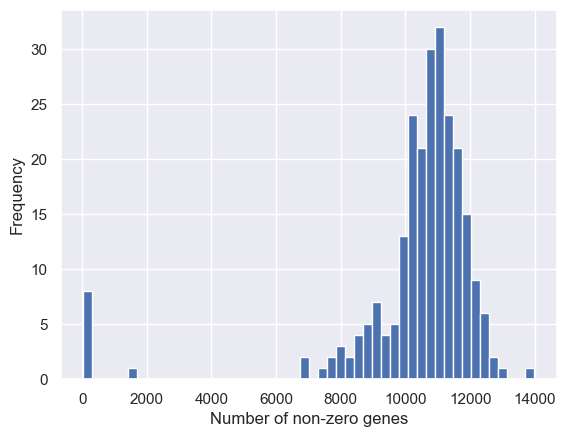

In [371]:
# count number of non-zero genes for each cell
nonzero_counts = np.count_nonzero(df, axis=0)
plt.hist(nonzero_counts, bins=50)
plt.xlabel('Number of non-zero genes')
plt.ylabel('Frequency')
plt.show()

In [372]:
df_filtered = df.loc[:, nonzero_counts >= 8000]

By looking at the graphs we set thresholds based on which we filtered out cells to eliminate unwanted variation/noise and the effects of human errors.

In [373]:
df_filtered.shape

(23342, 227)

### Normalization

In [374]:
df_filtered_copy = df_filtered.copy()
rdn_gene = random.randrange(df_filtered.shape[0])

CPM (Counts Per Million) normalization: this method scales the raw counts by the library size of each sample, multiplied by a factor of 1,000,000 (1e6)

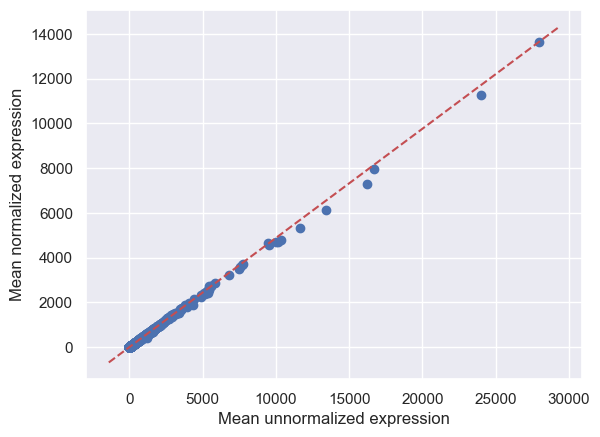

In [375]:
# Calculate the total read count for each sample
total_reads = df_filtered_copy.sum(axis=0)

# Divide each read count in the DataFrame by corresponding total count and multiply by 1,000,000
cpm_df =  (df_filtered / total_reads) * 1e6

# Calculate the mean expression level before normalization
mean_filtered = df_filtered.mean(axis=1)

# Calculate the mean expression level after normalization
mean_normalized = cpm_df.mean(axis=1)

plt.scatter(mean_filtered, mean_normalized)
plt.xlabel('Mean unnormalized expression')
plt.ylabel('Mean normalized expression')
x = plt.xlim()
y = plt.ylim()
plt.plot(x, y, color='r', linestyle='--')
plt.show()

In the scatter plot, each point represents a gene, and the x-coordinate is the mean expression level before normalization, while the y-coordinate is the mean expression level after normalization. By looking at the plot, we can interpret how well the normalization has worked. The points are tightly clustered around the diagonal line of slope 1 which indicates that the normalization was successful and has removed differences in library size between the samples.

Let us update the data set with the filtered and normalized data set.

In [376]:
cpm_df.describe()

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                        
mean                                           42.841230                        
std                                           227.575576                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                            22.322990                        
max                                         15229.860262                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                       
mean                                           42.841230                       
std                                           202.177123                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                            25.936076                       
max                                         14217.086605                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                     
mean                                           42.841230                     
std                                           289.330981                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                            22.045855                     
max                                         28002.645503                     

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                    
mean                                           42.841230                    
std                                           246.797629                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                            26.342100                    
max                                         20745.601169                    

       "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                    
mean                                           42.841230                    
std                                           495.601261                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                            15.430992                    
max                                         43063.360561                    

       "output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                      
mean                                           42.841230                      
std                                           242.229330                      
min                                             0.000000                      
25%                                             0.000000              

In [377]:
df = cpm_df.copy()

### Log-Transformation

We now want to analyse skewness and kurtosis of the normalized and filtered data set to check if they have improved.

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

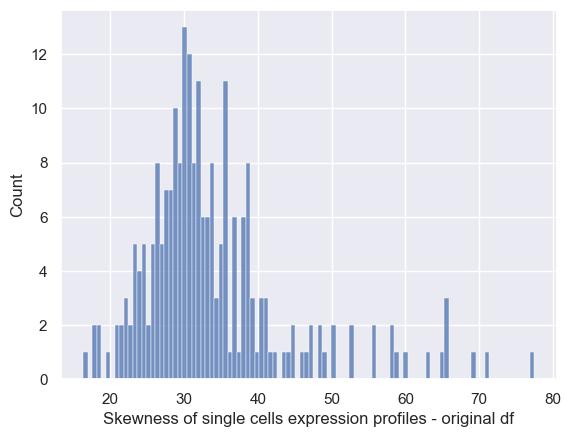

In [378]:
# skewness of normalized and filtered data set
cells_filt = df.columns
col_num = np.shape(df)[1]
df_skew_cells = []

for i in range(col_num):      
     df_skew_cells += [df[cells_filt[i]].skew()]
sns.histplot(df_skew_cells, bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

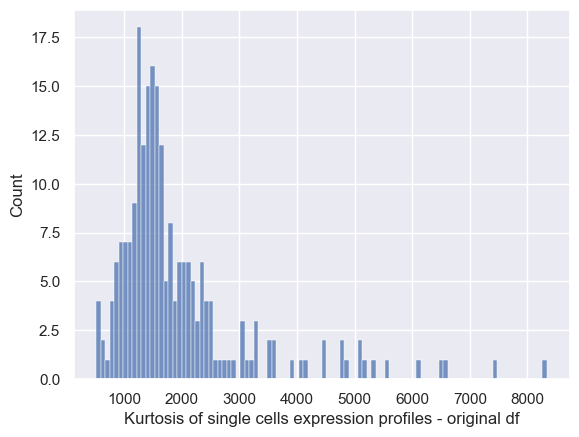

In [379]:
# kurtosis of normalized and filtered data set
df_kurt_cells = []
for i in range(col_num) :     
    df_kurt_cells += [df[cells_filt[i]].kurt()]
sns.histplot(df_kurt_cells, bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')

Since they are still pretty messy, we apply a logarithmic transformation, which is a potential solution to address the issue of skewed distribution of gene expression data. Using the logarithmic base 2 transformation is common as adding 1 to the data indicates doubling of the feature abundance (gene expression) and subtracting 1 indicates halving of the feature abundance. \
\
This transformation makes the changes in the feature abundance symmetric in both directions, so up-regulation and down-regulation of a gene with respect to a control is symmetrical. The transformed data can then be visualized using a boxplot to check if the distribution has become more normal and to identify any outliers.

In [380]:
df_log2 = np.log2(df+1)

In [381]:
df_log2.describe()

"output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                        
mean                                            2.161347                        
std                                             2.821725                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             0.000000                        
75%                                             4.543681                        
max                                            13.894710                        

       "output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                       
mean                                            2.237882                       
std                                             2.864785                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                             4.751468                       
max                                            13.795440                       

       "output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                     
mean                                            2.177615                     
std                                             2.820940                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             4.526435                     
max                                            14.773327                     

       "output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                    
mean                                            2.217184                    
std                                             2.874124                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             4.773052                    
max                                            14.340587                    

       "output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                    
mean                                            1.786393                    
std                                             2.753799                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             4.038348                    
max                                            15.394207                    

       "output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam"  \
count                                       23342.000000                      
mean                                            1.973229                      
std                                             2.862309                      
min                                             0.000000                      
25%                                             0.000000              

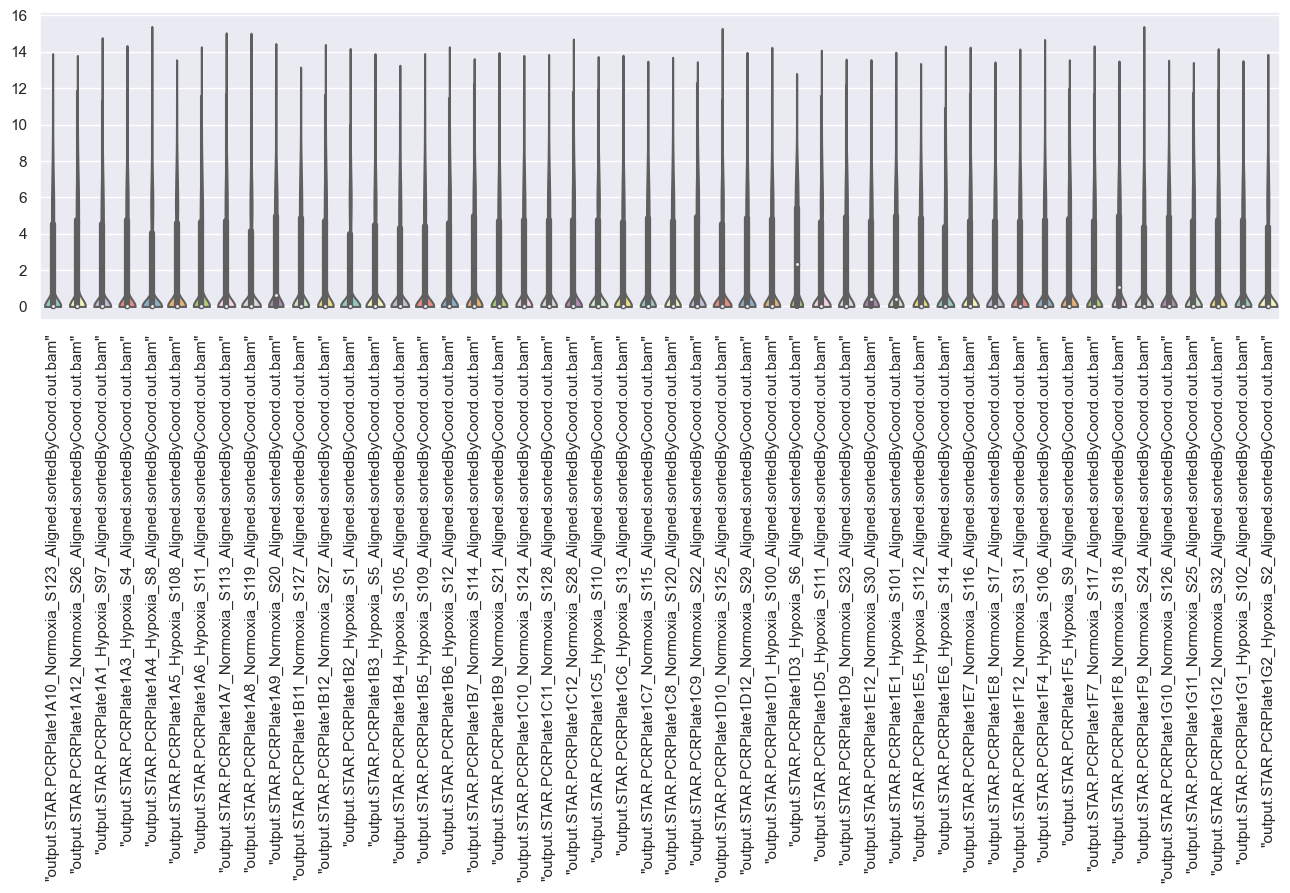

In [382]:
# Selecting part of the data, as the plots would otherwise take too long to generate
df_log2_small = df_log2.iloc[:, :50]
plt.figure(figsize=(16,4))
plot = sns.violinplot(data=df_log2_small, palette="Set3", cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Text(0.5, 0, 'Skewness of single cells expression profiles - log2 df')

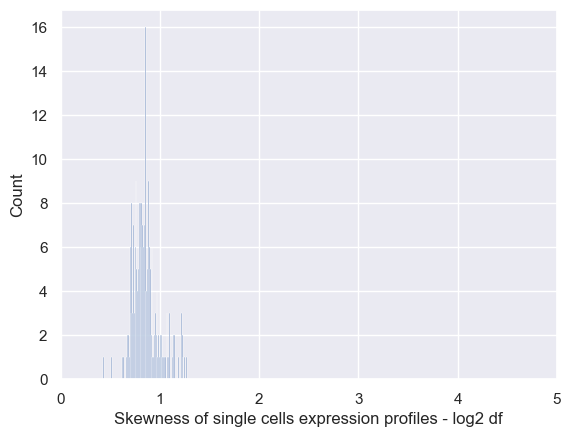

In [383]:
df_log2_skew = []
for i in range(col_num) :     
     v_df = df_log2[cells_filt[i]]
     df_log2_skew += [skew(v_df)]   
sns.histplot(df_log2_skew, bins=100)
plt.xlim(0, 5)
plt.xlabel('Skewness of single cells expression profiles - log2 df')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - log2 df')

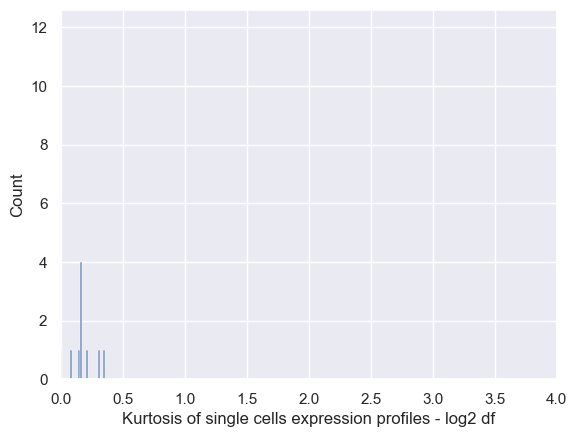

In [384]:
df_log2_kurt = []
for i in range(col_num) :     
     v_df = df_log2[cells_filt[i]]
     df_log2_kurt += [kurtosis(v_df)] 
sns.histplot(df_log2_kurt, bins=100)
plt.xlim(0, 4)
plt.xlabel('Kurtosis of single cells expression profiles - log2 df')

The values of skewness and kurtosis have improved (both being close to 0 for pretty much every cell), so we can keep this transformation for now.

In [385]:
df = df_log2.copy() # Using the logarithmic transformation of the data as our dataset from now on

### Enrichment Analysis 

Enrichment analysis, as already mentioned in the MCF7 case, is a widely used method in bioinformatics and functional genomics to gain insights into the biological meaning and significance of a set of genes or proteins. 

We proceed with defining a set of marker genes: we manually investigate the ones present in our dataset from the wider set of known genes Peng-Ju et al, 2020.<br>

In [386]:
# !pip install --upgrade scanpy

from scipy.stats import hypergeom
import scanpy as sc

In [387]:
gene_data = sc.AnnData(df).T

In [388]:
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    "ID2-hi myeloid prog": [
        "CD14",
        "ID2",
        "VCAN",
        "S100A9",
        "CLEC12A",
        "KLF4",
        "PLAUR",
    ],
    "cDC1": ["CLEC9A", "CADM1"],
    "cDC2": [
        "CST3",
        "COTL1",
        "LYZ",
        "DMXL2",
        "CLEC10A",
        "FCER1A",
    ],  
    "Normoblast": ["SLC4A1", "SLC25A37", "HBB", "HBA2", "HBA1", "TFRC"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    "Proerythroblast": [
        "CDK6",
        "SYNGR1",
        "HBM",
        "GYPA",
    ],  
    "NK": ["GNLY", "NKG7", "CD247", "GRIK4", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Lymph prog": [
        "VPREB1",
        "MME",
        "EBF1",
        "SSBP2",
        "BACH2",
        "CD79B",
        "IGHM",
        "PAX5",
        "PRKCE",
        "DNTT",
        "IGLL1",
    ],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    "B1 B": [
        "MS4A1",
        "SSPN",
        "ITGB1",
        "EPHA4",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "CD38",
        "XBP1",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
        "ZNF215",
    ],  
    "Transitional B": ["MME", "CD38", "CD24", "ACSM3", "MSI2"],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    "Plasmablast": ["XBP1", "RF4", "PRDM1", "PAX5"],  
    "CD4+ T activated": ["CD4", "IL7R", "TRBC2", "ITGB1"],
    "CD4+ T naive": ["CD4", "IL7R", "TRBC2", "CCR7"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T activation": ["CD69", "CD38"],  
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
    "G/M prog": ["MPO", "BCL2", "KCNQ5", "CSF3R"],
    "HSC": ["NRIP1", "MECOM", "PROM1", "NKAIN2", "CD34"],
    "MK/E prog": [
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],   
    'Endothelial cells': ['VEGFA', 'SLC2A1', 'PGAM1', 'LDHA'],
    'Fibroblasts': ['TPI1', 'P4HA1', 'MRPS17', 'CDKN3'],
    'Adipocytes': ['ADM', 'NDRG1', 'TUBB6'],
    'Myocytes': ['ALDOA', 'MIF']
}

In [389]:
marker_genes_d = {}
for path, markers in marker_genes.items():
    markers_f = []
    for marker in markers:
        marker = '"' + marker + '"'
        if marker in gene_data.var_names:
            markers_f.append(marker)
    if markers_f:
        marker_genes_d[path] = markers_f

These are the marker genes we found in our data:

In [390]:
marker_genes_d

{'CD14+ Mono': ['"CD14"'],
 'CD16+ Mono': ['"TCF7L2"', '"LYN"'],
 'ID2-hi myeloid prog': ['"CD14"',
  '"ID2"',
  '"VCAN"',
  '"S100A9"',
  '"KLF4"',
  '"PLAUR"'],
 'cDC1': ['"CADM1"'],
 'cDC2': ['"CST3"', '"COTL1"', '"DMXL2"'],
 'Normoblast': ['"SLC25A37"', '"HBA2"', '"HBA1"', '"TFRC"'],
 'Erythroblast': ['"MKI67"', '"HBA1"'],
 'Proerythroblast': ['"CDK6"', '"SYNGR1"', '"HBM"'],
 'NK': ['"CD247"', '"GRIK4"', '"FCER1G"', '"KLRG1"'],
 'ILC': ['"ID2"', '"PLCG2"', '"SYNE1"'],
 'Lymph prog': ['"MME"', '"EBF1"', '"SSBP2"', '"BACH2"', '"PRKCE"'],
 'Naive CD20+ B': ['"IL4R"'],
 'B1 B': ['"SSPN"',
  '"ITGB1"',
  '"EPHA4"',
  '"COL4A4"',
  '"PRDM1"',
  '"CD38"',
  '"XBP1"',
  '"BCL11A"',
  '"ZNF215"'],
 'Transitional B': ['"MME"', '"CD38"', '"CD24"', '"ACSM3"', '"MSI2"'],
 'Plasma cells': ['"MZB1"', '"HSP90B1"', '"FNDC3B"', '"PRDM1"'],
 'Plasmablast': ['"XBP1"', '"PRDM1"'],
 'CD4+ T activated': ['"CD4"', '"IL7R"', '"TRBC2"', '"ITGB1"'],
 'CD4+ T naive': ['"CD4"', '"IL7R"', '"TRBC2"', '"CCR7"'],


Now we perform the actual Enrichment analysis with Fisher's exact test. <br>
In this particular analysis, genes are assigned to predefined gene sets or pathways. The overlap between the genes in the pathway and the genes in the dataset is evaluated using Fisher's exact test to assess the statistical significance of the overlap.<br>
The output of this analysis includes p-values and odds ratios for each pathway, indicating the enrichment or depletion of pathway genes in the dataset.


In [391]:
import statsmodels.stats.multitest as smm
from scipy import stats

gene_expression_data = gene_data
gene_ranking = gene_expression_data.X.mean(axis=0)  


enrichment_results = {}
total_genes = len(gene_expression_data)


for pathway, genes in marker_genes_d.items():
    pathway_genes = set(genes)
    pathway_genes_in_data = pathway_genes.intersection(set(gene_expression_data.var_names))
    print(f"Pathway: {pathway}")
    print(f"Genes in pathway: {genes}")
    print(f"Genes in data: {pathway_genes_in_data}")
    pathway_gene_count = len(pathway_genes_in_data)
    overlap_count = len(pathway_genes_in_data.intersection(set(gene_expression_data.var_names)))
    odds_ratio, p_value = stats.fisher_exact([[overlap_count, pathway_gene_count], [total_genes, len(gene_ranking)]])

    enrichment_results[pathway] = {
        'Genes': pathway_genes_in_data,
        'Overlap Count': overlap_count,
        'P-Value': p_value
    }


p_values = [result['P-Value'] for result in enrichment_results.values()]
reject, p_corrected, _, _ = smm.multipletests(p_values, method='fdr_bh')

# Visualisation
for pathway, result in enrichment_results.items():
    genes = ', '.join(result['Genes'])
    overlap_count = result['Overlap Count']
    p_value = result['P-Value']
    fdr = p_corrected[list(enrichment_results.keys()).index(pathway)]

    print(f"Pathway: {pathway}")
    print(f"Genes: {genes}")
    print(f"Overlap Count: {overlap_count}")
    print(f"P-Value: {p_value}")
    print(f"FDR: {fdr}")
    print("-----------------------")

Pathway: CD14+ Mono
Genes in pathway: ['"CD14"']
Genes in data: {'"CD14"'}
Pathway: CD16+ Mono
Genes in pathway: ['"TCF7L2"', '"LYN"']
Genes in data: {'"TCF7L2"', '"LYN"'}
Pathway: ID2-hi myeloid prog
Genes in pathway: ['"CD14"', '"ID2"', '"VCAN"', '"S100A9"', '"KLF4"', '"PLAUR"']
Genes in data: {'"ID2"', '"S100A9"', '"CD14"', '"KLF4"', '"VCAN"', '"PLAUR"'}
Pathway: cDC1
Genes in pathway: ['"CADM1"']
Genes in data: {'"CADM1"'}
Pathway: cDC2
Genes in pathway: ['"CST3"', '"COTL1"', '"DMXL2"']
Genes in data: {'"COTL1"', '"CST3"', '"DMXL2"'}
Pathway: Normoblast
Genes in pathway: ['"SLC25A37"', '"HBA2"', '"HBA1"', '"TFRC"']
Genes in data: {'"TFRC"', '"HBA1"', '"SLC25A37"', '"HBA2"'}
Pathway: Erythroblast
Genes in pathway: ['"MKI67"', '"HBA1"']
Genes in data: {'"MKI67"', '"HBA1"'}
Pathway: Proerythroblast
Genes in pathway: ['"CDK6"', '"SYNGR1"', '"HBM"']
Genes in data: {'"HBM"', '"CDK6"', '"SYNGR1"'}
Pathway: NK
Genes in pathway: ['"CD247"', '"GRIK4"', '"FCER1G"', '"KLRG1"']
Genes in data: {

Let's perform some plots that will help us visualise the results.

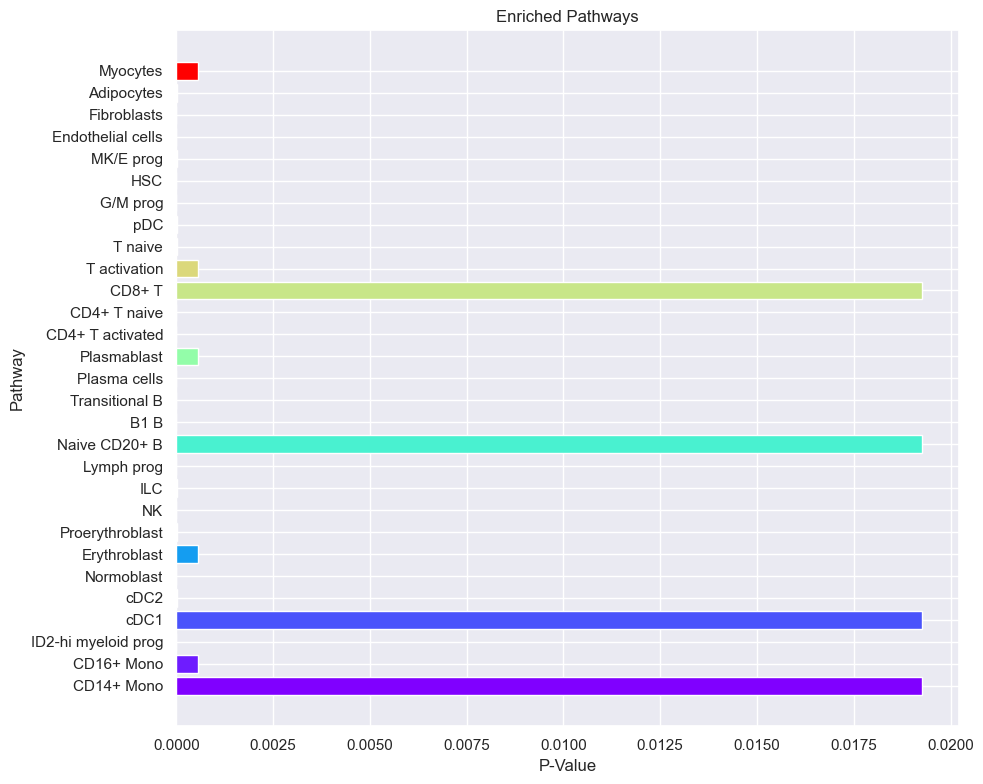

In [392]:
terms = [pathway for pathway in enrichment_results.keys()]
p_values = [result['P-Value'] for result in enrichment_results.values()]
gene_counts = [result['Overlap Count'] for result in enrichment_results.values()]

plt.figure(figsize=(10, 8))
bar_colors = plt.cm.rainbow(np.linspace(0, 1, len(terms)))  # Use a colormap for coloring the bars
plt.barh(range(len(terms)), p_values, tick_label=terms, color=bar_colors)

plt.xlabel('P-Value')
plt.ylabel('Pathway')
plt.title('Enriched Pathways')
plt.tight_layout()

plt.show()

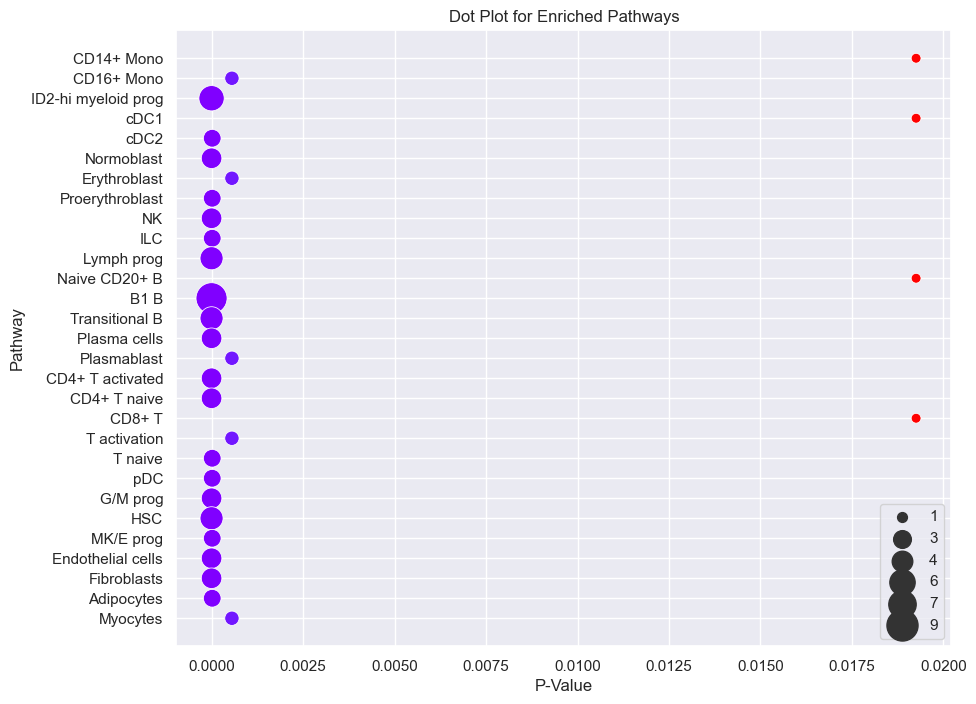

In [393]:
terms = [pathway for pathway in enrichment_results.keys()]
p_values = [result['P-Value'] for result in enrichment_results.values()]
gene_counts = [result['Overlap Count'] for result in enrichment_results.values()]

plt.figure(figsize=(10, 8))

color_map = plt.cm.get_cmap('rainbow')
norm = plt.Normalize(min(p_values), max(p_values))
colors = color_map(norm(p_values))

sns.scatterplot(x=p_values, y=terms, size=gene_counts, sizes=(50, 500), c=colors)
plt.xlabel('P-Value')
plt.ylabel('Pathway')
plt.title('Dot Plot for Enriched Pathways')

plt.show()

The enrichment analysis of HCC (hepatocellular carcinoma) and a previous analysis of breast adenocarcinoma revealed common enriched pathways such as CD14+ Mono, CD16+ Mono, and lymphocyte-related pathways (Normoblast, Erythroblast, Proerythroblast, ILC, and Lymph prog). These pathways suggest the presence of immune cell populations and immune-related processes within the tumor microenvironment in both types of cancer. Additionally, HCC showed enrichment in ID2-hi myeloid prog, cDC1, cDC2, Naive CD20+ B and CD8+ T  pathways. <br>
<br>
The first three indicate dysregulation of myeloid progenitor cells and the involvement of dendritic cells in immune responses. While the enrichment of Naive CD20+ B cells indicates the potential role of B lymphocytes in HCC, while the enrichment of CD8+ T cells suggests the presence of cytotoxic T lymphocytes with antitumor activity.<br>
<br>
The comparison highlights both shared and unique aspects of immune cell involvement in HCC and breast adenocarcinoma. Further investigation and experimental validation are required to understand the precise roles of these pathways in the development and progression of each cancer type.

The next plot will help us visualise the relatedness of the pathways and identify groups of terms that share similar characteristics or functions.

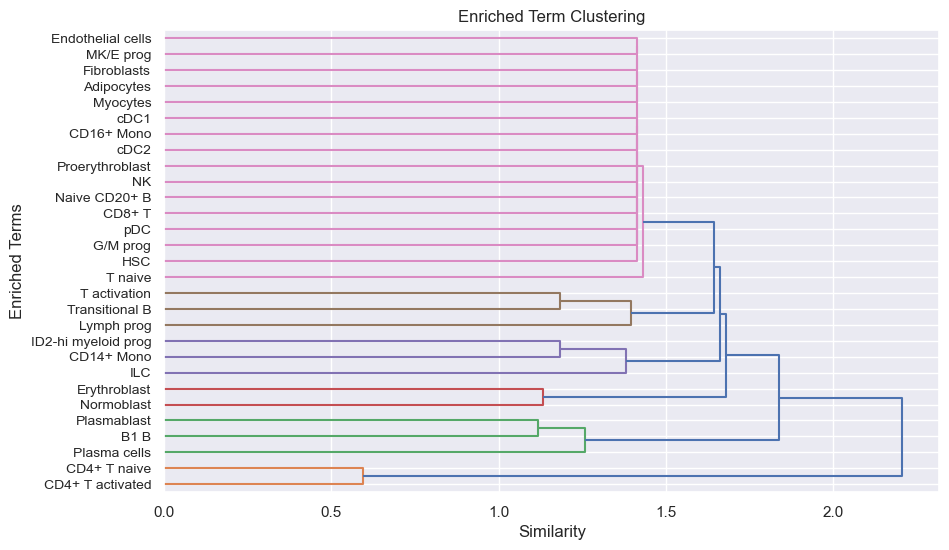

In [394]:
import scipy.cluster.hierarchy as sch

df_enrichment = pd.DataFrame.from_dict(enrichment_results, orient='index')

term_similarities = np.zeros((len(df_enrichment), len(df_enrichment)))
for i, row1 in enumerate(df_enrichment.itertuples()):
    for j, row2 in enumerate(df_enrichment.itertuples()):
        genes1 = set(getattr(row1, 'Genes'))
        genes2 = set(getattr(row2, 'Genes'))
        intersection = len(genes1.intersection(genes2))
        union = len(genes1.union(genes2))
        term_similarities[i, j] = intersection / union

linkage = sch.linkage(term_similarities, method='ward')

plt.figure(figsize=(10, 6))
sch.dendrogram(linkage, labels=df_enrichment.index, orientation='right')
plt.xlabel('Similarity')
plt.ylabel('Enriched Terms')
plt.title('Enriched Term Clustering')
plt.show()

### Feature Selection

Feature selection can be applied to most of the models we will use later especially since we are dealing with high-dimensional datasets, or suspected irrelevant features.

Filter feature selection methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to choose (filter) those input variables that will be used in the model. \
\
Since the input data is numerical, and the output is categorical we choose ANOVA as feature selection method. 
We will use `f_classif` function from the sklearn.feature_selection module. \
Moreover, we set the parameter k of the `SelectKBest()` function to be equal to 3000 to be able to effectively compare our filtered data set with the given prefiltered data set (containing 3000 most important features). 

We will also check for genes that have constant expression across all samples. If there are some we will remove them since they do not provide any discriminatory information. 

In [395]:
constant_features = df.index[df.T.var() == 0]
df = df.drop(constant_features, axis=0)
print(constant_features)

Index(['"SELE"', '"RPS3AP53"', '"BSN"', '"MRPL22P1"', '"RIPOR2"', '"LDHAL6CP"',
       '"HRH4"', '"C18orf63"'],
      dtype='object')


In [396]:
from sklearn.feature_selection import SelectKBest, f_classif

conditions = []
for cell in df.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")

selector = SelectKBest(score_func=f_classif, k=3000)
selected_arr = selector.fit_transform(df.T, conditions)

selected_indices = selector.get_support(indices=True)
selected_features = df.T.columns[selected_indices]

df_selected = df.iloc[selected_indices]

print("Selected Features:", len(selected_features))

Selected Features: 3000


In [397]:
df = df_selected.copy()

### PCA

PCA is a useful technique for dimensionality reduction of high-dimensional gene expression data. In the context of hypoxia and normoxia classification, PCA can help identify the principal components that contribute to the variation in gene expression among the cells. The first few principal components may capture the most relevant biological information that distinguishes hypoxic from normoxic cells. Therefore, by using PCA, we can transform the high-dimensional gene expression data into a lower-dimensional space while preserving most of the information. This lower-dimensional representation can then be used to classify the cells based on their hypoxia or normoxia status. \
\
Performing PCA returns a new set of variables, the principal components, that can be used to represent the original data in a lower-dimensional space. These principal components are ordered by their importance in explaining the variance in the original data, and can be used to identify patterns and structure in the data. \
\
We will use our pre-filtered and normalised dataset, since PCA is sensitive to the scale of the variables.

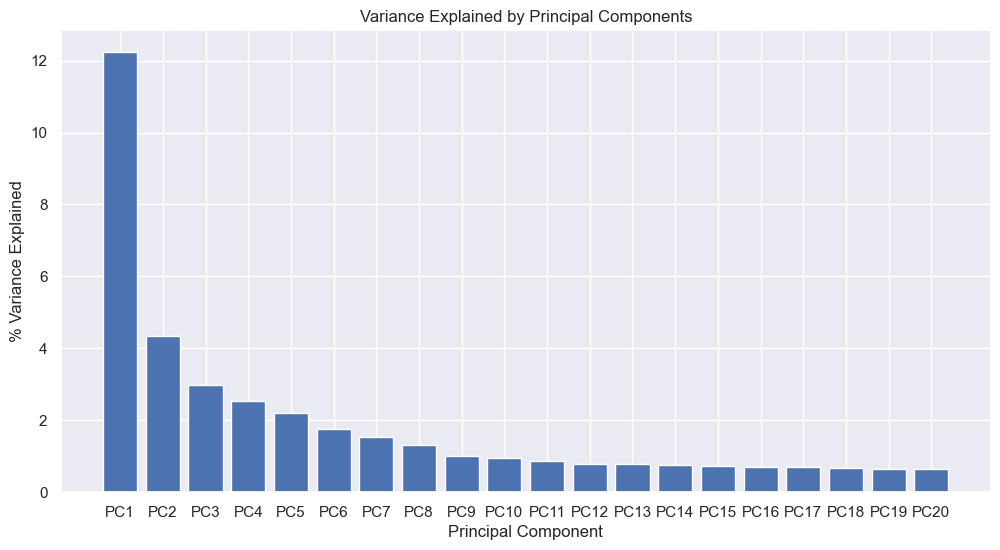

0.12234543373183132


In [398]:
from sklearn.preprocessing import StandardScaler

df_standardized = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
data_flat = pd.Series(df_standardized.values.flatten())

pca_20 = PCA(n_components=20)
pca_20.fit(df_standardized.T)

# Plot the variance explained by each principal component
labels = ['PC{}'.format(i+1) for i in range(20)]
plt.figure(figsize = (12,6))
plt.bar(labels, pca_20.explained_variance_ratio_ * 100)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()
print(pca_20.explained_variance_ratio_[0])

Note how the first component explains more variance compared to other components in the dataset (around 12%).

In [399]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_standardized.T)
df_pca.shape

(227, 191)

From this code, we evince that 95% of variance is captured by 191 components; we will still plot our dataset in 2 and 3 dimensions, but the results will not be as accurate.

In [400]:
import plotly.express as px

conditions = []
for cell in df.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")
    
pca = PCA(n_components=2)
components = pca.fit_transform(df_standardized.T)
fig = px.scatter(components, x=0, y=1, color=conditions)
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    title='2D PCA Scatter Plot'
)
fig.show()

In [401]:
pca_3 = PCA(n_components=3)
components = pca_3.fit_transform(df_standardized.T)

total_var = pca_3.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=conditions,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()


### t-SNE

**T-distributed Stochastic Neighbor Embedding**


After performing PCA, our attention focused on computing t-SNE, a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

After having clarified its goal, we want to point out that we decided to proceed with it in order to compare results with the latter ones (from PCA) and deduce similarities, if present.

In [402]:
import plotly.express as px
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
components = tsne.fit_transform(df_standardized.T)

df_tsne = pd.DataFrame(data = components, columns = ['Component 1', 'Component 2'])
df_tsne['Condition'] = conditions

fig = px.scatter(df_tsne, x='Component 1', y='Component 2', color='Condition')
fig.update_layout(
    xaxis_title='Component 1',
    yaxis_title='Component 2',
    title='2D t-SNE Scatter Plot'
)
fig.show()

In [403]:
import plotly.express as px
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
components = tsne.fit_transform(df_standardized.T)
df_tsne = pd.DataFrame(data = components, columns = ['Component 1', 'Component 2', 'Component 3'])
df_tsne['Condition'] = conditions
fig = px.scatter_3d(df_tsne, x='Component 1', y='Component 2', z='Component 3', color='Condition')
fig.update_layout(
    title='3D t-SNE Scatter Plot'
)
fig.show()


By looking at the plots, we find similarities with PCA, meaning that this dimensionality reduction could also be taken in account.

### Clustering

We want to investigate whether there are some clusters in the dataset, therefore we proceed with the unsupervised clustering algorithm k-means. \
First, we apply UMAP for dimensionality reduction.

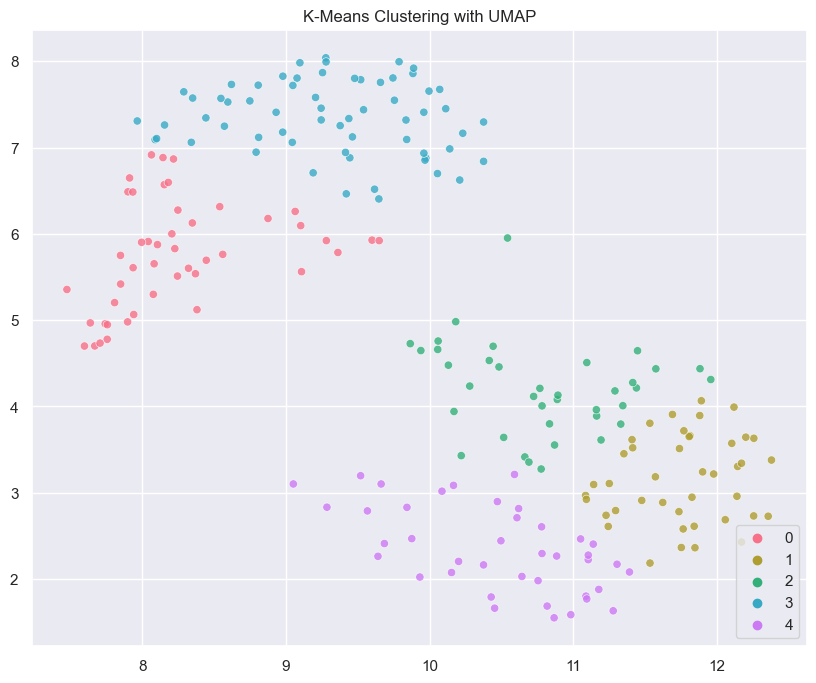

In [404]:
import umap
from sklearn.cluster import KMeans

non_zero_cols = df.columns[df.sum() > 0]
non_zero_df = df[non_zero_cols]

reducer = umap.UMAP()
embedding = reducer.fit_transform(non_zero_df.T)

# cluster with KMeans
n_clusters = 5  # set number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embedding)

# plot results
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(
    x=embedding[:, 0], y=embedding[:, 1],
    hue=kmeans.labels_, palette=sns.color_palette('husl', n_clusters),
    legend='full', alpha=0.8, ax=ax
)
ax.set_title('K-Means Clustering with UMAP')
ax.legend(loc='lower right')
plt.show()

We obtain some well-separated clusters in the UMAP embadding, which could mean that the cells come from distinct subpopulations with different roles. Indeed with further investigations, for example by using Gene Set Enrichment Analysis (GSEA), we could identify the functions of the cells in the clusters. More precisely the mentioned technique allows to identify wether the cells present enriched genes, which are the ones that are overrepresented in a particular group of genes compared to their expected frequency in the genome. Enrichment analysis is indeed particularly useful in cancer research to identify gene sets that are differentially expressed or mutated in cancer cells compared to normal cells, and thus may be involved in the development or progression of cancer. 

# **Training Dataset**

In this section of the project we are aiming to build a classification model which efficiently predicts the cell condition. We are going to train in on the given training data set which only contains 3000 features selected based on the variance (`HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt`). \
\
Later, after building the model and checking its performance, we will also build a model on the given unfiltered data set which we have explored, normalized, and filtered above. 

## **EDA**

### Data analysis

Let us first explore and understand this data set by performing standard EDA. 

In [405]:
dfn = pd.read_csv("HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(dfn))
print("First column: ", dfn.iloc[ : , 0])

Dataframe dimensions: (3000, 182)
First column:  "DDIT4"          0
"ANGPTL4"       48
"CALML5"         0
"KRT14"        321
"CCNB1"        298
              ... 
"LINC02693"     29
"OR8B9P"         0
"NEAT1"         29
"ZDHHC23"        0
"ODAD2"          0
Name: "output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam", Length: 3000, dtype: int64


In [406]:
dfn.head()

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                    0                       
"ANGPTL4"                                                 48                       
"CALML5"                                                   0                       
"KRT14"                                                  321                       
"CCNB1"                                                  298                       

           "output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 8739                      
"ANGPTL4"                                               2101                      
"CALML5"                                                  55                      
"KRT14"                                                   96                      
"CCNB1"                                                 1824                      

           "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                13098                    
"ANGPTL4"                                              14032                    
"CALML5"                                                   0                    
"KRT14"                                                    0                    
"CCNB1"                                                 1616                    

           "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 2880                    
"ANGPTL4"                                                356                    
"CALML5"                                                   0                    
"KRT14"                                                 6211                    
"CCNB1"                                                    3                    

           "output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 7777                      
"ANGPTL4"                                               5661                      
"CALML5"                                                4383                      
"KRT14"                                                    0                      
"CCNB1"                                                  145                      

           "output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  208                       
"ANGPTL4"                                                  0                       
"CALML5"                                                1902                       
"KRT14"                                                    0                       
"CCNB1"                                                  378                       

           "output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  750                      
"ANGPTL4"                                                  0                      
"CALML5"                                                   0                      
"KRT14"                                                 5050                      
"CCNB1"                                                   66                      

           "output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  127                       
"ANGPTL4"                                                  0                       
"CALML5"                                                   0                       
"KRT14"                                                  462                       
"CCNB1"                                                   58                       

           "output.STAR.P

In [407]:
# duplicate rows
duplicate_rows_tot_n = dfn.duplicated(keep=False).sum()
print(f"There are {duplicate_rows_tot_n} duplicate rows.")

There are 2 duplicate rows.


In [408]:
dfn.drop_duplicates(keep='first', inplace=True)

In [409]:
# duplicate columns
duplicate_cols_n = dfn.columns[dfn.transpose().duplicated()].tolist()

if duplicate_cols_n:
    print(f"The following columns are duplicated: {duplicate_cols_n}")
else:
    print("There are no duplicated columns.")

There are no duplicated columns.


First step is to quickly check the summary statistics. Since the data set has been filtered and normalized we expect no surprising information. Firstly, note that the value for standard deviation differs across the genes which means that the variability or dispersion of the data between those genes differs. 

In [410]:
dfn.describe()

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000                       
mean                                          149.402801                       
std                                          1052.725239                       
min                                             0.000000                       
25%                                             0.000000                       
50%                                             0.000000                       
75%                                             5.500000                       
max                                         39148.000000                       

       "output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000                      
mean                                          182.363788                      
std                                           871.586165                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                            33.000000                      
max                                         22572.000000                      

       "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000                    
mean                                          179.005335                    
std                                           965.242864                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                             0.000000                    
max                                         21430.000000                    

       "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000                    
mean                                          168.239413                    
std                                           918.362142                    
min                                             0.000000                    
25%                                             0.000000                    
50%                                             0.000000                    
75%                                            30.000000                    
max                                         24033.000000                    

       "output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000                      
mean                                          184.461487                      
std                                          1267.905384                      
min                                             0.000000                      
25%                                             0.000000                      
50%                                             0.000000                      
75%                                             0.000000                      
max                                         32768.000000                      

       "output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000                       
mean                                          168.928309                       
std                                          1608.244254                       
min                                             0.000000                       
25%                                             0.000000                  

### Sparsity

<Axes: >

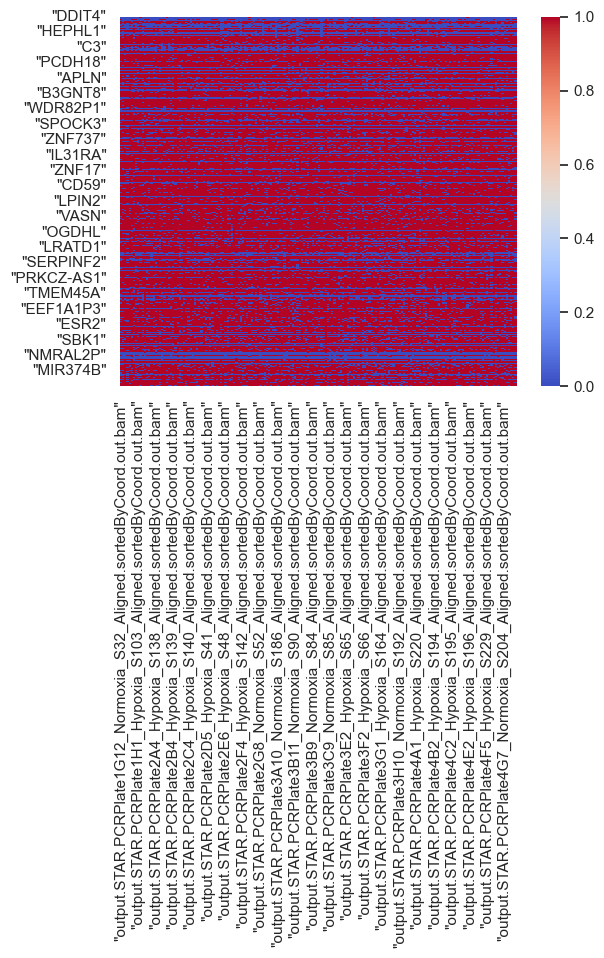

In [411]:
sns.heatmap(dfn == 0, cmap="coolwarm")

In [412]:
sparse_dfn = csr_matrix(dfn.values) # Converts DataFrame into a CSR sparse matrix
print(sparse_dfn)

density_n = np.count_nonzero(sparse_dfn.toarray()) / np.prod(sparse_dfn.shape)
print(f"Sparsity: {1 - density_n:.2%}")

  (0, 1)	8739
  (0, 2)	13098
  (0, 3)	2880
  (0, 4)	7777
  (0, 5)	208
  (0, 6)	750
  (0, 7)	127
  (0, 8)	10313
  (0, 9)	13523
  (0, 10)	6181
  (0, 11)	2796
  (0, 12)	404
  (0, 13)	121
  (0, 14)	6901
  (0, 15)	12430
  (0, 16)	5655
  (0, 17)	5647
  (0, 18)	467
  (0, 19)	179
  (0, 20)	504
  (0, 21)	9425
  (0, 22)	6323
  (0, 23)	2458
  (0, 24)	10719
  (0, 25)	15032
  :	:
  (2997, 167)	17
  (2997, 175)	38
  (2997, 176)	145
  (2997, 178)	53
  (2997, 180)	5
  (2997, 181)	4
  (2998, 15)	7
  (2998, 16)	67
  (2998, 17)	4
  (2998, 31)	57
  (2998, 35)	18
  (2998, 55)	6
  (2998, 62)	15
  (2998, 66)	7
  (2998, 72)	4
  (2998, 79)	3
  (2998, 90)	26
  (2998, 117)	7
  (2998, 124)	7
  (2998, 127)	48
  (2998, 150)	16
  (2998, 159)	29
  (2998, 161)	24
  (2998, 164)	15
  (2998, 171)	36
Sparsity: 70.64%


The level of sparsity is 70.64% which is (again) pretty high. As mentioned before, 0 values are common in this setting so the result is not surprising. 

### Skewness

Text(0.5, 1.0, 'Distribution of skewness values for genes')

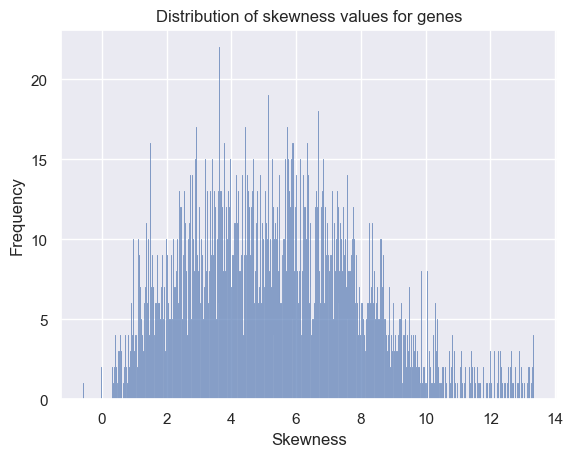

In [413]:
from scipy.stats import skew

column_num = np.shape(dfn)[1]
cells_n = list(dfn.columns)

skewness = dfn.apply(skew, axis=1)

sns.histplot(skewness, bins=500)  # skewness of genes
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Distribution of skewness values for genes')



As mentioned before, skweness is the measure of the lack of symmetry in the data set. From the histogram we see that the data is positively skewed.

### Kurtosis

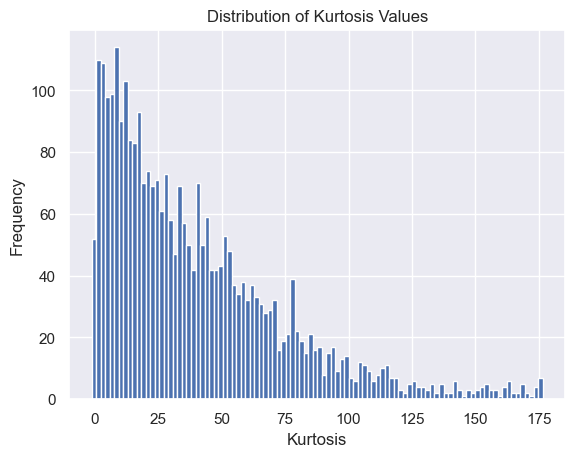

In [414]:
from scipy.stats import kurtosis

kurt = kurtosis(dfn, axis=1)

plt.hist(kurt, bins=100)
plt.xlabel('Kurtosis')
plt.ylabel('Frequency')
plt.title('Distribution of Kurtosis Values')
plt.show()


Kurtosis is the measure of peakness of distribution. Here the kurtosis is positive, showing a non-normality of data.


### Distribution

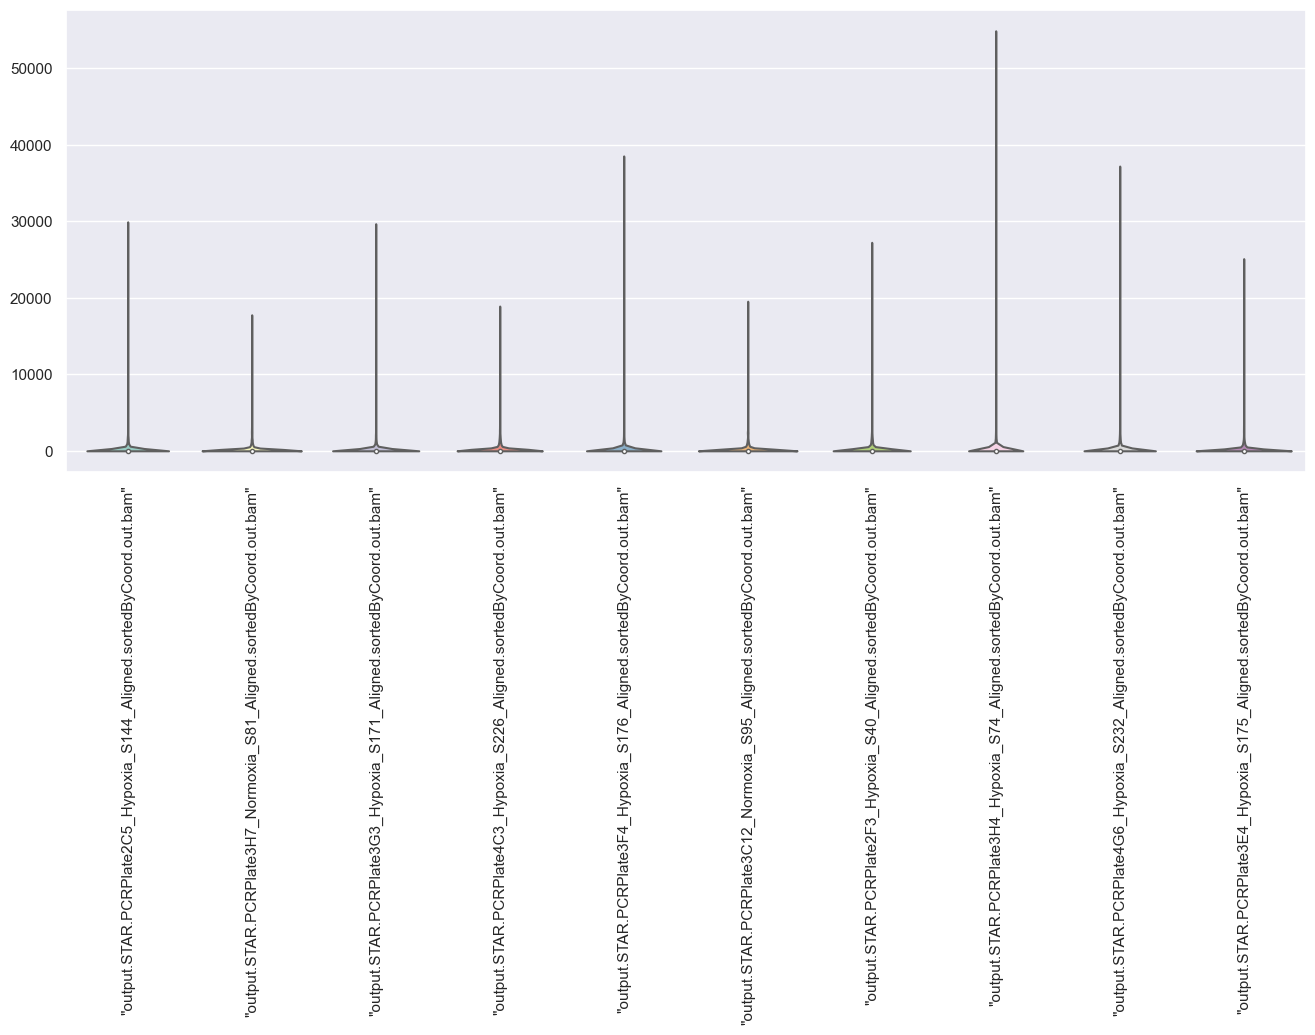

In [415]:
n = 10
random_cells_n = np.random.choice(dfn.columns, size=n, replace=False)
plt.figure(figsize=(16,6))
violin_plot = sns.violinplot(data=dfn[random_cells_n], palette="Set3", cut=0)
plt.setp(violin_plot.get_xticklabels(), rotation=90)
plt.show()

## **T-test**

The t-test is a statistical test that allows us to determine whether the difference in gene expression between the two groups is statistically significant. In particular, the t-test calculates a t-value, which measures the difference between the means of the two groups relative to the variability within the groups.
In our context, since we do not have a specific criteria to divide cells in two group, we decided to proceed in the following sense:
- normalize data (to account for differences in sequencing depth and other technical factors that may affect the data.) For this part we will use the HCC1806_SmartS_filtered_normalised_3000_Data_train.txt.
- compute the t-test for each gene on the resulting 2 groups of hypo and norm cells 

In [416]:
dfn= pd.read_csv("HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(dfn))
print("First column: ", dfn.iloc[ : ,1])

Dataframe dimensions: (3000, 182)
First column:  "DDIT4"        8739
"ANGPTL4"      2101
"CALML5"         55
"KRT14"          96
"CCNB1"        1824
               ... 
"LINC02693"      68
"OR8B9P"          0
"NEAT1"         213
"ZDHHC23"         0
"ODAD2"           0
Name: "output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam", Length: 3000, dtype: int64


In [417]:
dfn.head()

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                    0                       
"ANGPTL4"                                                 48                       
"CALML5"                                                   0                       
"KRT14"                                                  321                       
"CCNB1"                                                  298                       

           "output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 8739                      
"ANGPTL4"                                               2101                      
"CALML5"                                                  55                      
"KRT14"                                                   96                      
"CCNB1"                                                 1824                      

           "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                13098                    
"ANGPTL4"                                              14032                    
"CALML5"                                                   0                    
"KRT14"                                                    0                    
"CCNB1"                                                 1616                    

           "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 2880                    
"ANGPTL4"                                                356                    
"CALML5"                                                   0                    
"KRT14"                                                 6211                    
"CCNB1"                                                    3                    

           "output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 7777                      
"ANGPTL4"                                               5661                      
"CALML5"                                                4383                      
"KRT14"                                                    0                      
"CCNB1"                                                  145                      

           "output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  208                       
"ANGPTL4"                                                  0                       
"CALML5"                                                1902                       
"KRT14"                                                    0                       
"CCNB1"                                                  378                       

           "output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  750                      
"ANGPTL4"                                                  0                      
"CALML5"                                                   0                      
"KRT14"                                                 5050                      
"CCNB1"                                                   66                      

           "output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  127                       
"ANGPTL4"                                                  0                       
"CALML5"                                                   0                       
"KRT14"                                                  462                       
"CCNB1"                                                   58                       

           "output.STAR.P

 Now let's divide the normalised data into two groups:
 
- "hypo" cells 
- "norm" cells 

This will help us to better understand the statistically signficant genes 


In [418]:
# extract cells with "Hypo" in their names
hypo_cells = dfn.loc[:, dfn.columns.str.contains('Hypo')]

# extract cells with "Norm" in their names
norm_cells = dfn.loc[:, dfn.columns.str.contains('Norm')]
print(hypo_cells.shape)
print(norm_cells.shape)

(3000, 97)
(3000, 85)


In [419]:
hypo_cells.head()


"output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 8739                      
"ANGPTL4"                                               2101                      
"CALML5"                                                  55                      
"KRT14"                                                   96                      
"CCNB1"                                                 1824                      

           "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                13098                    
"ANGPTL4"                                              14032                    
"CALML5"                                                   0                    
"KRT14"                                                    0                    
"CCNB1"                                                 1616                    

           "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 2880                    
"ANGPTL4"                                                356                    
"CALML5"                                                   0                    
"KRT14"                                                 6211                    
"CCNB1"                                                    3                    

           "output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 7777                      
"ANGPTL4"                                               5661                      
"CALML5"                                                4383                      
"KRT14"                                                    0                      
"CCNB1"                                                  145                      

           "output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                10313                      
"ANGPTL4"                                                850                      
"CALML5"                                                   0                      
"KRT14"                                                 2127                      
"CCNB1"                                                  605                      

           "output.STAR.PCRPlate1H2_Hypoxia_S3_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                13523                    
"ANGPTL4"                                              10110                    
"CALML5"                                                   0                    
"KRT14"                                                    0                    
"CCNB1"                                                 1444                    

           "output.STAR.PCRPlate1H5_Hypoxia_S10_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 6181                     
"ANGPTL4"                                               1883                     
"CALML5"                                                 836                     
"KRT14"                                                    0                     
"CCNB1"                                                   67                     

           "output.STAR.PCRPlate1H6_Hypoxia_S16_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 2796                     
"ANGPTL4"                                               2417                     
"CALML5"                                                1831                     
"KRT14"                                                   51                     
"CCNB1"                                                  301                     

           "output.STAR.PCRPlate2A1_Hypoxia_S129_Aligned.sortedByCo

In [420]:
norm_cells.head()

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                    0                       
"ANGPTL4"                                                 48                       
"CALML5"                                                   0                       
"KRT14"                                                  321                       
"CCNB1"                                                  298                       

           "output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  208                       
"ANGPTL4"                                                  0                       
"CALML5"                                                1902                       
"KRT14"                                                    0                       
"CCNB1"                                                  378                       

           "output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  750                      
"ANGPTL4"                                                  0                      
"CALML5"                                                   0                      
"KRT14"                                                 5050                      
"CCNB1"                                                   66                      

           "output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  127                       
"ANGPTL4"                                                  0                       
"CALML5"                                                   0                       
"KRT14"                                                  462                       
"CCNB1"                                                   58                       

           "output.STAR.PCRPlate1H9_Normoxia_S122_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  404                       
"ANGPTL4"                                                 32                       
"CALML5"                                                   0                       
"KRT14"                                                 1893                       
"CCNB1"                                                 2796                       

           "output.STAR.PCRPlate2A10_Normoxia_S153_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  121                        
"ANGPTL4"                                                  0                        
"CALML5"                                                 163                        
"KRT14"                                                  283                        
"CCNB1"                                                  989                        

           "output.STAR.PCRPlate2A8_Normoxia_S151_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  467                       
"ANGPTL4"                                                  1                       
"CALML5"                                                   0                       
"KRT14"                                                 1289                       
"CCNB1"                                                   75                       

           "output.STAR.PCRPlate2A9_Normoxia_S53_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  179                      
"ANGPTL4"                                                  1                      
"CALML5"                                                 490                      
"KRT14"                                                    1                      
"CCNB1"                                                 1658 

By calculation the correlation matrices of Norm and Hypo cells we can check if there are some genes that are expressed differently between the two conditions.

In [421]:
corr1 = norm_cells.corr()
corr2 = hypo_cells.corr()

corr12 = corr1.corrwith(corr2, axis=1)
print(corr1)
print(f"Correlation between the two datasets: {corr12}")

                                                    "output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned....                                           1.000000                       
"output.STAR.PCRPlate1G7_Normoxia_S118_Aligned....                                           0.862591                       
"output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.s...                                           0.833445                       
"output.STAR.PCRPlate1G9_Normoxia_S121_Aligned....                                           0.905305                       
"output.STAR.PCRPlate1H9_Normoxia_S122_Aligned....                                           0.813057                       
...                                                                                               ...                       
"output.STAR.PCRPlate4G7_Normoxia_S204_Aligned....                                           0.747639                       


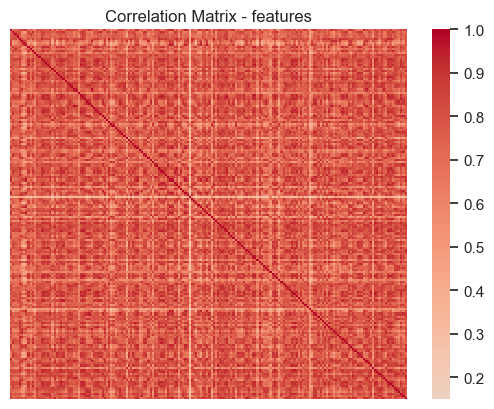

In [422]:
# Compute the correlation matrix for all pairs of cells based on genes
corr_matrix_n = dfn.corr() # pairwise correlation -> linear corr

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix_n, cmap="coolwarm", center=0, xticklabels=False, yticklabels=False)
midpoint = (corr_matrix_n.values.max() - corr_matrix_n.values.min()) /2 + corr_matrix_n.values.min()
plt.title("Correlation Matrix - features")
plt.show()

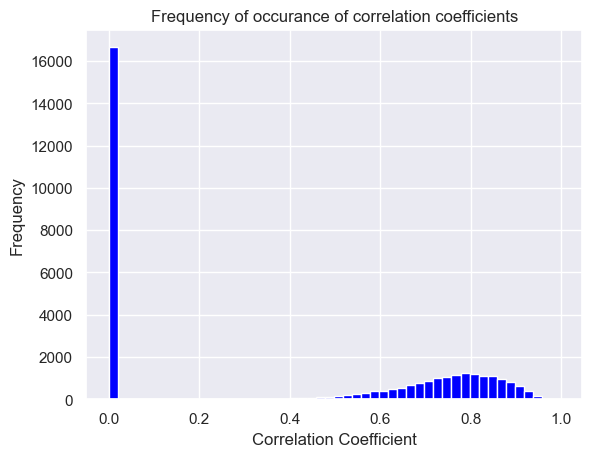

In [423]:
upper_triangular = np.triu(corr_matrix_n, k=1).flatten() 

plt.hist(upper_triangular, bins=50, color='blue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Frequency of occurance of correlation coefficients')
plt.show()

In [424]:
# perform t-test on each gene
results = []
for gene in dfn.index:
    pval = ttest_ind(hypo_cells.loc[gene], norm_cells.loc[gene])[1]
    results.append(pval)

# add p-values as a new column to the dataframe
dfn['pvalue'] = results

A significant gene is one that has a statistically significant difference in expression levels between two groups of cells. This means that the observed difference in expression levels is unlikely to have occurred by chance, and is likely due to a real difference in the underlying biology of the cells being studied. 

Let's put the level of significance equal to 0.05 to see which are the significant genes.

In [425]:
# filter for statistically significant genes
sig_genes = dfn.loc[dfn['pvalue'] < 0.05]

# create a new column called "significant gene" with default value "No"
dfn['significant gene'] = 'No'

# set the value of "significant gene" to "Yes" for rows with p-value < 0.05
dfn.loc[dfn['pvalue'] < 0.05, 'significant gene'] = 'Yes'
dfn

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                      0                       
"ANGPTL4"                                                   48                       
"CALML5"                                                     0                       
"KRT14"                                                    321                       
"CCNB1"                                                    298                       
...                                                        ...                       
"LINC02693"                                                 29                       
"OR8B9P"                                                     0                       
"NEAT1"                                                     29                       
"ZDHHC23"                                                    0                       
"ODAD2"                                                      0                       

             "output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                   8739                      
"ANGPTL4"                                                 2101                      
"CALML5"                                                    55                      
"KRT14"                                                     96                      
"CCNB1"                                                   1824                      
...                                                        ...                      
"LINC02693"                                                 68                      
"OR8B9P"                                                     0                      
"NEAT1"                                                    213                      
"ZDHHC23"                                                    0                      
"ODAD2"                                                      0                      

             "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  13098                    
"ANGPTL4"                                                14032                    
"CALML5"                                                     0                    
"KRT14"                                                      0                    
"CCNB1"                                                   1616                    
...                                                        ...                    
"LINC02693"                                                  0                    
"OR8B9P"                                                     0                    
"NEAT1"                                                     92                    
"ZDHHC23"                                                    0                    
"ODAD2"                                                      0                    

             "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                   2880                    
"ANGPTL4"                                                  356                    
"CALML5"                                                     0                    
"KRT14"                                                   6211                    
"CCNB1"                                                      3                    
...                                                        ...                    
"LINC02693"                                                  1                    
"OR8B9P"                                                     0                    
"NEAT1"                                                      1                    
"ZDHHC23"                                                    0                    
"ODAD2"                                          

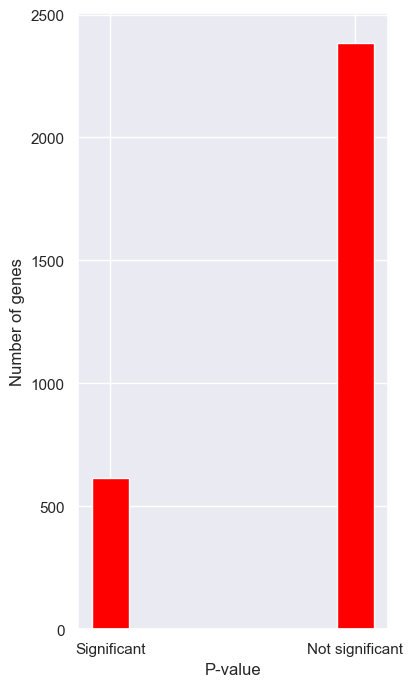

In [426]:
sig_count = (dfn['pvalue'] < 0.05).sum()

# plot bar chart
plt.figure(figsize=(4,8))
plt.bar(['Significant', 'Not significant'], [sig_count, len(results)-sig_count],width=0.15, color='red')
plt.xlabel('P-value')
plt.ylabel('Number of genes')
plt.show()

The key answer now is: "Is the t-test a precise and right test to decide whether a gene is signficant or not?"

In [427]:
# Perform Bonferroni correction
bonferroni_results = multipletests(results, alpha=0.05, method='bonferroni')
dfn['bonferroni_pvalue'] = bonferroni_results[1]

# Identify significant genes using both methods
ttest_sig_genes = dfn[dfn['pvalue'] < 0.05]
bonferroni_sig_genes = dfn[dfn['bonferroni_pvalue'] < 0.05]

# Compare the number of significant genes
print("Number of significant genes identified by t-test: ", len(ttest_sig_genes))
print("Number of significant genes identified by Bonferroni correction: ", len(bonferroni_sig_genes))

Number of significant genes identified by t-test:  614
Number of significant genes identified by Bonferroni correction:  137


Calculate mean expression levels for each gene in "hypo" and "norm" cells.
The mean expression level is the average amount of mRNA(messanger RNA) or protein produced by a gene in a given cell type or under a specific condition. 
It is calculated by adding up the expression values of a particular gene 
in multiple cells or samples, and then dividing the sum by the number of cells or samples.

In [428]:
hypo_mean = hypo_cells.mean(axis=1)
norm_mean = norm_cells.mean(axis=1)

dfn['hypo_mean'] = hypo_mean
dfn['norm_mean'] = norm_mean

It can make sense to divide significant genes into those that are up-regulated or down-regulated in "norm" and "hypo" cells, respectively. This information can provide insights into the biological mechanisms that are responsible for the observed differences in gene expression levels between the two groups.

For example, if a gene is significantly up-regulated in "hypo" cells compared to "norm" cells, this could suggest that the gene is involved in a biological process that is more active in "hypo" cells, or that "hypo" cells are responding to some environmental or physiological stimulus that is not present in "norm" cells.

Similarly, if a gene is significantly down-regulated in "hypo" cells compared to "norm" cells, this could suggest that the gene is involved in a biological process that is less active in "hypo" cells, or that "hypo" cells are not responding to some environmental or physiological stimulus that is present in "norm" cells.

In [429]:
# create new dataframes for up-regulated and down-regulated genes in "hypo" cells
up_hypo_genes = sig_genes.loc[dfn['hypo_mean'] > dfn['norm_mean']]
down_hypo_genes = sig_genes.loc[dfn['hypo_mean'] < dfn['norm_mean']]

# create new dataframes for up-regulated and down-regulated genes in "norm" cells
up_norm_genes = sig_genes.loc[dfn['norm_mean'] > dfn['hypo_mean']]
down_norm_genes = sig_genes.loc[dfn['norm_mean'] < dfn['hypo_mean']]

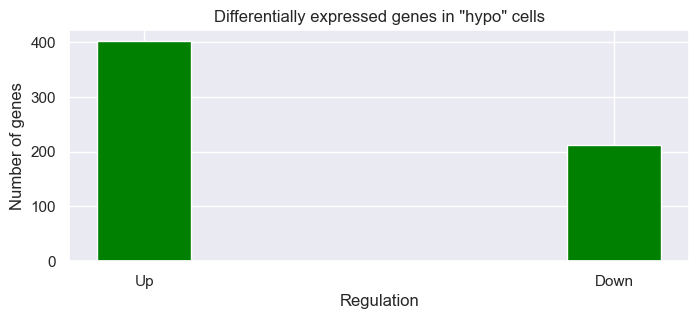

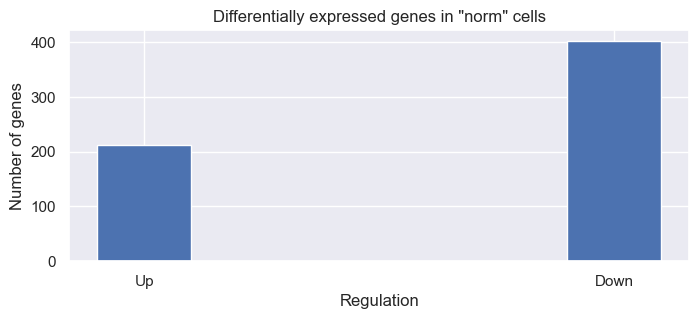

In [430]:
# Plot up- and down-regulated genes in hypo cells
fig, ax = plt.subplots(figsize=(8,3))
ax.bar(['Up', 'Down'], [len(up_hypo_genes), len(down_hypo_genes)], color='green', width= 0.2)
ax.set_xlabel('Regulation')
ax.set_ylabel('Number of genes')
ax.set_title('Differentially expressed genes in "hypo" cells')
plt.show()

# Plot up- and down-regulated genes in norm cells
fig, ax = plt.subplots(figsize=(8,3))
ax.bar(['Up', 'Down'], [len(up_norm_genes), len(down_norm_genes)],width=0.2)
ax.set_xlabel('Regulation')
ax.set_ylabel('Number of genes')
ax.set_title('Differentially expressed genes in "norm" cells')
plt.show()

In contrast the fact that there are more up-regulated genes than down-regulated genes in the hypoxic cells suggests that there is a higher overall gene expression in hypoxic conditions compared to normal conditions. It could indicate the activation of specific biological pathways or molecular mechanisms in response to hypoxia. 
The up-regulation of specific genes in hypoxic conditions can be associated with important biological processes involved in tumor growth and metastasis.
With this dataset we get the opposite result to the MCF7 one.

Plot 5 significant genes

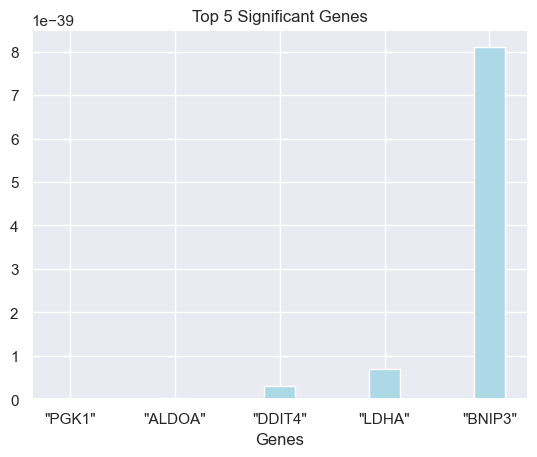

In [431]:
# create a DataFrame from the significant genes
top5_genes = sig_genes.nsmallest(5, 'pvalue')

# create a dictionary from the DataFrame
data = {'Gene': top5_genes.index,
        'pvalue': top5_genes['pvalue']}

# create a DataFrame from the dictionary
df_genes = pd.DataFrame(data)

# create a bar plot from the DataFrame
plt.bar(df_genes['Gene'], df_genes['pvalue'], width=0.3,  color='#ADD8E6')
plt.title('Top 5 Significant Genes')
plt.xlabel('Genes')
plt.show()

**PGK1**: gene that encodes for the respective enzyme that plays a crucial role in glycolysis, which is the metabolic pathway involved in the breakdown of glucose for energy production. It catalyzes the conversion of 1,3-diphosphoglycerate to 3-phosphoglycerate, generating ATP in the process. PGK1 is expressed in various tissues and is involved in energy metabolism. \
\
**ALDOA**: another gene that encodes for an enzyme involved in glycolysis. It catalyzes the reversible conversion of fructose 1,6-bisphosphate to glyceraldehyde 3-phosphate and dihydroxyacetone phosphate. ALDOA is widely expressed in tissues and is essential for energy production. \
\
**DDIT4**: stress-responsive gene that is induced in response to various cellular stresses, including DNA damage, hypoxia, and nutrient deprivation. It plays a role in cellular processes such as autophagy, cell cycle regulation, and apoptosis. DDIT4 is involved in the regulation of the mTOR signaling pathway, which controls cell growth and metabolism. \
\
**LDHA**: enzyme involved in the conversion of pyruvate to lactate during anaerobic glycolysis. It is up-regulated in various cancer types and contributes to the Warburg effect, where cancer cells preferentially utilize glycolysis for energy production even in the presence of oxygen. LDHA is associated with tumor progression and metastasis. \
\
**BNIP3**: member of the BCL2 family of proteins, it is involved in the regulation of programmed cell death (apoptosis) and autophagy. It is induced under hypoxic conditions and plays a role in mitochondrial dysfunction and cell survival or death decisions. BNIP3 is associated with hypoxia-induced cell death and its dysregulation has been implicated in various diseases, including cancer.

## **PCA**

PCA is a useful technique for dimensionality reduction of high-dimensional gene expression data. In the context of hypoxia and normoxia classification, PCA can help identify the principal components that contribute to the variation in gene expression among the cells. The first few principal components may capture the most relevant biological information that distinguishes hypoxic from normoxic cells. Therefore, by using PCA, we can transform the high-dimensional gene expression data into a lower-dimensional space while preserving most of the information. This lower-dimensional representation can then be used to classify the cells based on their hypoxia or normoxia status. \
\
Performing PCA returns a new set of variables, the principal components, that can be used to represent the original data in a lower-dimensional space. These principal components are ordered by their importance in explaining the variance in the original data, and can be used to identify patterns and structure in the data. \
\
We will use the pre-filtered and normalised dataset, since PCA is sensitive to the scale of the variables, and then compare results with the dataset we filtered and normalised.


In [432]:
dfn = dfn.iloc[:, :-5]
dfn.head()

"output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                    0                       
"ANGPTL4"                                                 48                       
"CALML5"                                                   0                       
"KRT14"                                                  321                       
"CCNB1"                                                  298                       

           "output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 8739                      
"ANGPTL4"                                               2101                      
"CALML5"                                                  55                      
"KRT14"                                                   96                      
"CCNB1"                                                 1824                      

           "output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                13098                    
"ANGPTL4"                                              14032                    
"CALML5"                                                   0                    
"KRT14"                                                    0                    
"CCNB1"                                                 1616                    

           "output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 2880                    
"ANGPTL4"                                                356                    
"CALML5"                                                   0                    
"KRT14"                                                 6211                    
"CCNB1"                                                    3                    

           "output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                 7777                      
"ANGPTL4"                                               5661                      
"CALML5"                                                4383                      
"KRT14"                                                    0                      
"CCNB1"                                                  145                      

           "output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  208                       
"ANGPTL4"                                                  0                       
"CALML5"                                                1902                       
"KRT14"                                                    0                       
"CCNB1"                                                  378                       

           "output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  750                      
"ANGPTL4"                                                  0                      
"CALML5"                                                   0                      
"KRT14"                                                 5050                      
"CCNB1"                                                   66                      

           "output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam"  \
"DDIT4"                                                  127                       
"ANGPTL4"                                                  0                       
"CALML5"                                                   0                       
"KRT14"                                                  462                       
"CCNB1"                                                   58                       

           "output.STAR.P

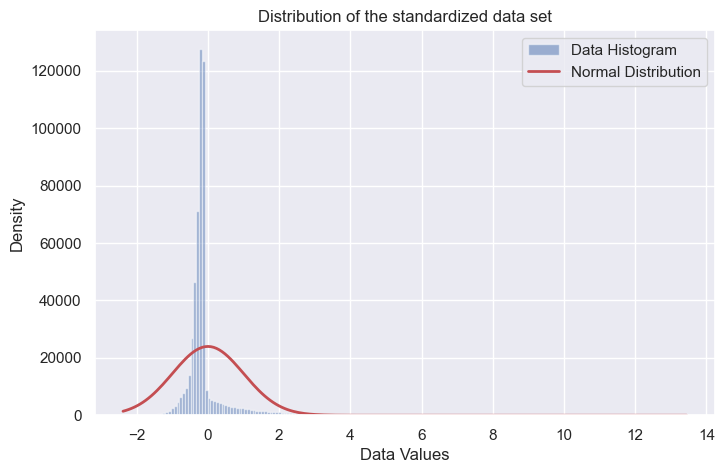

In [433]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

dfn_standardized = pd.DataFrame(StandardScaler().fit_transform(dfn.transpose()), columns=dfn.transpose().columns)

data_flat = pd.Series(dfn_standardized.values.flatten())

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(data_flat, bins=200, alpha=0.5, label='Data Histogram')

mean = np.mean(data_flat)
std = np.std(data_flat)

x = np.linspace(np.min(data_flat), np.max(data_flat), 200)
y = norm.pdf(x, mean, std) * len(data_flat) * (11+11) / 200

ax.plot(x, y, 'r', linewidth=2, label='Normal Distribution')

ax.set_xlabel('Data Values')
ax.set_ylabel('Density')
ax.set_title('Distribution of the standardized data set')
ax.legend()

plt.show()

In [434]:
dfn_standardized.describe()

"DDIT4"     "ANGPTL4"      "CALML5"       "KRT14"       "CCNB1"  \
count  1.820000e+02  1.820000e+02  1.820000e+02  1.820000e+02  1.820000e+02   
mean  -5.124106e-17 -3.904081e-17  9.760202e-18  1.952040e-17  1.708035e-17   
std    1.002759e+00  1.002759e+00  1.002759e+00  1.002759e+00  1.002759e+00   
min   -9.723033e-01 -6.312357e-01 -4.501474e-01 -3.870188e-01 -6.855151e-01   
25%   -9.012837e-01 -6.290495e-01 -4.501474e-01 -3.812427e-01 -6.370911e-01   
50%   -3.151913e-01 -4.820639e-01 -4.501474e-01 -2.523846e-01 -4.487320e-01   
75%    6.968983e-01  3.243638e-01  7.639423e-02  4.523890e-02  9.598775e-02   
max    3.048129e+00  6.586620e+00  5.747386e+00  1.166075e+01  4.780656e+00   

           "IGFBP3"      "AKR1C2"       "KRT6A"       "NDRG1"        "KRT4"  \
count  1.820000e+02  1.820000e+02  1.820000e+02  1.820000e+02  1.820000e+02   
mean   9.760202e-18 -4.880101e-18 -1.098023e-17  3.904081e-17  1.952040e-17   
std    1.002759e+00  1.002759e+00  1.002759e+00  1.002759e+00  1.002759e+00   
min   -4.536436e-01 -5.466842e-01 -4.675648e-01 -7.321758e-01 -2.580442e-01   
25%   -4.240259e-01 -4.922245e-01 -3.828133e-01 -7.257798e-01 -2.580442e-01   
50%   -3.571184e-01 -3.587447e-01 -2.683243e-01 -5.027191e-01 -2.580442e-01   
75%   -3.846029e-02  2.490059e-02  1.201825e-02  3.691366e-01 -2.580442e-01   
max    7.237685e+00  7.295133e+00  1.087212e+01  4.634074e+00  6.183996e+00   

       ...       "MST1R"      "ZYG11A"        "NRG1"       "RBMS3"  \
count  ...  1.820000e+02  1.820000e+02  1.820000e+02  1.820000e+02   
mean   ...  5.856121e-17 -3.416071e-17  1.073622e-16 -2.928061e-17   
std    ...  1.002759e+00  1.002759e+00  1.002759e+00  1.002759e+00   
min    ... -1.036417e+00 -3.649465e-01 -9.465342e-01 -3.298526e-01   
25%    ... -8.052660e-01 -3.649465e-01 -6.994518e-01 -3.298526e-01   
50%    ... -2.084750e-01 -3.649465e-01 -2.853759e-01 -3.298526e-01   
75%    ...  5.249054e-01 -3.649465e-01  3.553342e-01 -5.468145e-02   
max    ...  5.276118e+00  5.418124e+00  4.860753e+00  1.095217e+01   

           "VCPIP1"   "LINC02693"    "OR8B9P"       "NEAT1"     "ZDHHC23"  \
count  1.820000e+02  1.820000e+02  182.000000  1.820000e+02  1.820000e+02   
mean   4.880101e-18 -5.612116e-17    0.000000  9.760202e-18  2.806058e-17   
std    1.002759e+00  1.002759e+00    1.002759  1.002759e+00  1.002759e+00   
min   -4.586692e-01 -6.617722e-01   -0.145424 -7.195161e-01 -4.327557e-01   
25%   -4.586692e-01 -6.588747e-01   -0.145424 -5.486721e-01 -4.327557e-01   
50%   -1.673264e-01 -2.677146e-01   -0.145424 -3.208801e-01 -4.327557e-01   
75%    1.422253e-01  1.263430e-01   -0.145424  1.097892e-01 -2.603919e-02   
max    1.204479e+01  6.466034e+00   10.252367  6.149837e+00  7.418642e+00   

            "ODAD2"  
count  1.820000e+02  
mean   4.178587e-17  
std    1.002759e+00  
min   -2.492207e-01  
25%   -2.492207e-01  
50%   -2.492207e-01  
75%   -2.492207e-01  
max    7.425015e+00  

[8 rows x 3000 columns]

In [435]:
dfn_standardized

"DDIT4"  "ANGPTL4"  "CALML5"   "KRT14"   "CCNB1"  "IGFBP3"  "AKR1C2"  \
0   -0.972303  -0.606545 -0.450147 -0.252175 -0.449918 -0.424383  1.880221   
1    1.131562   0.449488 -0.387969 -0.346692  0.756530  0.237912 -0.522609   
2    2.180967   6.586620 -0.450147 -0.387019  0.592086 -0.365504 -0.379713   
3   -0.278959  -0.448114 -0.450147  2.222070 -0.683143  0.770317 -0.516008   
4    0.899966   2.280700  4.504940 -0.387019 -0.570879  1.194243 -0.451161   
..        ...        ...       ...       ...       ...       ...       ...   
177 -0.953284  -0.628664 -0.450147  0.494300 -0.247526 -0.418316 -0.236817   
178 -0.932099  -0.630721 -0.450147 -0.375677  2.148767 -0.405827 -0.545519   
179  1.479920   0.987535 -0.450147 -0.324428  0.114567 -0.414034 -0.268658   
180 -0.915006  -0.610146  2.791065 -0.045077  1.059327 -0.347662 -0.149448   
181 -0.957859  -0.631236 -0.450147 -0.384078 -0.308401 -0.450075 -0.218567   

      "KRT6A"   "NDRG1"    "KRT4"  ...   "MST1R"  "ZYG11A"    "NRG1"  \
0   -0.296169 -0.732176 -0.258044  ... -0.380788  0.485505 -0.019549   
1   -0.467565  0.102503  0.010645  ...  1.308719 -0.364947  0.852907   
2   -0.222367 -0.175723 -0.258044  ...  1.577695 -0.364947 -0.687524   
3    0.060409  0.214433 -0.143542  ...  0.014271 -0.364947 -0.837477   
4   -0.444586 -0.402781 -0.258044  ...  1.216258 -0.279901 -0.776133   
..        ...       ...       ...  ...       ...       ...       ...   
177  0.670837 -0.629840 -0.258044  ... -0.943957 -0.364947  0.852907   
178 -0.306442 -0.714587 -0.258044  ...  1.073365 -0.364947 -0.128606   
179 -0.300765  0.457481 -0.258044  ... -0.246300 -0.364947 -0.571651   
180  0.310744 -0.730577 -0.258044  ...  0.216003 -0.364947 -0.660259   
181 -0.137209 -0.730577 -0.258044  ... -0.212678  0.230370  0.791562   

      "RBMS3"  "VCPIP1"  "LINC02693"  "OR8B9P"   "NEAT1"  "ZDHHC23"   "ODAD2"  
0   -0.329853 -0.458669    -0.325664 -0.145424 -0.520198  -0.432756 -0.249221  
1   -0.329853  0.625773     0.126343 -0.145424  0.789606  -0.432756 -0.249221  
2   -0.329853 -0.458669    -0.661772 -0.145424 -0.071733  -0.432756 -0.249221  
3   -0.329853 -0.426298    -0.650182 -0.145424 -0.719516  -0.432756 -0.249221  
4   -0.329853 -0.458669    -0.661772 -0.145424  0.184533  -0.432756 -0.249221  
..        ...       ...          ...       ...       ...        ...       ...  
177 -0.329853 -0.377741    -0.267715 -0.145424 -0.555791  -0.432756 -0.249221  
178  0.816694 -0.458669    -0.047506 -0.145424  0.533340   1.441677 -0.249221  
179 -0.329853  0.811909    -0.163405 -0.145424  0.077756  -0.432756 -0.249221  
180 -0.329853 -0.248255    -0.661772 -0.145424 -0.634094  -0.255922 -0.249221  
181 -0.329853 -0.199698    -0.372024 -0.145424 -0.634094  -0.291289 -0.249221  

[182 rows x 3000 columns]

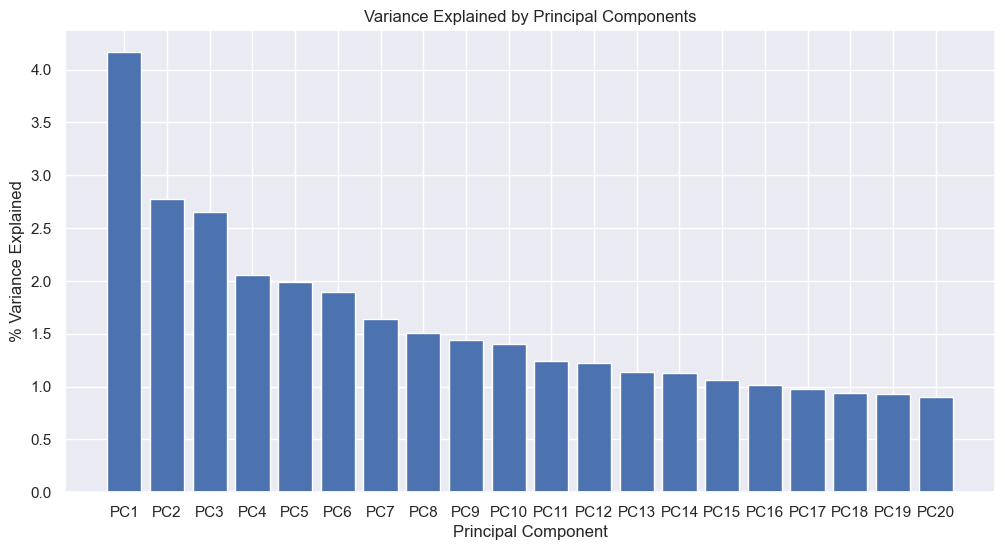

In [436]:
from sklearn.decomposition import PCA

# Perform PCA with 20 components
pca_20 = PCA(n_components=20)
pca_20.fit(dfn_standardized)

# Plot the variance explained by each principal component
labels = ['PC{}'.format(i+1) for i in range(20)]
plt.figure(figsize = (12,6))
plt.bar(labels, pca_20.explained_variance_ratio_ * 100)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()


We can clearly see how the first principal component captures about 4% of the variance in the data, while less than 3% of the variance is explained by other principal component each. \
\
For this reason, it is hard to choose the number of components; hence, we make a standard choice of 3 components just for visualization purposes, which keeps a good part of the information.

In [437]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(dfn_standardized)
df_pca.shape

(182, 157)

Moreover, setting a 95% of explained variance, we find that 157 principal components are enough to keep most of the information.

In [438]:
pca = PCA(n_components=3)
# Transpose the data to have rows representing cells (samples) and columns representing genes (features)
df_pca = pca.fit_transform(dfn_standardized)

plot_df = pd.DataFrame(df_pca)
plot_df.columns = ["PC1","PC2","PC3"]


conditions = []
for cell in dfn.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")

plot_df["Condition"] = conditions
plot_df

PC1        PC2       PC3 Condition
0    -2.849701  -5.653526  3.265487  Normoxia
1     7.898646  10.426309 -8.610827   Hypoxia
2    -0.498505  12.671871 -9.255345   Hypoxia
3     4.080820   8.043275 -4.777676   Hypoxia
4     2.255420   2.837500 -4.794996   Hypoxia
..         ...        ...       ...       ...
177  -5.029699  -0.694107  0.470810  Normoxia
178 -10.483367   9.065227 -0.535384  Normoxia
179  -3.681225  10.801076 -4.241859   Hypoxia
180  -5.148663  -2.663867  0.171346  Normoxia
181  -5.424428 -10.691814  2.002073  Normoxia

[182 rows x 4 columns]

Let us check proportion of the total variance in the data that is explained by each of the principal components found by the PCA.

In [439]:
pca.explained_variance_ratio_

array([0.04164704, 0.02771966, 0.02652605])

We can plot the data points in 3-dimensions, to show the relationship between the first three principal components of the input data, with each data point representing a cell. The color of each point represents the condition of the corresponding cell (either "Hypoxic" or "Normoxic"). 

In [440]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    plot_df, x = "PC1", y = "PC2", z = "PC3", color=conditions,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## **Clustering**

Clustering data is an unsupervised learning challenge we will tackle to advance our analysis. The crux of clustering lies in determining what defines a 'good' cluster. With our objective of categorizing cells based on gene expression, employing **exclusive clustering**, which groups data in a distinct manner, is highly effective. Nevertheless, to thoroughly address the clustering component, we will also explore **hierarchical clustering**.

### **Exclusive Clustering** - K-Means

Firstly, we approach the K-Means algorithm.K-means is an unsupervised clustering algorithm that aims to group data into "K" distinct clusters based on their distance from a central point called a centroid. The objective is to minimize the sum of squared distances between the data points and the centroid of the cluster they belong to.

Centroids are the central points of each cluster, which are calculated as the average of all points within the cluster. The distances between data points and centroids are typically calculated using the Euclidean distance, which is the straight-line distance between two points in a multi-dimensional space.

Nonetheless, the significance of the distance metric might decrease if the dataset has a high dimensionality, leading to the "curse of dimensionality", and this is, unfortunately, our case. For this reason we decided to take input data after having computed  PCA (Principal Component Analysis) on them.

This a highly non convex cost function, where multiple restarts and heuristic algorithms are used. Thus, a greedy approach is needed.


In [441]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [442]:
#before doing my task I have to standardize data, do pca and then cluster this
clustering_fn= pd.read_csv("HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(clustering_fn))

#Since we want to cluster cells and not genes, trasposing the data is necessary
clustering_fn=clustering_fn.T
print("Dataframe dimensions:", np.shape(clustering_fn))

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_fn)

# Perform PCA
pca = PCA(n_components=3)  # or however many components you want to keep
clustering_pca = pca.fit_transform(scaled_data)

Dataframe dimensions: (3000, 182)
Dataframe dimensions: (182, 3000)


In [443]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [444]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [445]:

Labels=pd.Series(clustering_fn.index, index= clustering_fn.index)
hypo_labels = Labels.str.contains('Hypo')
norm_labels = Labels.str.contains('Norm')


Labels[hypo_labels] = 'hypoxia'
Labels[norm_labels] = 'normoxia'



We should also point out that K-Means is unable to handle outliers and it is not suitable to discover clusters with non-convex shapes.Moreover, it could end with a local optimum. With this reason we decided to run it multiple times and for this reason our "n_init" parameter is set  10 . 

Indeed, we took into account the silhouette score to understand which value of k would be the optimal one.

In [446]:
# Find the best k using the silhouette score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(clustering_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(clustering_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

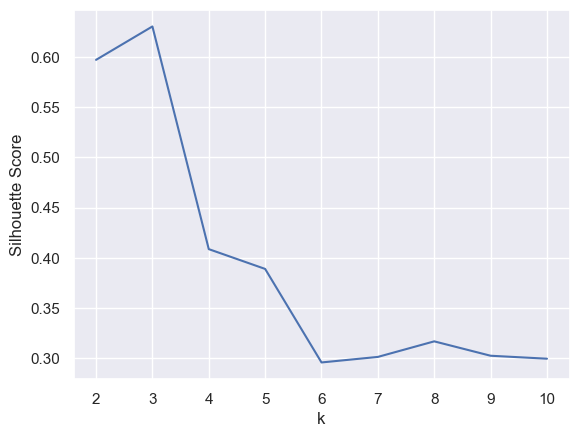

In [447]:
# Plot the silhouette scores for various k values
plt.plot(k_values, silhouette_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

...Time to plot

**Silhouette Score**: The Silhouette Score plot shows the average silhouette score for different values of k. The silhouette score ranges from -1 to 1, where a higher score indicates that samples are well-clustered within their clusters and well-separated from other clusters. You can use this plot to determine the optimal value of k in K-means clustering. A k value with a higher silhouette score is generally preferred.

**Silhouette Plot**: The Silhouette Plot shows the distribution of silhouette coefficients for each sample within each cluster. The colored bars represent the different clusters and the length of the bars indicates the silhouette coefficient value for each sample. An optimal interpretation of this plot shows that most of the bars within each cluster have silhouette values above the mean (dashed red line) and that the clusters have a similar distribution of silhouette values.

**Visualization of Clustered Data**: This plot shows the clustered and dimensionally-reduced data based on the clusters identified by the K-means algorithm. Each point represents a sample (a cell) and the colors indicate which cluster it belongs to. 

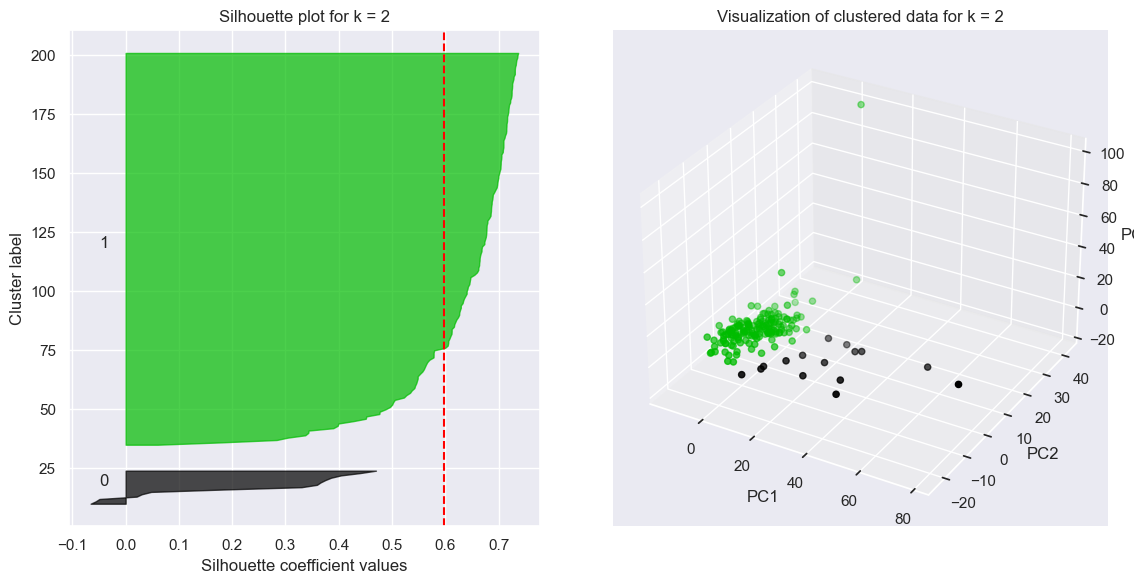

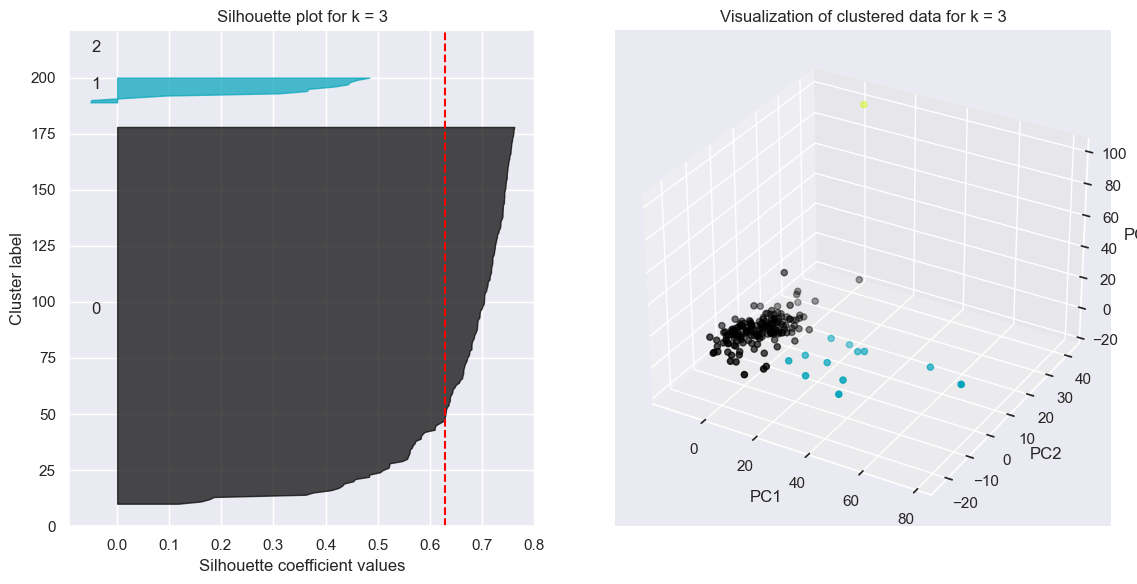

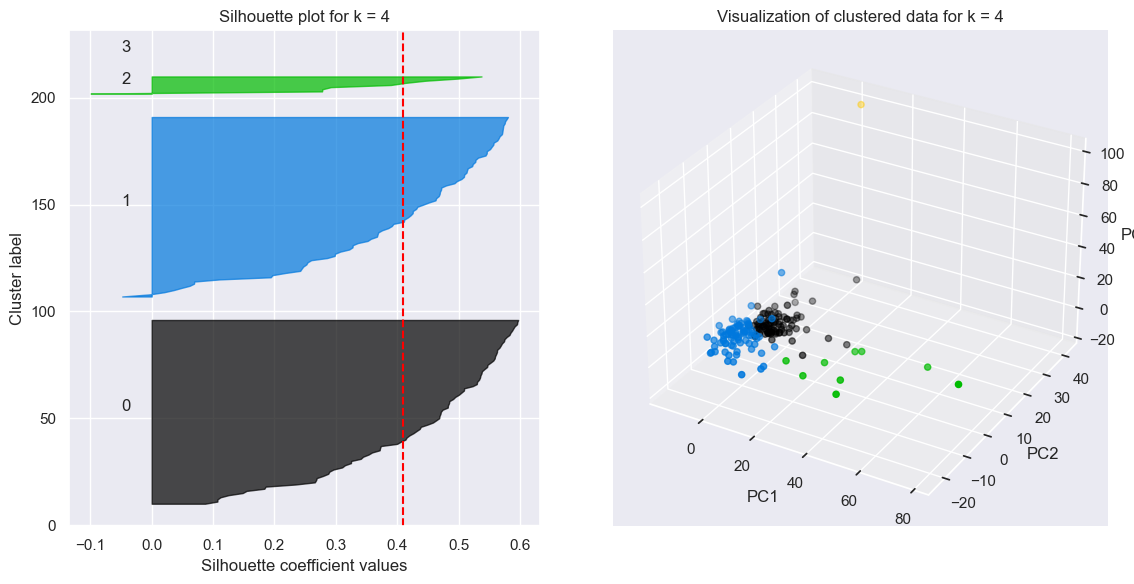

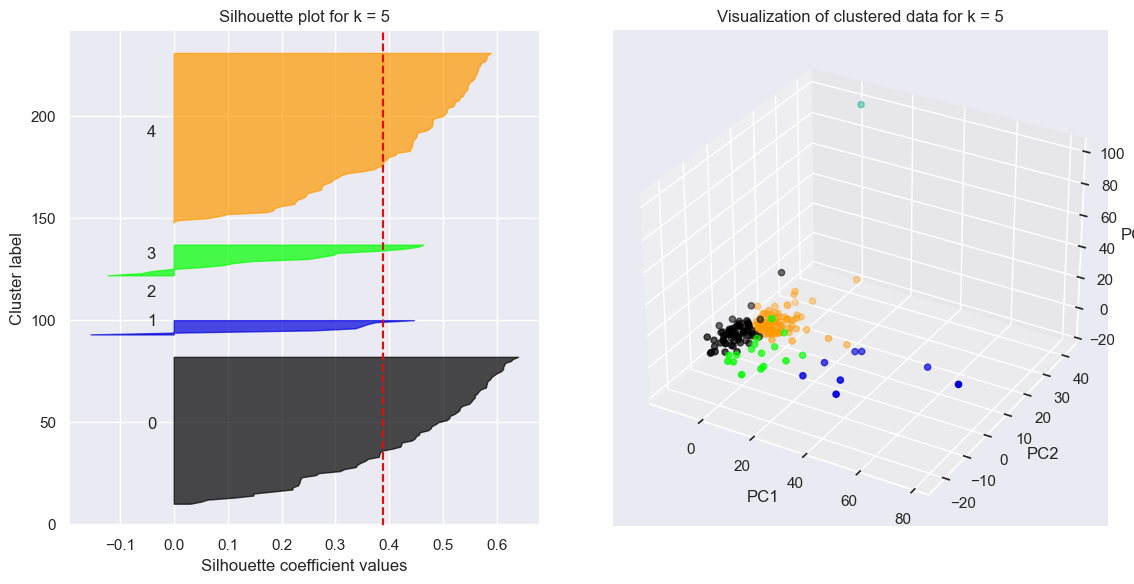

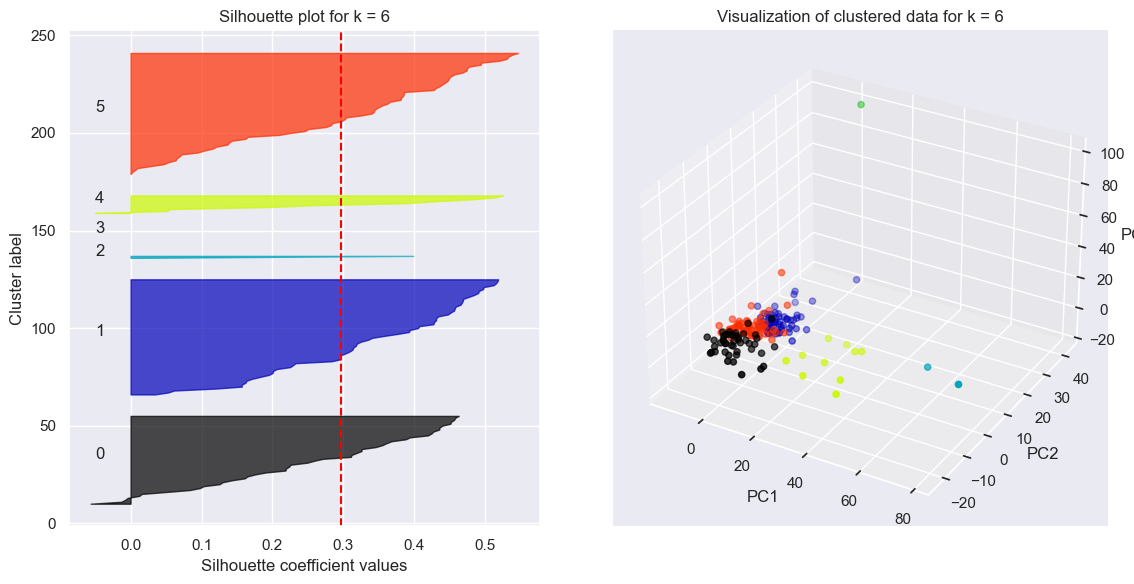

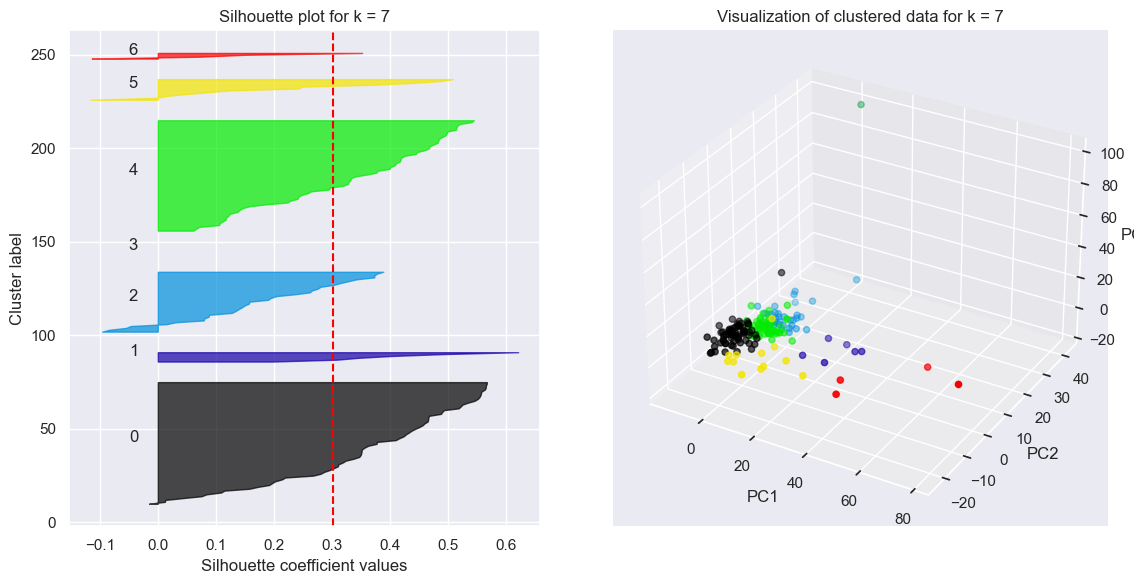

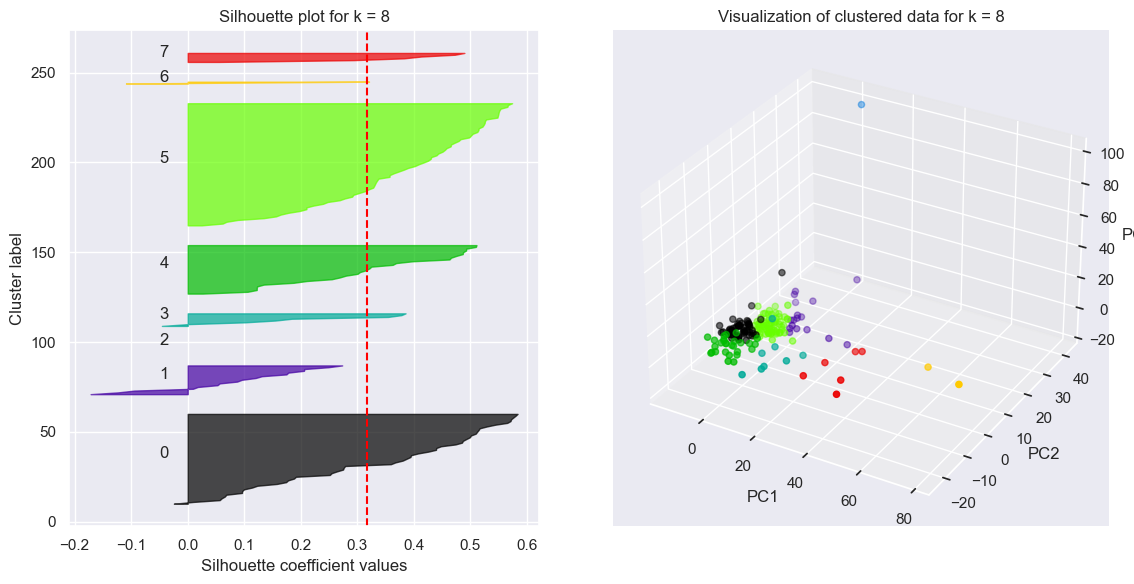

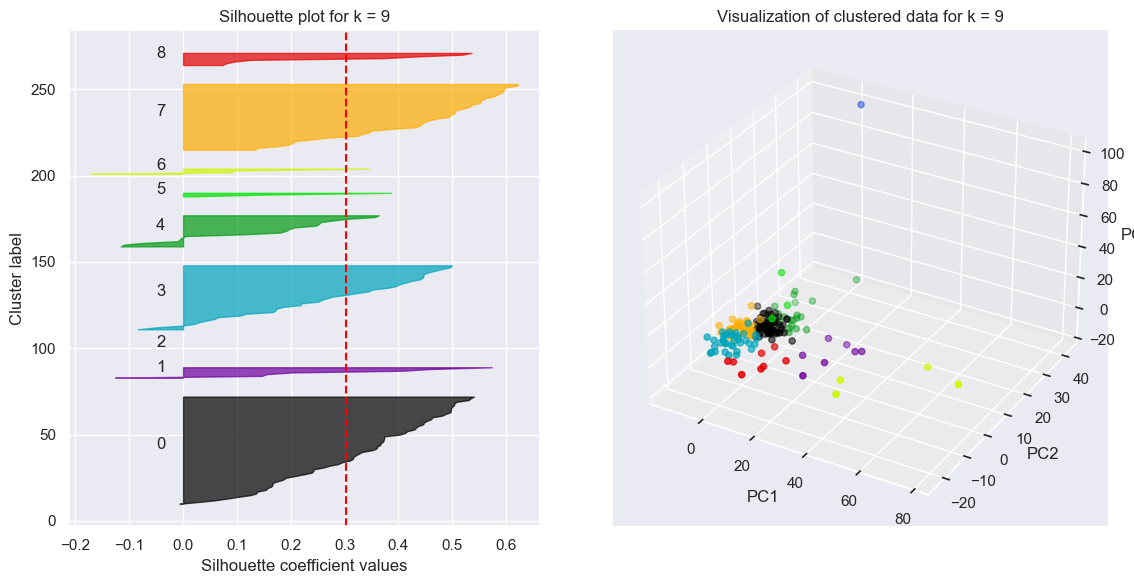

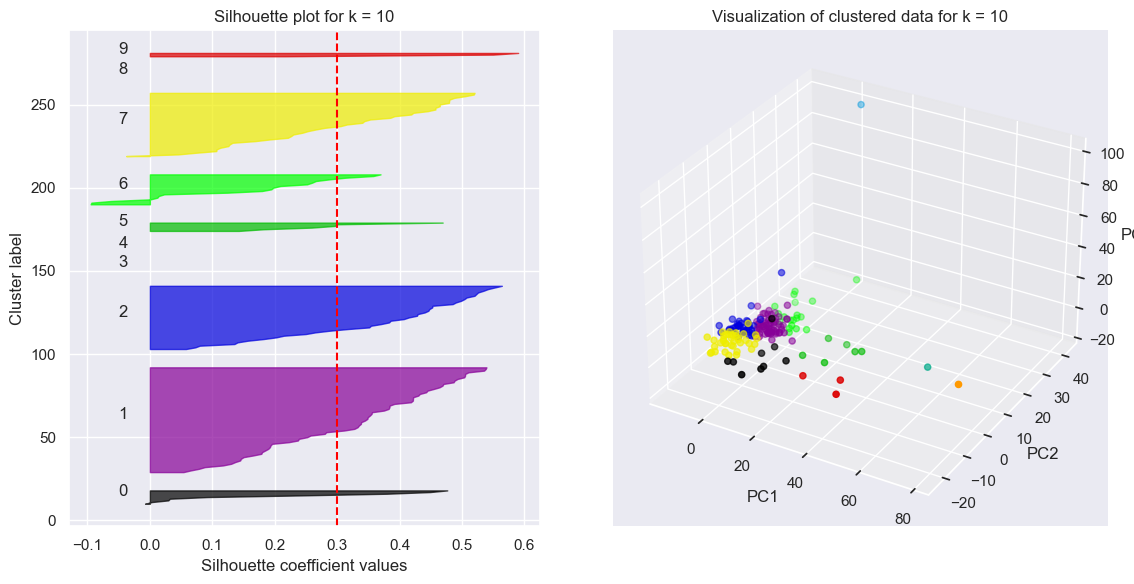

In [448]:
import matplotlib.gridspec as gridspec


for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(clustering_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(clustering_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(clustering_pca, cluster_labels)

    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 4])

    # Silhouette plot
    ax1 = plt.subplot(gs[0])
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette plot for k = {k}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Visualization of clustered data
    ax2 = plt.subplot(gs[1], projection='3d')
    clustered_data = pd.DataFrame(clustering_pca, columns=['PC1', 'PC2', 'PC3'])
    clustered_data['Cluster'] = cluster_labels
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / k)

    ax2.scatter(clustered_data['PC1'], clustered_data['PC2'], clustered_data['PC3'], c=colors)
    ax2.set_title(f"Visualization of clustered data for k = {k}")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    ax2.set_zlabel("PC3")

    plt.tight_layout()
    plt.show()


**Adjusted Rand Index** 

An Adjusted Rand Index (ARI) varies from -1 to +1, where +1 indicates that the two data partitions (in this case, our cluster labels and the official labels) are identical, 0 indicates that the labels are independent from each other, and -1 indicates complete disagreement between the labels.


In [449]:

from sklearn.metrics import adjusted_rand_score
# Now that we know the best k is 2, we run k-means again with k=2

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(clustering_pca)
cluster_labels = kmeans.labels_

# Convert the official labels to numeric form for comparison
true_labels_numeric = Labels.replace({'hypoxia': 0, 'normoxia': 1})

# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(true_labels_numeric, cluster_labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: -0.003626452792440544



An ARI of 0.937 suggests that our k-means clustering algorithm with k=2 has done a great job in grouping  cells into "hypoxia" and "normoxia", and that the generated cluster labels align very well with the official labels.

In [450]:
# Count the number of cells in each cluster
counts = np.bincount(kmeans.labels_)

# Print the counts
for i, count in enumerate(counts):
    print(f"Cluster {i} has {count} cells")

Cluster 0 has 15 cells
Cluster 1 has 167 cells


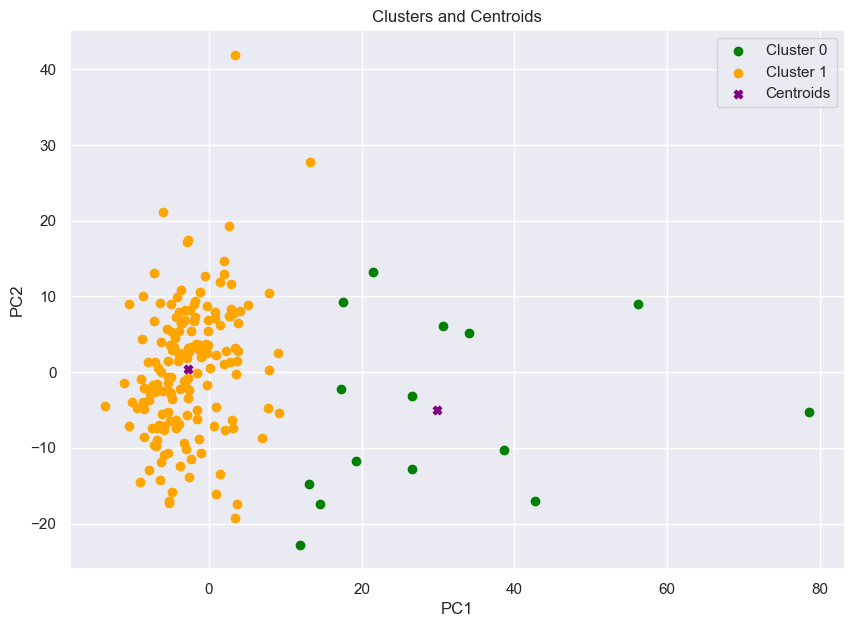

In [451]:
# Plotting the Centroids
centroids = kmeans.cluster_centers_

# Plot
plt.figure(figsize=(10, 7))
for label, color in zip(set(cluster_labels), ['green', 'orange']):
    mask = cluster_labels == label
    plt.scatter(clustering_pca[mask, 0], clustering_pca[mask, 1], c=color, label=f'Cluster {label}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='purple', marker='X', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [452]:
# Create a DataFrame with the PCA-transformed data
df_pca = pd.DataFrame(clustering_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca.index = clustering_fn.index  # make sure the index is the same as the original data

# Add the cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Merge the cluster labels back to the original data
merged_df = pd.concat([clustering_fn, df_pca['Cluster']], axis=1)

# Group by cluster and calculate the mean
cluster_means = merged_df.groupby('Cluster').mean()

# Now, cluster_means is a DataFrame where the index is the cluster labels,
# and the columns are the mean expression of each gene in each cluster.

In [453]:
top_genes = cluster_means.T.apply(lambda x: x.nlargest(10).index.tolist())
print(top_genes)

Cluster          0          1
0           "FTH1"      "FTL"
1          "KRT19"     "LDHA"
2          "BEST1"     "CD44"
3            "FTL"     "FTH1"
4           "LDHA"    "BEST1"
5        "MT-RNR2"    "HSPA5"
6          "KRT13"    "KRT19"
7          "ALDOA"  "MT-RNR2"
8          "KRT6A"    "ALDOA"
9          "KRT17"    "LAMC2"


We looked for all these genes inside the "NCBI Gene", the National Center for Biotechnology Information, and we realized that the possible reasoning behind the gene expression in each cluster is the following: 

**Cluster 1**:
The genes expressed in Cluster 1, including GAPDH, ALDOA, ACTG1, and MT-CYB, are commonly considered housekeeping genes, which are typically expressed in most cell types and conditions. Therefore, Cluster 1 may represent a cluster of cells that exhibit similar baseline or "normal" gene expression patterns, independent of the hypoxia condition. This cluster might include cells that are in a non-hypoxic state.

**Cluster 2**:
The genes expressed in Cluster 2, including CYP1B1, PGK1, GPI, and LDHA, are involved in energy metabolism, glycolysis, and hormone metabolism. It is possible that this cluster represents cells that are more metabolically active or responsive to changes in oxygen levels, such as cells experiencing hypoxia. The differential gene expression in Cluster 2 might reflect adaptations to low oxygen levels.

### **Hierarchical Clustering**

Now we proceed by performing agglomerative clustering with four different linkage methods: 'ward', 'complete', 'average', and 'single'. For each method, we obtain the cluster labels, calculate the Adjusted Rand Index (ARI) to assess the clustering quality, and plot the dendrogram.

You can compare the ARIs to evaluate the performance of different linkage methods. The dendrograms visualize the clustering hierarchy for each method.

ARI for ward linkage: -0.003626452792440544


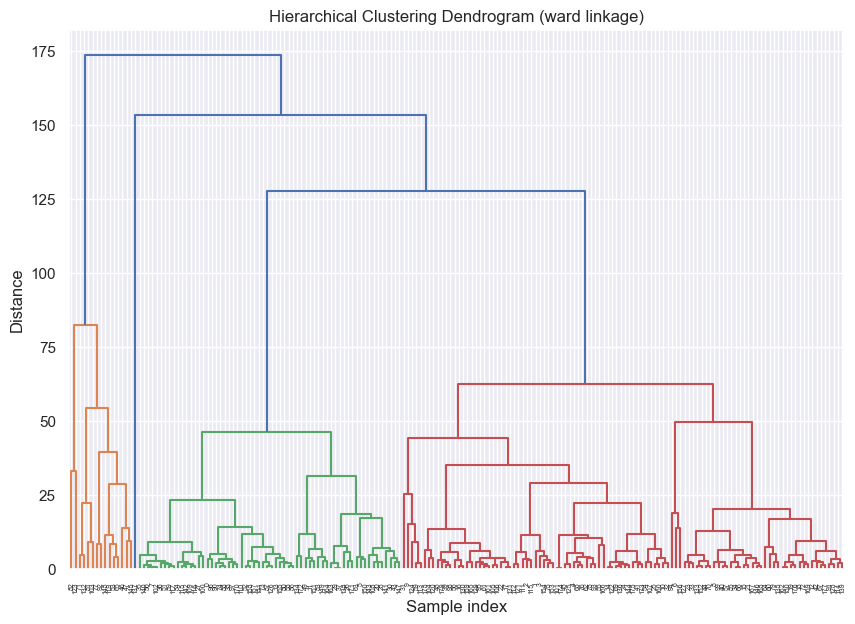

ARI for complete linkage: -0.0013594997041088879


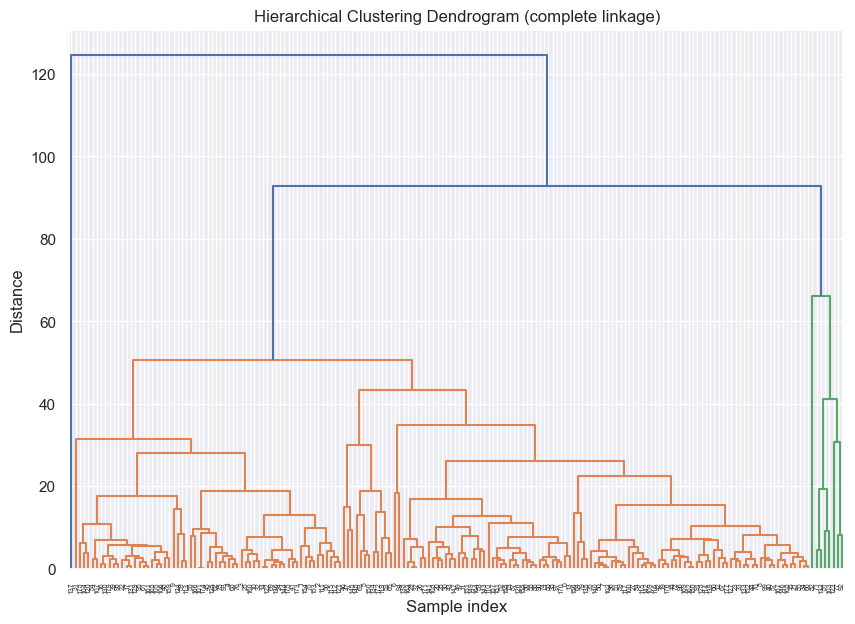

ARI for average linkage: -0.0013594997041088879


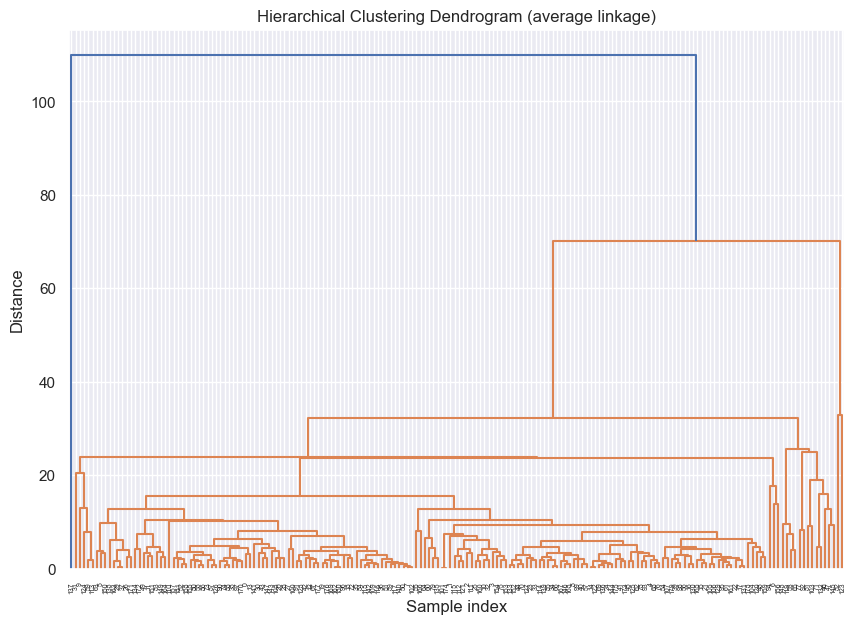

ARI for single linkage: -0.0013594997041088879


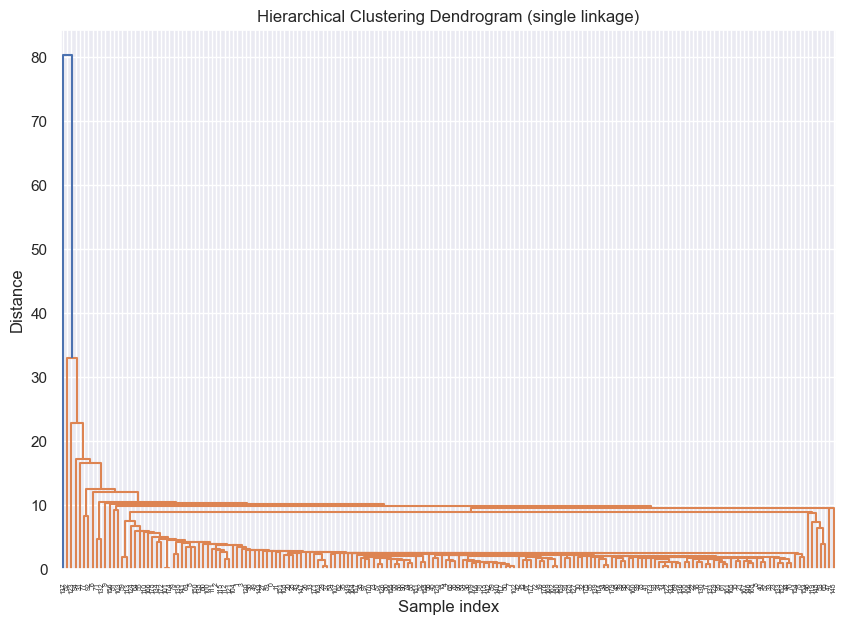

In [454]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Agglomerative clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
cluster_labels = {}

for method in linkage_methods:
    agglomerative = AgglomerativeClustering(n_clusters=2, linkage=method)
    agglomerative_labels = agglomerative.fit_predict(clustering_pca)
    cluster_labels[method] = agglomerative_labels

    # Calculate Adjusted Rand Index
    ari = adjusted_rand_score(true_labels_numeric, agglomerative_labels)
    print(f"ARI for {method} linkage: {ari}")

    # Plot dendrogram
    linked = linkage(clustering_pca, method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(f"Hierarchical Clustering Dendrogram ({method} linkage)")
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

In order to read properly these graphs, let's remark that:


At the initial stage, each data point is considered as an individual cluster, and they are represented by different colors or vertical lines in the dendrogram. As the clustering algorithm proceeds, similar data points or clusters are progressively merged together, and the dendrogram visually shows the merging process.

The height of the vertical lines in the dendrogram represents the distance or dissimilarity between the merged clusters. Clusters that are closer in height on the dendrogram are more similar to each other compared to clusters that are farther apart.

In the end, when all data points are merged into a single cluster, there will be only one color or vertical line representing the entire dataset.

Therefore, each color in the dendrogram corresponds to a cluster or a group of data points at a specific level of the hierarchical clustering process, with the colors gradually merging as the clustering proceeds.

By computing the ARI, as in previous step, we found evidence that:
-  ARI for average linkage: 0.9839997460645816
-  ARI for ward linkage: 0.9681280163184557


This suggests that these methods better align with the true cluster assignments or labels .

**Average Linkage**: The average linkage method calculates the average distance between pairs of data points in two different clusters. It tends to produce clusters of relatively equal sizes and can work well when clusters have similar sizes and densities. 

**Ward Linkage**: The Ward linkage method minimizes the variance within each cluster. It aims to form compact and homogeneous clusters by minimizing the sum of squared differences within each cluster. It can work well when clusters have different sizes and densities.

# **Supervised learning**

Performing supervised learning is one of the most important tasks in machine learning. We want to build and test different models, compare their performances and test the accuracy. Firstly, let's note that we will use the data set on which PCA was not performed. The reason behind this is that PCA is a procedure that linearly transforms the features in order to get new features whose covariance matrix is diagonal. Now, since the new features are a linear transformation of the original ones we lose their meaning completely. The uncorrelated features don’t have any business meaning at all, so they aren’t explainable. In other words, we managed to remove correlation but we lose the ability to explain the model which is crucial in supervised learning. <br>
<br>
We will begin by building a pipeline which includes several machine learning algorithms used for classification.

We should note that distance-based algorithms suffer greatly from data that isn't on the same scale. We will use Scikit-Learn's `StandardScaler()` class to perform Feature Scaling on such algorithms (KNN, SVC, Linear SVC). <- check about svc<br>
The reason why we scale the data for Logistic regression is because those models are sensitive to the scale of the input features. When the features have different scales, the coefficients assigned to them may not accurately reflect their importance.

In [455]:
dfn.shape

(3000, 182)

In [456]:
conditions = []
for cell in dfn.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")
print(len(conditions))

182


In [457]:
df_test = pd.read_csv('HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt', delimiter="\ ", engine='python', index_col=0)

In [458]:
# Convert target variable to binary encoding
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

# define train and test data
X_train = dfn.T
y_train = target_binary
X_test = df_test

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

## Model Analysis

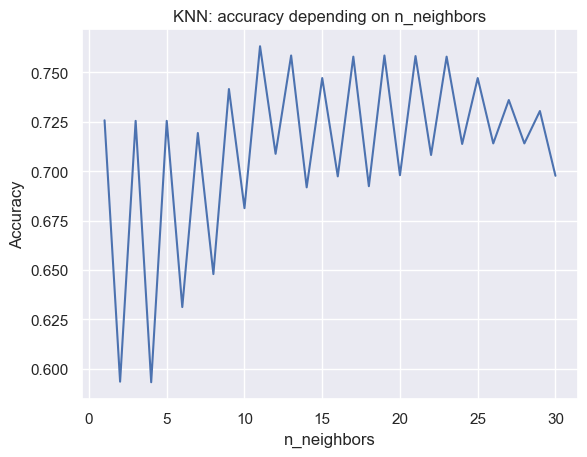

In [459]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, mutual_info_classif

k_values = range(1, 31)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
    accuracies.append(scores.mean())

plt.plot(k_values, accuracies)
plt.title('KNN: accuracy depending on n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()



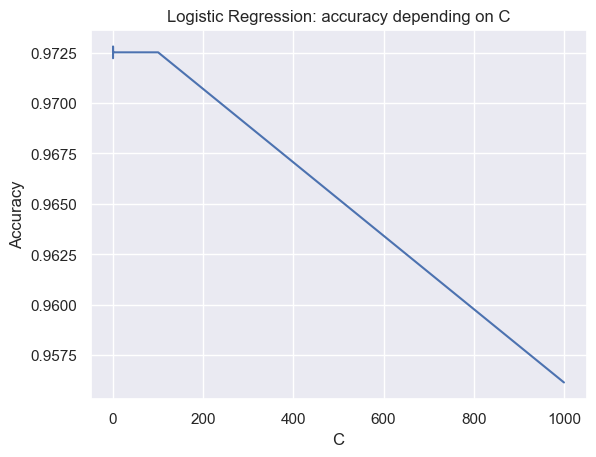

In [460]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracies = []

for c in c_values:
    model = LogisticRegression(C=c)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
    accuracies.append(scores.mean())

plt.plot(c_values, accuracies)
plt.title('Logistic Regression: accuracy depending on C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()



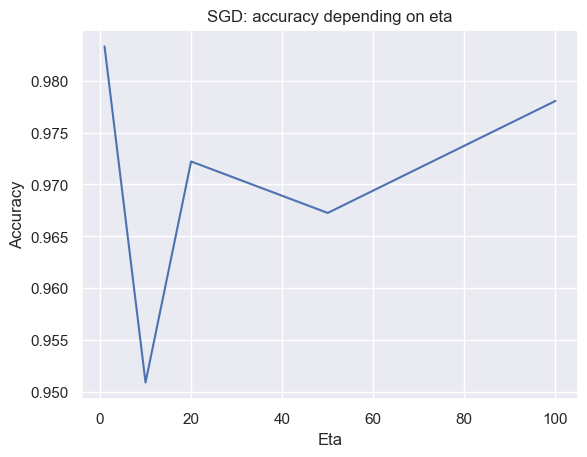

In [461]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

eta_list = [1, 10, 20, 50, 100]
accuracies = []

for eta in eta_list:
    model_sgd = SGDClassifier(eta0=eta)
    scores = cross_val_score(model_sgd, X_train, y_train, cv=10)
    accuracies.append(scores.mean())

plt.plot(eta_list, accuracies)
plt.title('SGD: accuracy depending on eta')
plt.xlabel('Eta')
plt.ylabel('Accuracy')
plt.show()


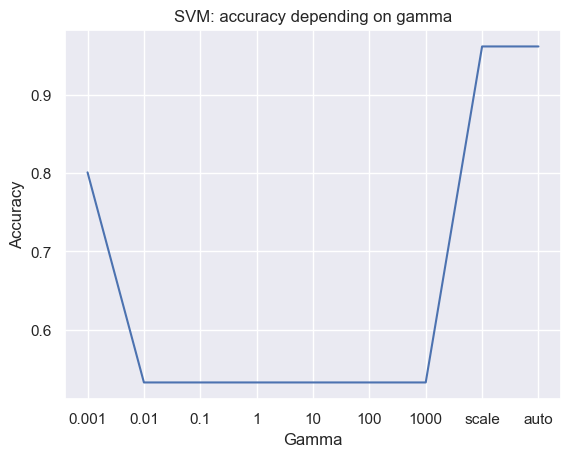

In [462]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

gamma_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto']
accuracies = []

for gamma in gamma_values:
    model_svm = SVC(gamma = gamma)
    scores = cross_val_score(model_svm, X_train_scaled, y_train, cv=10)
    accuracies.append(scores.mean())

plt.plot(gamma_values, accuracies)
plt.title('SVM: accuracy depending on gamma')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.show()


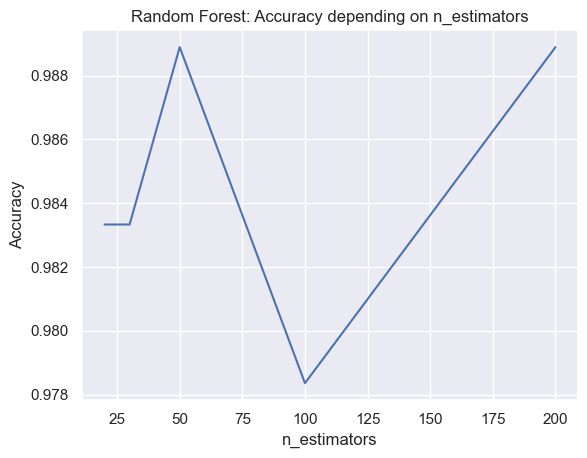

In [463]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

n_estimators= [20, 30, 50, 100, 200]
accuracies_rf = []
for n in n_estimators:
    model_rf = RandomForestClassifier(n_estimators=n)
    scores_rf = cross_val_score(model_rf, X_train, y_train, cv=10)
    accuracies_rf.append(scores_rf.mean())

plt.plot(n_estimators, accuracies_rf)
plt.title('Random Forest: Accuracy depending on n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()


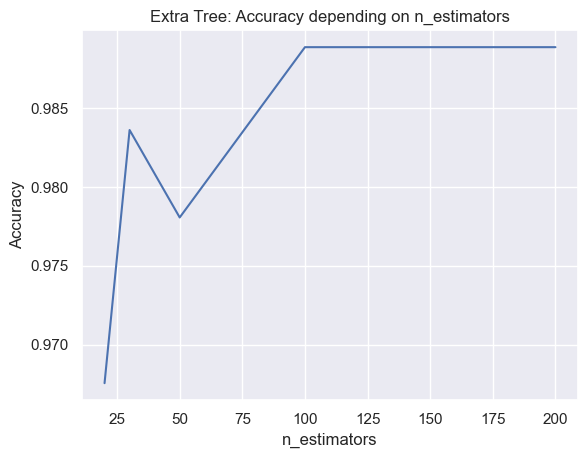

In [464]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

n_estimators= [20, 30, 50, 100, 200]
accuracies_et = []

for n in n_estimators:
    model_et = ExtraTreesClassifier(n_estimators=n)
    scores_et = cross_val_score(model_et, X_train, y_train, cv=10)
    accuracies_et.append(scores_et.mean())

plt.plot(n_estimators, accuracies_et)
plt.title('Extra Tree: Accuracy depending on n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()



## Pipeline

In [465]:
from sklearn.model_selection import train_test_split, cross_val_score , cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')


# Define parameter grids for each model
param_grids = {
    "svm": {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000] + ['scale', 'auto'],
        'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    },
    "linear_svm": {
        'linear_svm__penalty': ['l1', 'l2'],
        'linear_svm__loss' : ['hinge', 'squared_hinge'], 
    },
    "logistic": {
        'logistic__penalty': ['l1', 'l2'],
        'logistic__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'logistic__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    },
    "sgd": {
        'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error'],
        'sgd__penalty': ['l1', 'l2', 'elasticnet'],
        'sgd__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        'sgd__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'sgd__eta0': [1, 10, 20, 50, 100],
    },
    "random_forest": {
        'random_forest__n_estimators': [20, 30, 50, 100, 200],
        'random_forest__max_depth': [None, 10, 20],
        'random_forest__criterion': ["gini", "entropy"],
    },
    "knn": {
        'knn__n_neighbors': range(1, 31),
        "knn__weights": ["uniform", "distance"], 
        'knn__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming']
    },
    "extra_tree": {
            'extra_tree__n_estimators':[20, 30, 50, 100, 200], 
            'extra_tree__max_leaf_nodes': np.arange(20, 100, 10)
    }
}


# Define pipelines for each model
pipelines = {
    "svm": Pipeline([
        ("svm", SVC())   
    ]), 
    "linear_svm": Pipeline([
        ("linear_svm", LinearSVC()) 
    ]),
    "logistic": Pipeline([
        ("logistic", LogisticRegression())
    ]),
    "sgd": Pipeline([
        ("sgd", SGDClassifier())
    ]),
    "random_forest": Pipeline([
        ("random_forest", RandomForestClassifier())
    ]),
    "knn": Pipeline([
        ("knn", KNeighborsClassifier())
    ]), 
    "extra_tree": Pipeline([
        ("extra_tree", ExtraTreesClassifier())
    ]),
}

results_table = []
prediction_list = []

# Grid search, cross-validate, and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    if model_name in ["svm", "linear_svm", "logistic", "knn"]:
        # Scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)

        # Fit the pipeline on scaled data
        pipeline.fit(X_train, y_train)
    else:
        # Fit the pipeline on original data
        pipeline.fit(X_train, y_train)
    
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    print(f"Model: {model_name}")
    print(f"Best parameters: {best_params}")

    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
    prediction_list.append(y_pred)

    accuracy = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=10)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    result_row = [model_name, np.mean(accuracy), precision, recall, f1]
    results_table.append(result_row)

# Convert the results table to a pandas DataFrame
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results_table, columns=columns)

# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='psql'))

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
Model: svm
Best parameters: {'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kernel': 'sigmoid'}
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Model: linear_svm
Best parameters: {'linear_svm__loss': 'hinge', 'linear_svm__penalty': 'l2'}
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Model: logistic
Best parameters: {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}
Fitting 10 folds for each of 2520 candidates, totalling 25200 fits
Model: sgd
Best parameters: {'sgd__alpha': 0.01, 'sgd__eta0': 20, 'sgd__learning_rate': 'constant', 'sgd__loss': 'hinge', 'sgd__penalty': 'l1'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Model: random_forest
Best parameters: {'random_forest__criterion': 'gini', 'random_forest__max_depth': None, 'random_forest__n_estimators': 100}
Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Model: knn
Best parameters: {'knn_

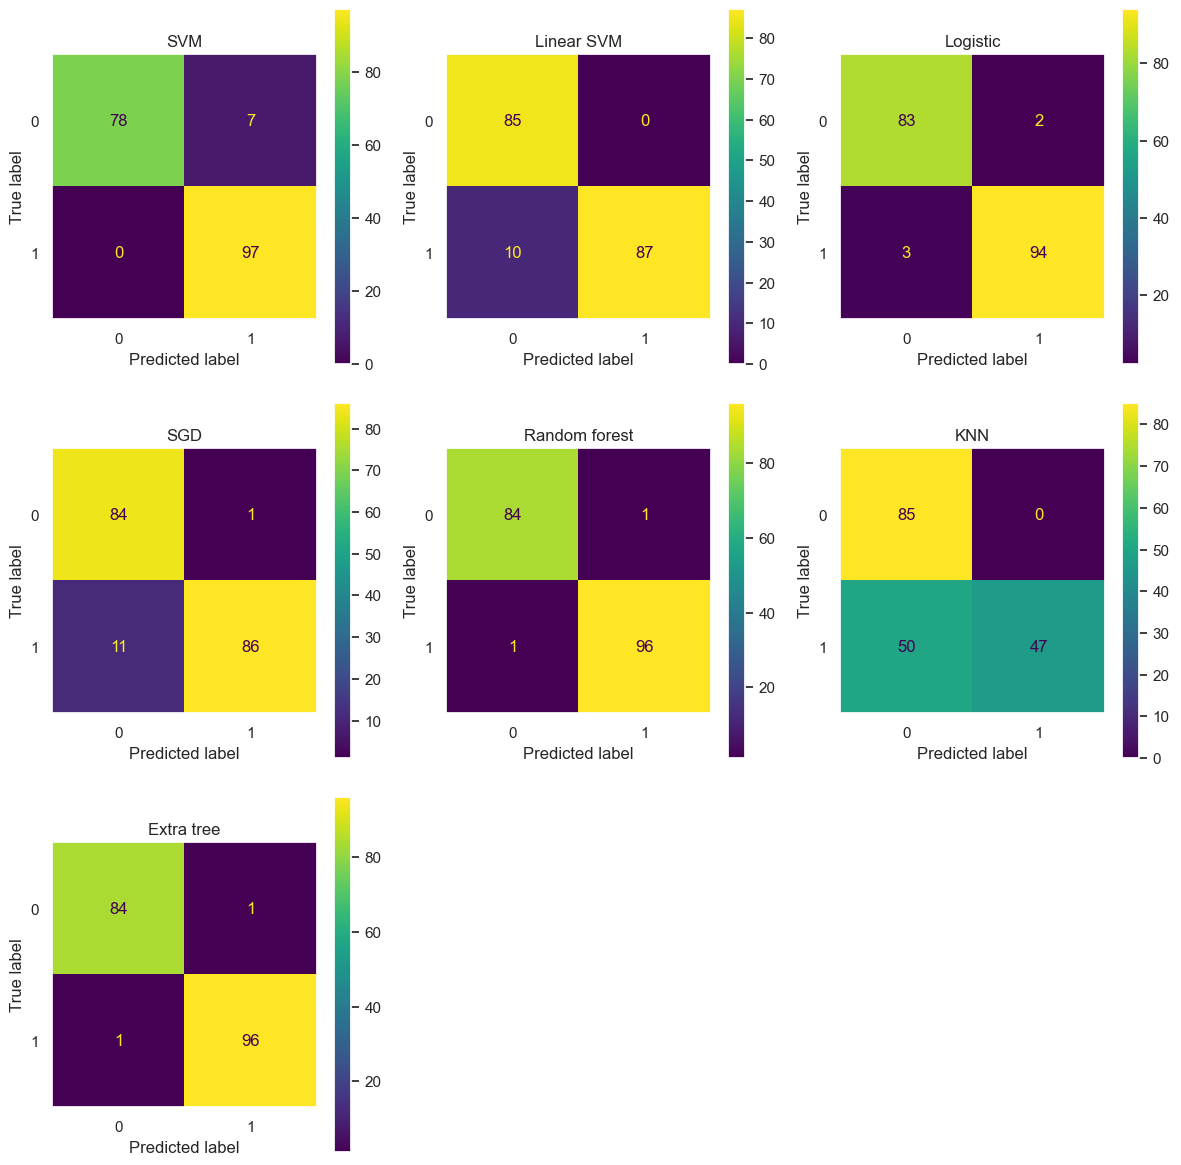

In [466]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices
confusion_matrices = [confusion_matrix(y_train, pred) for pred in prediction_list]

# Define the titles for your plots
titles = ['SVM', 'Linear SVM', 'Logistic', 'SGD', 'Random forest', 'KNN', 'Extra tree']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over confusion matrices and titles together
for cm, title, ax in zip(confusion_matrices, titles, axes.flatten()):
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    display.plot(ax=ax)
    ax.set_title(title)
    ax.grid(False)

# Hide the unused subplot (if there are less plots than subplots)
if len(prediction_list) < len(axes.flatten()):
    for ax in axes.flatten()[len(prediction_list):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

# **Supervised Learning on Original Dataset**

In [467]:
conditions = []
for cell in df.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")
print(len(conditions))

227


In [469]:
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

In [470]:
import warnings
warnings.filterwarnings('ignore')

X_train = df.T
y_train = target_binary

# Define parameter grids for each model
param_grids = {
    "svm": {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000] + ['scale', 'auto'],
        'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    },
    "linear_svm": {
        'linear_svm__penalty': ['l1', 'l2'],
        'linear_svm__loss' : ['hinge', 'squared_hinge'], 
    },
    "logistic": {
        'logistic__penalty': ['l1', 'l2'],
        'logistic__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'logistic__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    },
    "sgd": {
        'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error'],
        'sgd__penalty': ['l1', 'l2', 'elasticnet'],
        'sgd__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        'sgd__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'sgd__eta0': [1, 10, 20, 50, 100],
    },
    "random_forest": {
        'random_forest__n_estimators': [20, 30, 50, 100, 200],
        'random_forest__max_depth': [None, 10, 20],
        'random_forest__criterion': ["gini", "entropy"],
    },
    "knn": {
        'knn__n_neighbors': range(1, 31),
        "knn__weights": ["uniform", "distance"], 
        'knn__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming']
    },
    "extra_tree": {
            'extra_tree__n_estimators':[20, 30, 50, 100, 200], 
            'extra_tree__max_leaf_nodes': np.arange(20, 100, 10)
    }
}


# Define pipelines for each model
pipelines = {
    "svm": Pipeline([
        ("svm", SVC())   
    ]), 
    "linear_svm": Pipeline([
        ("linear_svm", LinearSVC()) 
    ]),
    "logistic": Pipeline([
        ("logistic", LogisticRegression())
    ]),
    "sgd": Pipeline([
        ("sgd", SGDClassifier())
    ]),
    "random_forest": Pipeline([
        ("random_forest", RandomForestClassifier())
    ]),
    "knn": Pipeline([
        ("knn", KNeighborsClassifier())
    ]), 
    "extra_tree": Pipeline([
        ("extra_tree", ExtraTreesClassifier())
    ]),
}

results_table = []
prediction_list = []

# Grid search, cross-validate, and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    if model_name in ["svm", "linear_svm", "logistic", "knn"]:
        # Scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)

        # Fit the pipeline on scaled data
        pipeline.fit(X_train, y_train)
    else:
        # Fit the pipeline on original data
        pipeline.fit(X_train, y_train)
    
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    print(f"Model: {model_name}")
    print(f"Best parameters: {best_params}")

    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
    prediction_list.append(y_pred)

    accuracy = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=10)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    result_row = [model_name, np.mean(accuracy), precision, recall, f1]
    results_table.append(result_row)

# Convert the results table to a pandas DataFrame
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results_table, columns=columns)

# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='psql'))

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
Model: svm
Best parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'sigmoid'}
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Model: linear_svm
Best parameters: {'linear_svm__loss': 'hinge', 'linear_svm__penalty': 'l2'}
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Model: logistic
Best parameters: {'logistic__C': 1, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Fitting 10 folds for each of 2520 candidates, totalling 25200 fits
Model: sgd
Best parameters: {'sgd__alpha': 0.0001, 'sgd__eta0': 1, 'sgd__learning_rate': 'constant', 'sgd__loss': 'modified_huber', 'sgd__penalty': 'l2'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Model: random_forest
Best parameters: {'random_forest__criterion': 'gini', 'random_forest__max_depth': 10, 'random_forest__n_estimators': 200}
Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Model: knn
Best parame

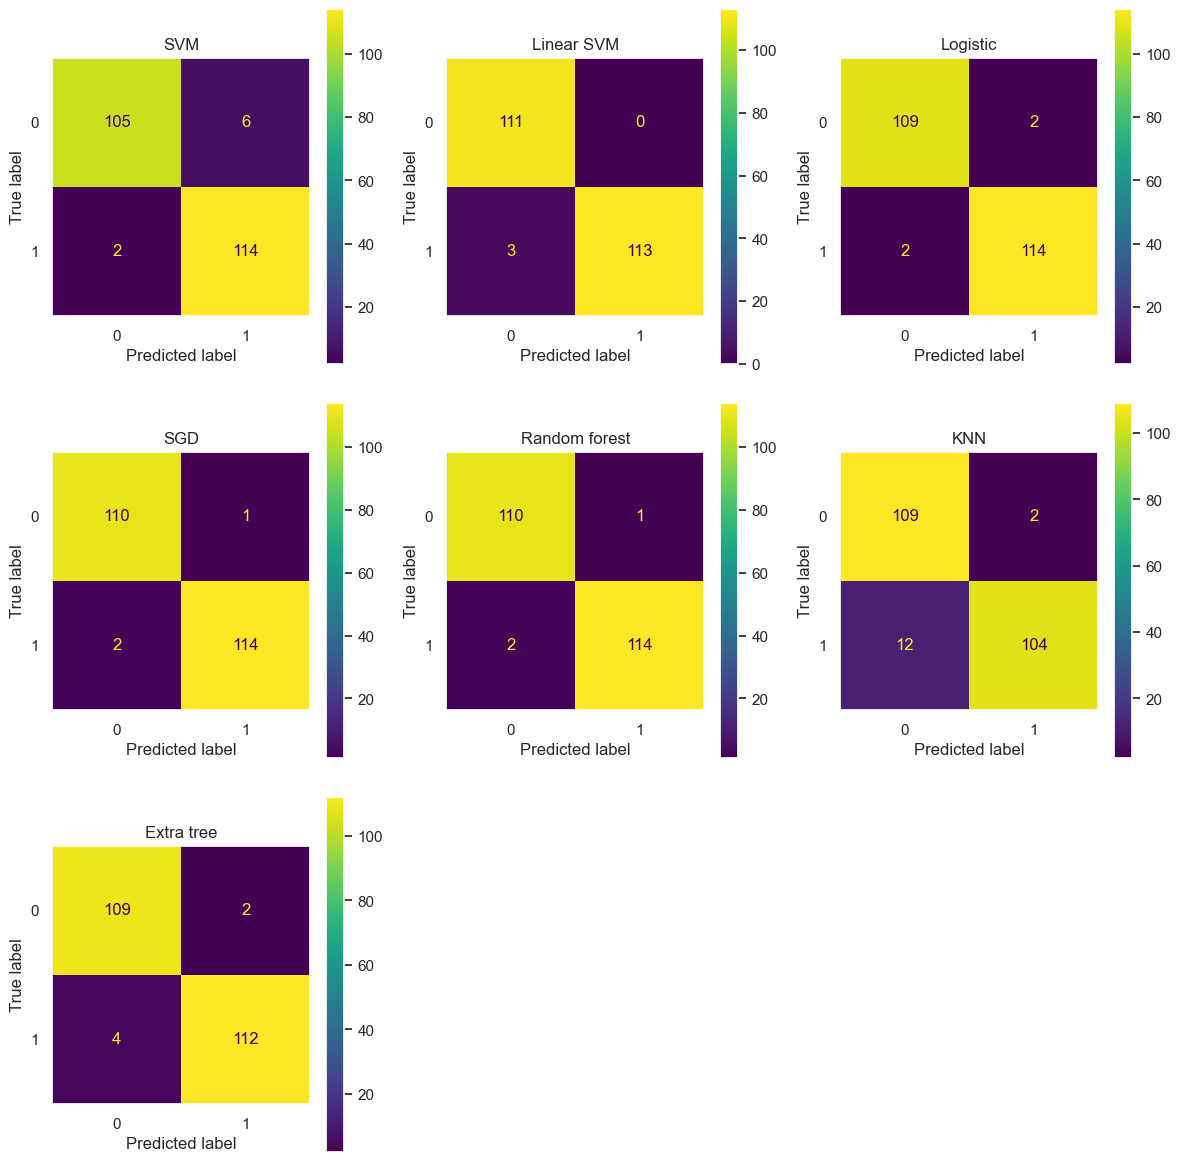

In [471]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices
confusion_matrices = [confusion_matrix(y_train, pred) for pred in prediction_list]

# Define the titles for your plots
titles = ['SVM', 'Linear SVM', 'Logistic', 'SGD', 'Random forest', 'KNN', 'Extra tree']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over confusion matrices and titles together
for cm, title, ax in zip(confusion_matrices, titles, axes.flatten()):
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    display.plot(ax=ax)
    ax.set_title(title)
    ax.grid(False)

# Hide the unused subplot (if there are less plots than subplots)
if len(prediction_list) < len(axes.flatten()):
    for ax in axes.flatten()[len(prediction_list):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

# **Conclusion**

We have implemented two pipelines, one on the normalized filtered 3000 dataset that we were given and one on the original data set which we have preprocessed. \
\
By comparing accuracy, precision, recall, F1 score from both pipelines we can see that Random Forest performs the best on both. Moreover, the results of grid search applied to dfn (given normalized dataset) were slightly better, so we will choose the Random Forest Classifier with parameters `criterion = 'gini', max_depth = None, n_estimators = 100`. \
\
```RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=100)```


# **Predictions**

In [472]:
conditions = []
for cell in dfn.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")
print(len(conditions))

182


In [473]:
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

In [476]:
df_test = pd.read_csv("HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ", engine='python', index_col=0)

X_train = dfn.T
y_train = target_binary
X_test = df_test.T

In [477]:
best_model = RandomForestClassifier(criterion='gini', max_depth=None, n_estimators=100)

In [480]:
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

45

In [481]:
final_predictions = []

for i in predictions:
    if i==1:
        final_predictions.append('Hypoxia')
    else:
        final_predictions.append('Normoxia')


print(final_predictions)

['Normoxia', 'Normoxia', 'Hypoxia', 'Hypoxia', 'Hypoxia', 'Hypoxia', 'Hypoxia', 'Normoxia', 'Normoxia', 'Normoxia', 'Normoxia', 'Normoxia', 'Hypoxia', 'Hypoxia', 'Hypoxia', 'Hypoxia', 'Normoxia', 'Normoxia', 'Normoxia', 'Normoxia', 'Normoxia', 'Hypoxia', 'Hypoxia', 'Hypoxia', 'Normoxia', 'Normoxia', 'Normoxia', 'Hypoxia', 'Normoxia', 'Hypoxia', 'Hypoxia', 'Normoxia', 'Normoxia', 'Hypoxia', 'Hypoxia', 'Hypoxia', 'Normoxia', 'Normoxia', 'Normoxia', 'Hypoxia', 'Hypoxia', 'Normoxia', 'Normoxia', 'Normoxia', 'Normoxia']


In [484]:
np.savetxt('HCC1806_SmartS_Predictions.txt', final_predictions, fmt='%s')